# <img style="float: left; padding-right: 10px; width: 80px" src="https://raw.githubusercontent.com/trivikverma/researchgroup/master/static/media/resources/epa1316/TU_descriptor%20black.png"> EPA-1316 Introduction to *Urban* Data Science 


## Assignment 2: Geographic Visualisation

**TU Delft**<br>
**Q1 2020**<br>
**Instructor:** Trivik Verma <br>
**TAs:** Aarthi Meenakshi Sundaram, Jelle Egbers, Tess Kim, Lotte Lourens, Amir Ebrahimi Fard, Giulia Reggiani, Bramka Jafino, Talia Kaufmann <br>
**[Computational Urban Science & Policy Lab](https://research.trivikverma.com/)** <br>

---



## 1. Introduction

_Note:_ If you have not gone through **labs and homeworks 04-05**, kindly do so before starting this assignment, as those will help you with all the necessary knowledge for this assignment. This assignment will be useful for you when exploring and visualising your data, and discussing observations, outliers or relationships situated geographically, as part of the final project for this course or in the future. 

#### 1.1 Submission

Please submit the results by Brightspace under **Assignment 02**, using a single file as example,

```text
firstname_secondname_thirdname_lastname_02.html

```

**If your file is not named in lowercase letters as mentioned above, your assignment will not be read by the script that works to compile 200 assignments and you will miss out on the grades. I don't want that, so be exceptionally careful that you name it properly. Don't worry if you spelled your name incorrectly. I want to avoid a situation where I have 200 assignments all called assignment_02.html**

Please **do not** submit any data or files other than the ``html file``.

#### 1.2 How do you convert to HTML? 

There are 2 ways, 

1. from a running notebook, you can convert it into html by clicking on the file tab on the main menu of Jupyter Lab 
    * File &rightarrow; Export Notebooks as... &rightarrow; Export Notebook to HTML
2. go to terminal or command line and type
    * ``jupyter nbconvert --to html <notebook_name>.ipynb  ``


#### 1.3 Learning Objectives

This assignment is designed to support three different learning objectives. After completing this laboratory you will be able to:

* Combine different datasets
* Work with Geographic data
* Plot important information about the data (graphs, scatter plots, choropleth, etc..) using the `principles of graphical excellence` and `guidelines of exploratory data analysis`.

#### 1.4 Tasks

`Problem Structure`: First formulate a hypothesis/RQ, identify two/three key variables, search for appropriate datasets (csv, excel, etc.), merge the csv and the given shape file, do a bit of EDA/spatial analysis and then report your result in a list of **5 neighbourhoods** that discuss the RQ.

`What we expect`: Provide a list of **five neighbourhoods** in The Hague characterised as "safe" or "" (insert your measure based on what data you collected). Give at least two measurements that may be linked to each other (for example: your hypothesis is that neighbourhoods with no green space are more prone to populations with mental health issues). Be explicit about what definition you use for each measurement using markdown cells. I am not looking for mathematical equations as justification, but you are welcome to also form simple relations and show them in markdown. I shouldn't have to call you to find out what you mean by measurements of "Accessibility" or "Safety" or "Popularity" etc. Do not assume that there is one normative definition and skip your reasoning.
    * Note that the measurement can also just be number of people living in a neighbourhood, their voting choice or availability of jobs. But it will not hurt to plot more than just a column from a csv. 

This assignment requires you to go through the following tasks in eda and visualisation, and networks and spatial weights. 

1. Use at least two datasets: merge at least 1 shapefile (already provided) and a csv file (you find and obtain).
2. Justify your data collection process using markdown cells as you go through the notebook
3. Clean your data and make it tabular for your own good! (think about weeks 1-3 and assignment 1)
4. Carry out an exploratory data analysis
4. Justify your choice of the list on the basis of your analysis.
    * Use at least **3 figures** to support your analysis. Think about exploratory data analysis (build data, clean data, explore global, explore group properties). 
    * These figures should have followed the principles of graphical excellence. Using markdown, write explicity under each figure at least **3 principles of excellence** you have used to make it.
    * Create **choropleths** to display region-specific information (ex. population, voting choice or jobs availability)
    * Be careful with the use of color (and try to be inclusive of color blind people)
    * Use **one method** from the lectures to discuss what you observe for your variable(s). Examples below,
          * local or global spatial autocorrelation
          * network measures
          * spatial weights / spatial lag
          * binning
          * feature scaling, normalisation or standardisation
5. **[Optional]** Plot and Overlay Shapefiles to show Den Haag with some other elements like the sea, canals, centroids, amenities (try Open Street Maps data - using `osmnx`?), climate or land-use patterns, etc. 

Remember to always document your code!

## 2. Download the Data

For this assignment I am providing you with the shapefiles of The Hague. Mikhail Sirenko has prepared these files with love and care so that you can connect it with either [Den Haag Cijfers](https://denhaag.incijfers.nl/jive) or [CBS](https://www.cbs.nl/nl-nl/reeksen/kerncijfers-wijken-en-buurten-2004-2020) datasets without having to clean badly collected data. 

Note: For data from CBS, data is only complete upto 2017. You will have to subset the data on municpality using the variable name `gm_naam = 's-Gravenhage` and then subset on neighbourhood resolution using variable name `recs = Buurt` to get the data that can match the shapefiles we have provided. 

So after you unzip, we’ll work with the file ``neighborhoods.xxx``, which is in one of many geographic formats. Put the data in a convenient location on your computer or laptop, ideally in a folder called **data** which is next to this **jupyter notebook**. I recommend taking a look at the file with format `.json` in a text editor like _atom_ for any system or notepad++ for windows. These will also make your life easy for everything else on your computer. Make sure you’ve set your working directory in the correct manner – okay?

It’s a big file and it may take a while to load onto your laptop and into Python (running on the jupyter labs environment). 

So, to summarise, you will use at least two datasets.

1. Download Shapefiles provided with the assignment
2. Get a second dataset of your choice from The Hague city region using the links above (curate them as you like)

#### More Data Sources

You can find more data sources on Cities and Population, Climate indicators and Land-use in the following links in case you are attempting the **[Optional]** exercise.

* http://citypopulation.de/ 
* https://www.census.gov/programs-surveys/geography.html 
* https://www.eea.europa.eu/data-and-maps 
* http://download.geofabrik.de/

#### In case you get more data as shapefiles, and want to play with projections, a nice guide for it is [here](https://automating-gis-processes.github.io/CSC18/lessons/L2/projections.html)

## 3. Start your analysis

In [7]:
#import necessary packages
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import palettable as pltt
from seaborn import palplot
# import the necessary libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
import requests
import IPython
from IPython.core.display import HTML
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format ='retina'

## Hypothesis ## 

The Hague is often categorized as a multicultural city. Residents come not only from other Dutch cities, but also from EU and non-EU countries. Multiculturality has positive consequences and negative consequences. A positive consequence is an increase in understanding of cultural differences. On the other hand, a negative consequence would be the segregation of neighborhoods where ethnic minorities live segregated from Dutch citizens. 

For this analysis I categorise neighborhoods with a certain threshold percentage of ethnic minorities. From these neighborhoods I want to inspect relations between ethnic minorities of different backgrounds and average income, and percentage of people in higher education.

After taking a first look at the data for sake of simplicity, I decided that a neighborhood is diverse when the percentage of ethnic minorities is higher than the percentage of Dutch natives. I will choose the neighborhoods with 5 highest percentage and 5 lowest percentage of ethnic minorities.

My hypothesis is: "Neighborhoods with a higher percentage ethnic minorities compared to the percentage of Dutch natives have a worse working life. Furthermore, the neighborhoods with a higher percentage of ethnic minorities have more people looking for a job and lower personal income compared to neighborhoods with a higher percentage Dutch natives."

I will inspect this by inspecting 5 relevant variables:
- % Dutch Natives
- % Ethnic minorities
- Average personal income per resident (€)
- Unemployed workers looking for work. Because of the unavailability of some data, I will base my assumptions of people with a job in the neighborhood, on this variable, since it is indirectly related to the desired variable.

I will compare 5 ethnically diverse neighborhoods with 5 less ethnically diverse neighborhoods.

In [15]:
#read csv file
hypothesis_df = pd.read_csv("./data/hypothesis_data.csv", header = 0)

#take a first look at the data
hypothesis_df.head()

Buurten  % Dutch natives % Ethnic minorities  Average personal income per resident  aantal niet-werkende werkzoekenden totaal
0          01 Oud Scheveningen             75.5                24.5                               22900.0                                      150.0
1              02 Vissershaven             70.1                29.9                               22600.0                                      210.0
2    03 Scheveningen Badplaats             63.9                36.1                               27100.0                                      170.0
3             04 Visserijbuurt             63.8                36.2                               24700.0                                      170.0
4  05 v Stolkpark/Schev Bosjes             53.4                46.6                               43900.0                                        NaN

In [16]:
hypothesis_df .tail()
len(hypothesis_df )
#notice there is an extra unnecesary row and some NaN!

115

## Cleaning up the data ##
First I need to clean up the data and analyse some values by putting them in two separate dataframes. One dataframe with all neighborhoods where Dutch natives are the majority. The second dataframe with all neighborhoods where non-Dutch are the majority.

After inspecting the two separate dataframes to get an initial idea of how the data looks like, I proceed to combine the shapefile with the original dataframe.

In [17]:
#first delete the extra unnecesary row
hypothesis_df  = hypothesis_df.drop([114],axis = 0)

In [18]:
#rename some columns to make references easier.
attributes_names = ['Neighborhoods', '% Dutch','% ethnic','Average personal income per resident (€)','looking for a job']
hypothesis_df.columns = attributes_names

In [19]:
#Combine with shapefile
nbh_dir = 'data'
nbh_link  = nbh_dir + '/neighborhoods.shp'
nbh = gpd.read_file(nbh_link)
nbh.head() #see the shapefile

nbh_new = nbh.drop(nbh.columns[0],axis=1)
nbh_new.crs = nbh.crs
#this code is not needed anymore, it was because I tried concatenating a District and Neighborhood dataframe
#nbh_new['neigb_cijf']= nbh_new.neigb_cijf.str.replace('[^a-zA-Z]', '')
#ethnic_df['Neighborhoods'] = ethnic_df.Neighborhoods.str.replace('[^a-zA-Z]', '')

#change both to string format so the shapefile and csv are able to be concatenated

nbh_new['neigb_cijf'] = nbh_new['neigb_cijf'].astype(str)
hypothesis_df['Neighborhoods'] = hypothesis_df['Neighborhoods'].astype(str)

hypothesis_df  = hypothesis_df.set_index('Neighborhoods') #set index

nbh_data = nbh_new.join(hypothesis_df, on='neigb_cijf')

#make sure they have the same crs
nbh_data.crs = nbh_new.crs

#show the table to check if everything looks good
nbh_data

neigb_cijf                                           geometry  % Dutch % ethnic  Average personal income per resident (€)  looking for a job
0       70 Oostduinen  POLYGON ((4.30290 52.12832, 4.30298 52.12827, ...      NaN      NaN                                       NaN                NaN
1    71 Belgisch Park  POLYGON ((4.28056 52.11706, 4.28053 52.11706, ...     61.8     38.2                                   30100.0              150.0
2    73 Westbroekpark  POLYGON ((4.29171 52.10745, 4.29181 52.10739, ...     64.5     35.5                                   48900.0                NaN
3        74 Duttendel  POLYGON ((4.32252 52.10768, 4.32252 52.10766, ...     66.4     33.6                                   49700.0               20.0
4      48 Nassaubuurt  POLYGON ((4.31943 52.09247, 4.31943 52.09247, ...     56.1     43.9                                   50500.0               10.0
..                ...                                                ...      ...      ...                                       ...                ...
109   117 De Rivieren  POLYGON ((4.39709 52.07476, 4.39778 52.07496, ...    100.0        x                                       0.0                NaN
110      118 De Lanen  POLYGON ((4.40245 52.06319, 4.40242 52.06314, ...     53.5     46.5                                   24100.0              120.0
111     119 De Velden  POLYGON ((4.40593 52.07659, 4.40607 52.07649, ...     58.0     42.0                                   26100.0               90.0
112     120 De Vissen  POLYGON ((4.41188 52.07213, 4.41192 52.07210, ...     60.6     39.4                                   25700.0              240.0
113     121 Rietbuurt  POLYGON ((4.41539 52.05744, 4.41538 52.05707, ...     52.6     47.4                                   25100.0               70.0

[114 rows x 6 columns]

In [20]:
type(nbh_data) #check the data

geopandas.geodataframe.GeoDataFrame

In [21]:
#will print the count of missing values for each column

count_1 = nbh_data.isnull().sum(axis=0) #count per column NaN using .isnull() function and .sum

print("There are NaNs in the columns of the dataframe" ,count_1)

#notice that these are percentages or amount of people. This cannot be easily replaced, but its data is relevant, so the row cannot be dropped.
#it is better to put this value to 0 and on a later phase, during EDA, try to predict the value or consider it an outlier.

There are NaNs in the columns of the dataframe neigb_cijf                                   0
geometry                                     0
% Dutch                                      3
% ethnic                                     3
Average personal income per resident (€)     4
looking for a job                           14
dtype: int64


In [22]:
#nbh_data['% Dutch'] = nbh_data['% Dutch'].fillna(0)
#nbh_data['% ethnic'] = nbh_data['% ethnic'].fillna(0)

#replace rows that have NaN in column "looking for a job", "average personal income (€)"
nbh_data = nbh_data.fillna(0)


#there is an unnecessary x in my % ethnic column. Change this
nbh_data = nbh_data.replace(['x'],0)

nbh_data.set_index('neigb_cijf') #set index

geometry  % Dutch % ethnic  Average personal income per resident (€)  looking for a job
neigb_cijf                                                                                                                                        
70 Oostduinen     POLYGON ((4.30290 52.12832, 4.30298 52.12827, ...      0.0        0                                       0.0                0.0
71 Belgisch Park  POLYGON ((4.28056 52.11706, 4.28053 52.11706, ...     61.8     38.2                                   30100.0              150.0
73 Westbroekpark  POLYGON ((4.29171 52.10745, 4.29181 52.10739, ...     64.5     35.5                                   48900.0                0.0
74 Duttendel      POLYGON ((4.32252 52.10768, 4.32252 52.10766, ...     66.4     33.6                                   49700.0               20.0
48 Nassaubuurt    POLYGON ((4.31943 52.09247, 4.31943 52.09247, ...     56.1     43.9                                   50500.0               10.0
...                                                             ...      ...      ...                                       ...                ...
117 De Rivieren   POLYGON ((4.39709 52.07476, 4.39778 52.07496, ...    100.0        0                                       0.0                0.0
118 De Lanen      POLYGON ((4.40245 52.06319, 4.40242 52.06314, ...     53.5     46.5                                   24100.0              120.0
119 De Velden     POLYGON ((4.40593 52.07659, 4.40607 52.07649, ...     58.0     42.0                                   26100.0               90.0
120 De Vissen     POLYGON ((4.41188 52.07213, 4.41192 52.07210, ...     60.6     39.4                                   25700.0              240.0
121 Rietbuurt     POLYGON ((4.41539 52.05744, 4.41538 52.05707, ...     52.6     47.4                                   25100.0               70.0

[114 rows x 5 columns]

In [25]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer()
#fill NaN with mean value of that column using
#specify predictor variables, income and no job /job searchers

data_change = nbh_data[['% Dutch', '% ethnic']]

data_change = data_change.values.reshape(len(data_change),2)  #reshape to a 2-D array   

data_change_imputed = imp.fit_transform(data_change)

dutch_imp = data_change_imputed[:,0]   #store imputed value for income 
ethnic_imp  = data_change_imputed[:,1] #store imputed value for people with no job


dutch_imp  = dutch_imp .reshape(len(dutch_imp),1)  #reshape to one column again   
ethnic_imp = ethnic_imp.reshape(len(ethnic_imp),1)   #reshape to one column again  

#replace the values in the DataFrame
nbh_data['% Dutch'] = dutch_imp  
nbh_data['% ethnic'] = ethnic_imp
nbh_data.tail()

neigb_cijf                                           geometry  % Dutch  % ethnic  Average personal income per resident (€)  looking for a job
109  117 De Rivieren  POLYGON ((4.39709 52.07476, 4.39778 52.07496, ...    100.0       0.0                                       0.0                0.0
110     118 De Lanen  POLYGON ((4.40245 52.06319, 4.40242 52.06314, ...     53.5      46.5                                   24100.0              120.0
111    119 De Velden  POLYGON ((4.40593 52.07659, 4.40607 52.07649, ...     58.0      42.0                                   26100.0               90.0
112    120 De Vissen  POLYGON ((4.41188 52.07213, 4.41192 52.07210, ...     60.6      39.4                                   25700.0              240.0
113    121 Rietbuurt  POLYGON ((4.41539 52.05744, 4.41538 52.05707, ...     52.6      47.4                                   25100.0               70.0

In [26]:
#count again
#will print the count of missing values for each column

count_1 = nbh_data.isnull().sum(axis=0) #count per column NaN using .isnull() function and .sum

print("There are NaNs in the columns of the dataframe" ,count_1)


There are NaNs in the columns of the dataframe neigb_cijf                                  0
geometry                                    0
% Dutch                                     0
% ethnic                                    0
Average personal income per resident (€)    0
looking for a job                           0
dtype: int64


In [27]:
nbh_data.set_index('neigb_cijf') #set index

#The data is already tidy! Very nice

geometry  % Dutch  % ethnic  Average personal income per resident (€)  looking for a job
neigb_cijf                                                                                                                                         
70 Oostduinen     POLYGON ((4.30290 52.12832, 4.30298 52.12827, ...      0.0       0.0                                       0.0                0.0
71 Belgisch Park  POLYGON ((4.28056 52.11706, 4.28053 52.11706, ...     61.8      38.2                                   30100.0              150.0
73 Westbroekpark  POLYGON ((4.29171 52.10745, 4.29181 52.10739, ...     64.5      35.5                                   48900.0                0.0
74 Duttendel      POLYGON ((4.32252 52.10768, 4.32252 52.10766, ...     66.4      33.6                                   49700.0               20.0
48 Nassaubuurt    POLYGON ((4.31943 52.09247, 4.31943 52.09247, ...     56.1      43.9                                   50500.0               10.0
...                                                             ...      ...       ...                                       ...                ...
117 De Rivieren   POLYGON ((4.39709 52.07476, 4.39778 52.07496, ...    100.0       0.0                                       0.0                0.0
118 De Lanen      POLYGON ((4.40245 52.06319, 4.40242 52.06314, ...     53.5      46.5                                   24100.0              120.0
119 De Velden     POLYGON ((4.40593 52.07659, 4.40607 52.07649, ...     58.0      42.0                                   26100.0               90.0
120 De Vissen     POLYGON ((4.41188 52.07213, 4.41192 52.07210, ...     60.6      39.4                                   25700.0              240.0
121 Rietbuurt     POLYGON ((4.41539 52.05744, 4.41538 52.05707, ...     52.6      47.4                                   25100.0               70.0

[114 rows x 5 columns]

## Explore subsets of data ##

You need these subsets for when I try scatterplotting later on to see if there is a distinction between an ethnic neighborhoods and a more Dutch neighborhood.

Therefore I split my DataFrame in two. A subset that has all neighborhoods with more than 50% ethnic minorities. And another subset that has all neighborhoods with more than 50% Dutch natives. 

In [28]:
nbh_data['% Dutch'] = nbh_data['% Dutch'].astype(float)
nbh_data['% ethnic'] = nbh_data['% ethnic'].astype(float)

#make the necessary sub groups
dutch_df = nbh_data[(nbh_data['% Dutch'] > 50 )] #dutch native dataframe
ethnic_df = nbh_data[(nbh_data['% ethnic'] >50)] #ethnic dataframe



#let us sort values by descending order of percentage

dutch_df  =dutch_df .sort_values(by =['% Dutch'], ascending= False)
ethnic_df = ethnic_df.sort_values(by =['% ethnic'], ascending= False)

ethnic_df.head() #explore one of the dataframes



neigb_cijf                                           geometry  % Dutch  % ethnic  Average personal income per resident (€)  looking for a job
68    34 Transvaalkwartier-Zuid  POLYGON ((4.29684 52.06716, 4.29687 52.06717, ...      6.3      93.7                                   12700.0              640.0
65       17 Schildersbuurt-Oost  POLYGON ((4.31576 52.06597, 4.31576 52.06597, ...      6.7      93.3                                   11600.0              830.0
67  33 Transvaalkwartier-Midden  POLYGON ((4.29288 52.06991, 4.29300 52.06996, ...      6.9      93.1                                   13200.0              370.0
63       15 Schildersbuurt-West  POLYGON ((4.29696 52.07397, 4.29706 52.07382, ...      7.5      92.5                                   12200.0             1520.0
66   32 Transvaalkwartier-Noord  POLYGON ((4.29105 52.07267, 4.29106 52.07264, ...      8.4      91.6                                   12700.0              530.0

In [30]:
#join the dataframe with the top 5 highest percentage of each.
dutch_df_top_5 = dutch_df.iloc[:5] 
ethnic_df_top_5 = ethnic_df.iloc[:5] 
dutch_ethn_df_joint = pd.concat([dutch_df_top_5, ethnic_df_top_5])

#replace rows with NaN
dutch_ethn_df_joint = dutch_ethn_df_joint.fillna(0)

dutch_ethn_df_joint.set_index('neigb_cijf') #set index

#The data is already tidy! Very nice

geometry  % Dutch  % ethnic  Average personal income per resident (€)  looking for a job
neigb_cijf                                                                                                                                                    
117 De Rivieren              POLYGON ((4.39709 52.07476, 4.39778 52.07496, ...    100.0       0.0                                       0.0                0.0
106 Vlietzoom-West           POLYGON ((4.34031 52.06195, 4.34039 52.06189, ...     84.2      15.8                                   33600.0                0.0
116 Vlietzoom-Oost           POLYGON ((4.38436 52.07616, 4.38458 52.07623, ...     81.8      18.2                                   39700.0                0.0
100 Duindorp                 POLYGON ((4.26433 52.09142, 4.26426 52.09138, ...     81.2      18.8                                   20500.0              350.0
50 Bloemenbuurt-West         POLYGON ((4.25365 52.07771, 4.25375 52.07762, ...     76.4      23.6                                   30600.0               40.0
34 Transvaalkwartier-Zuid    POLYGON ((4.29684 52.06716, 4.29687 52.06717, ...      6.3      93.7                                   12700.0              640.0
17 Schildersbuurt-Oost       POLYGON ((4.31576 52.06597, 4.31576 52.06597, ...      6.7      93.3                                   11600.0              830.0
33 Transvaalkwartier-Midden  POLYGON ((4.29288 52.06991, 4.29300 52.06996, ...      6.9      93.1                                   13200.0              370.0
15 Schildersbuurt-West       POLYGON ((4.29696 52.07397, 4.29706 52.07382, ...      7.5      92.5                                   12200.0             1520.0
32 Transvaalkwartier-Noord   POLYGON ((4.29105 52.07267, 4.29106 52.07264, ...      8.4      91.6                                   12700.0              530.0

## Exploratory data analysis

Now it is time to perform Exploratory Data Analysis

In [31]:
#make sure again they have the same crs
nbh_data.crs = nbh_new.crs
#Datum is World Geodetic System 1984
#The Global Positioning System uses the World Geodetic System (WGS84) as its reference coordinate system. 
#It comprises of a reference ellipsoid, a standard coordinate system, altitude data and a geoid.

In [32]:
type(nbh)
type(nbh_data)

#check if they are the same type

geopandas.geodataframe.GeoDataFrame

In [33]:
attributes_names = ['neigb_cijf', 'geometry','Dutch_percent','ethnic_percent','income_euros','no_job']
nbh_data.columns = attributes_names


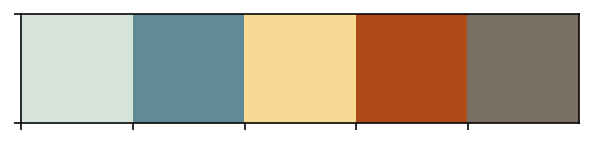

In [34]:
wes = pltt.wesanderson.Darjeeling2_5.hex_colors   #add this palet for own use later
palplot(wes)

In [35]:
wes #check the code of the palets

['#D5E3D8', '#618A98', '#F9DA95', '#AE4B16', '#787064']

## EDA on complete DataFrame ##

(4.184885462316964, 4.433804209998805, 52.01, 52.13)

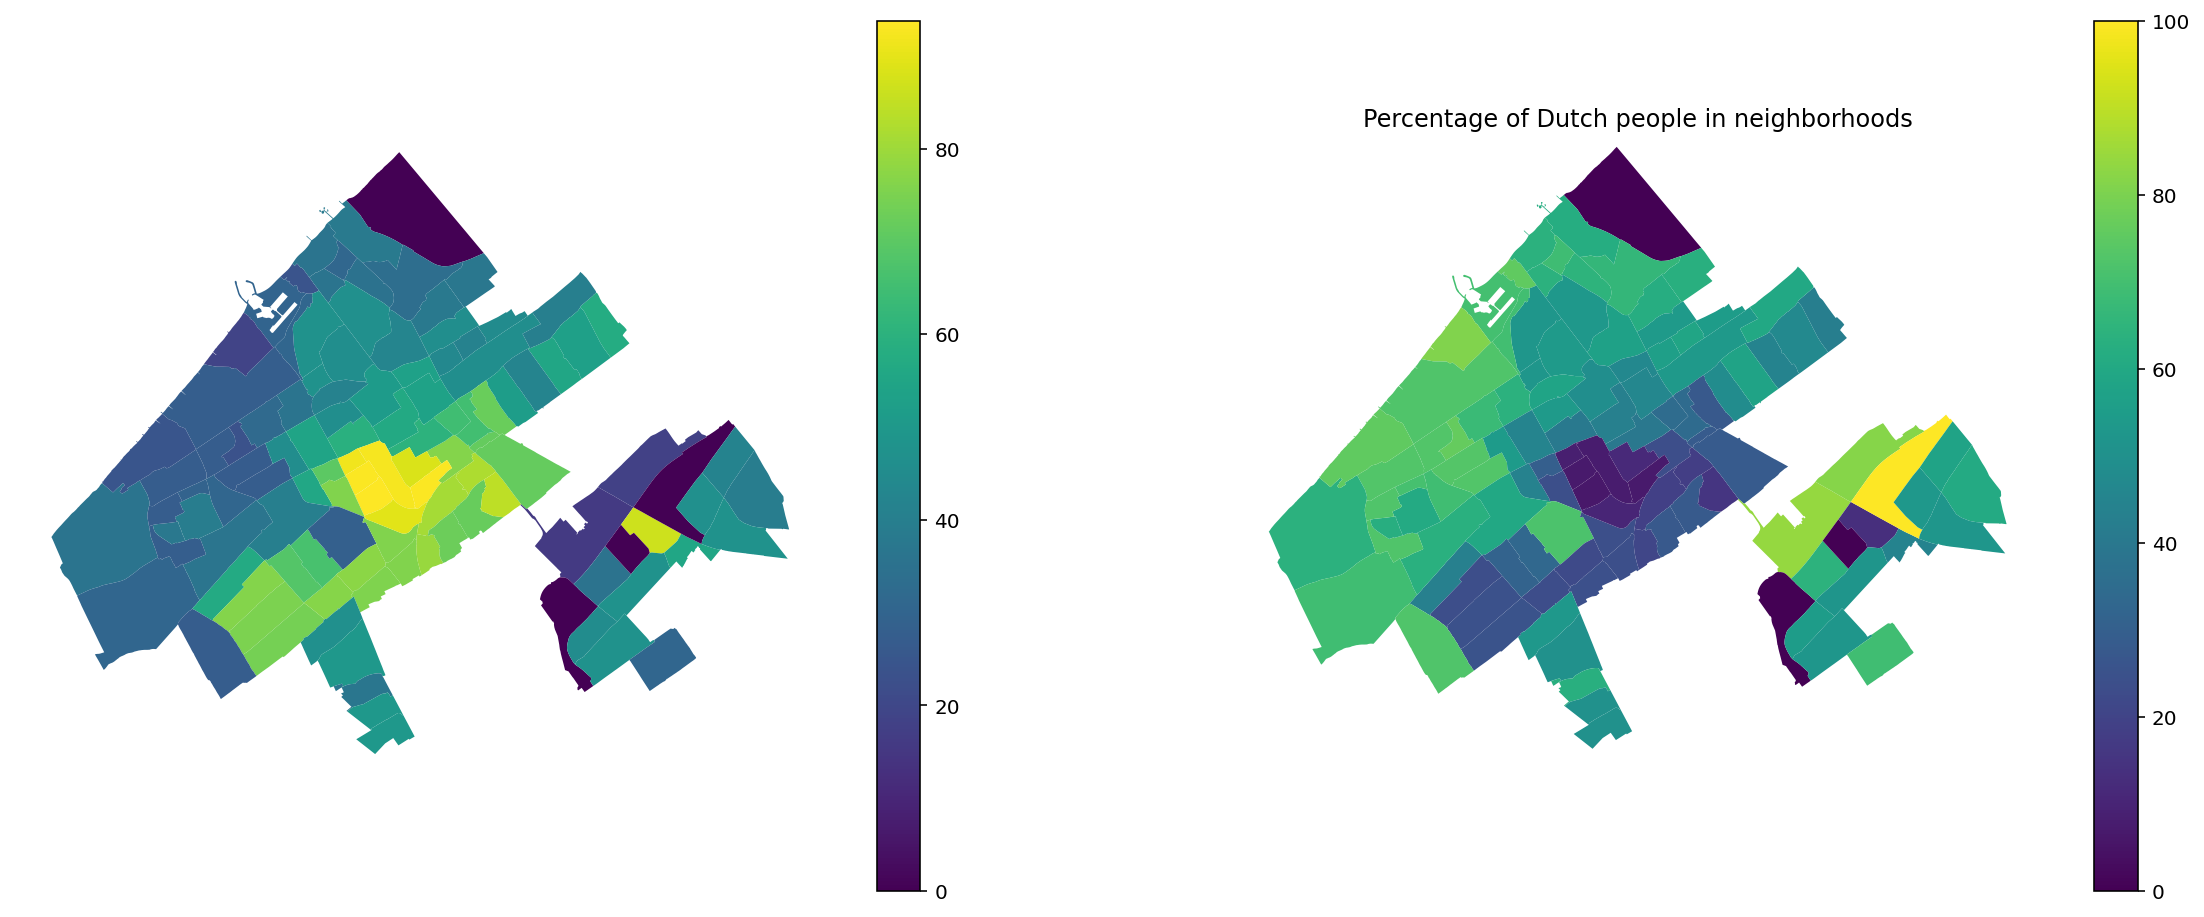

In [36]:
nbh_data.set_index('neigb_cijf') #set index

#start with a scatter plot matrix analysis to see if there are any relations present
f, ax = plt.subplots(1,2,  figsize=(20, 8))
# Base layer with all the areas for the background
nbh_data.plot(facecolor='black', linewidth=0, ax=ax[0], column='ethnic_percent', cmap = 'viridis', legend=True)

ax[0].set_ylim(52.012, 52.13) #set y limits to be more precise in plot
ax[0].set_axis_off()
ax[1].set_title('Percentage of ethnic people in neighborhoods')
plt.axis()

nbh_data.set_index('neigb_cijf') #set index

# Base layer with all the areas for the background
nbh_data.plot(facecolor='black', linewidth=0, ax=ax[1], column='Dutch_percent', cmap ='viridis',legend=True)

#ax.set_axis_off()
ax[1].set_ylim(52.01, 52.13)
ax[1].set_axis_off()
ax[1].set_title('Percentage of Dutch people in neighborhoods')
plt.axis()

The values of Dutch percentage and Ethnic percentage are complementary. For every neighborhood they sum up to 100%. One can see that the percentage of Dutch people is high along the beach coast of The Hague (West of the map). Typically one would argue that people with more resources can afford to live closer to the beach.

Let's find certain groups of data and spatial plot them!

(4.184885462316964, 4.433804209998805, 52.012, 52.13)

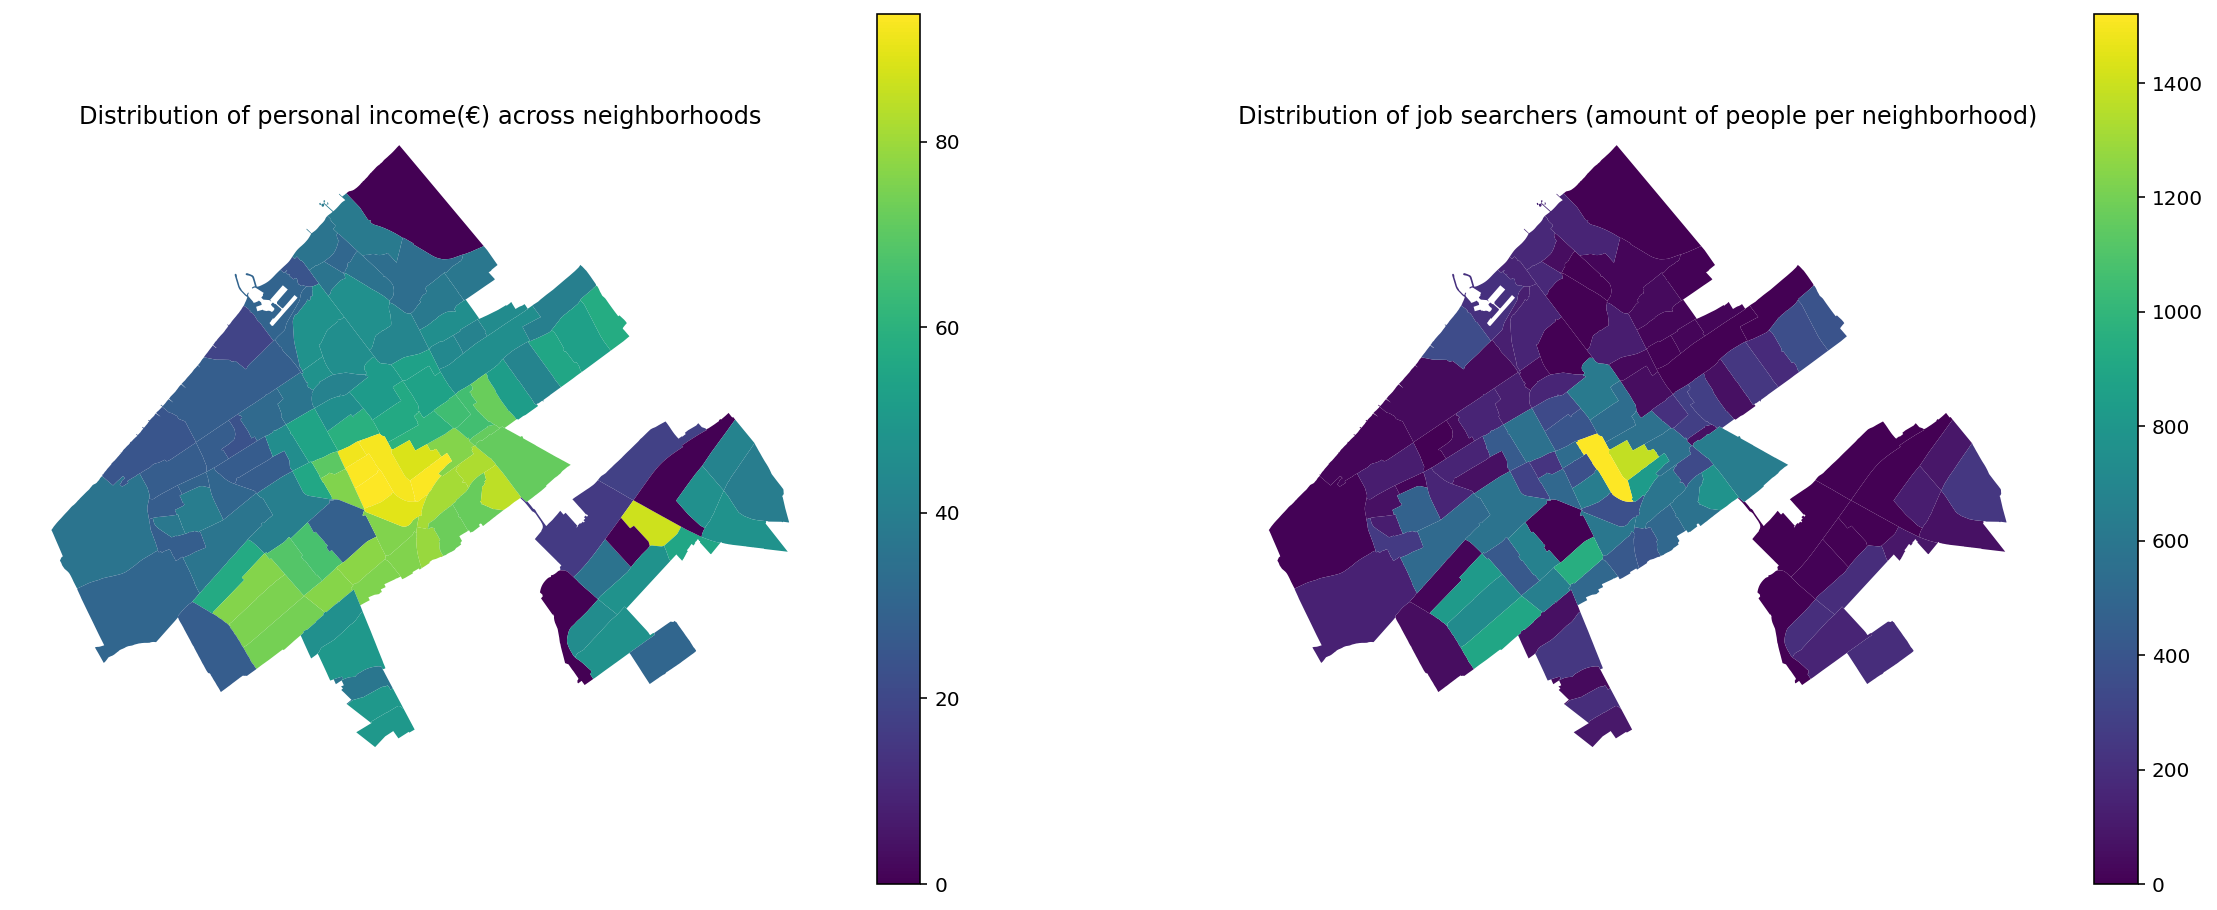

In [37]:

income = nbh_data.sort_values('income_euros') #sort income in euros
income.crs = nbh_data.crs

job = nbh_data.sort_values('no_job')
job.crs = nbh_data.crs

f, ax = plt.subplots(1,2, figsize=(20, 8))

# Base layer with all the areas for the background
nbh_data.plot(facecolor='black', linewidth=0, ax=ax[0], column='ethnic_percent', cmap = 'viridis',legend=True)


#subfigure 1
ax[0].set_ylim(52.012, 52.13)
ax[0].set_title('Distribution of personal income(€) across neighborhoods')
ax[0].set_axis_off()

#subfigure 2
job.plot(facecolor='black', linewidth=0, ax=ax[1], column='no_job', cmap = 'viridis',legend=True)
ax[1].set_ylim(52.012, 52.13)
ax[1].set_title('Distribution of job searchers (amount of people per neighborhood)')
ax[1].set_axis_off()
plt.axis()



I immediately can see: Where income is higher, usually there are less job searchers/ workless people and vice versa. Also if compared to the distribution of population, the high income areas seem to be the same as where the Dutch % is high. This all will be analyzed later at the conclusion.

I will plot a kernel density estimate to see how the personal income per residents is distributed over the neighborhoods. Out of this kde distribution I can determine if I can make clusters for the variable/attribute. For example a cluster of low income and high income. With this, I can make new spatial plots and look for any relations in the aggregation of these clustered areas.

Text(0, 0.5, '$1/total samples$')

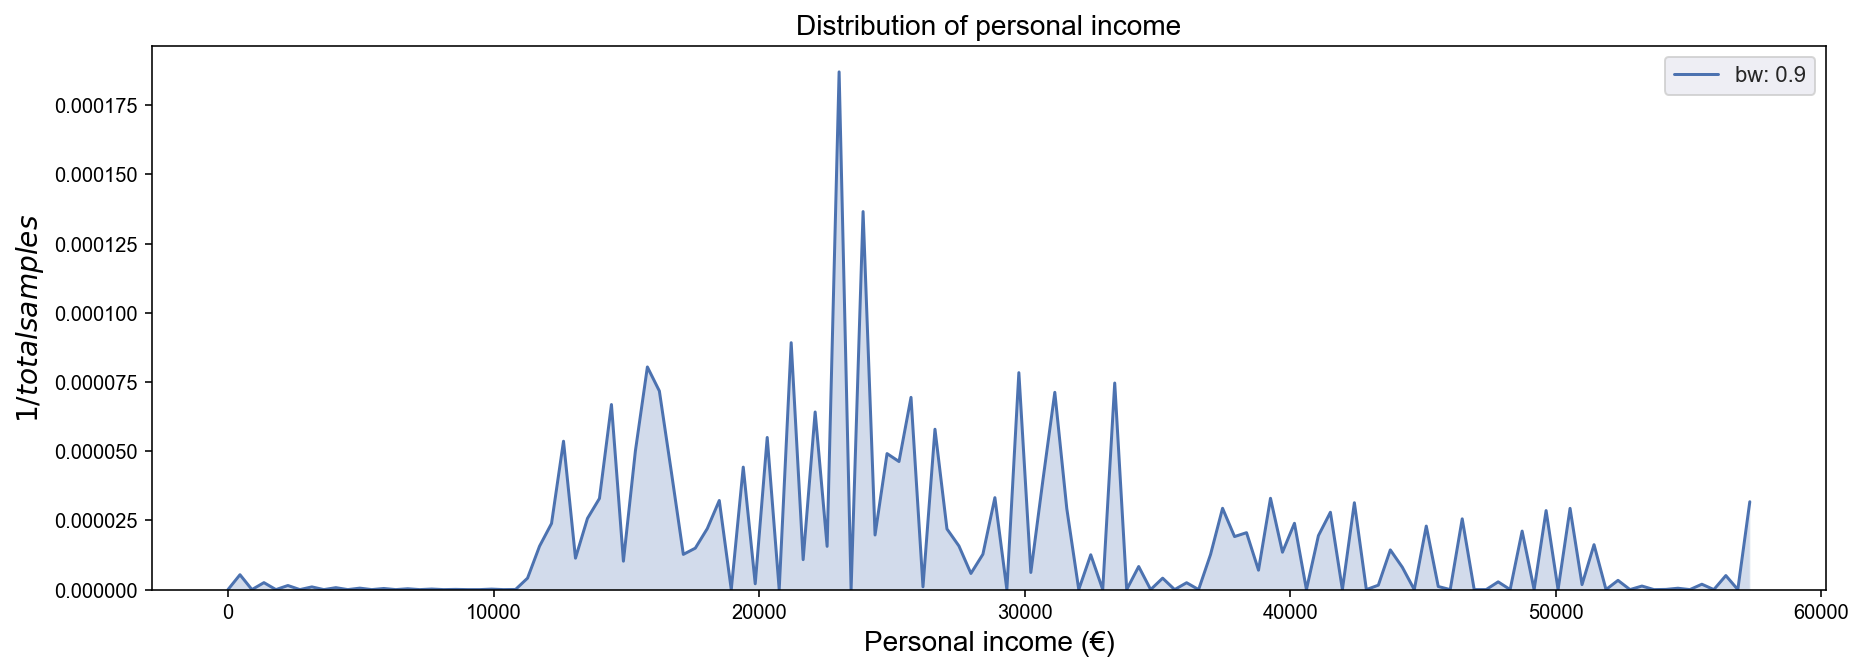

In [38]:

fig, ax = plt.subplots(1,1, figsize=(15,5))

# seaborn goes in first subplot
sns.set(font_scale=1)
sns.kdeplot(nbh_data.income_euros, bw=0.9, label="bw: 0.9", shade=True, color="b");
ax.set_title('Distribution of personal income', fontsize=14)
ax.set_xlabel('Personal income (€)', fontsize=14 )
ax.set_ylabel(r'$1/total samples$', fontsize=14)



**The distribution seems to be centered approximately around €24.000 for the neighborhoods.**

Therefore it is nice to see scatterplots and spatial plots of groups with an income below €20.000 and a group with income above €30.000, compare it with a % ethnic.

Text(0, 0.5, '$1/total samples$')

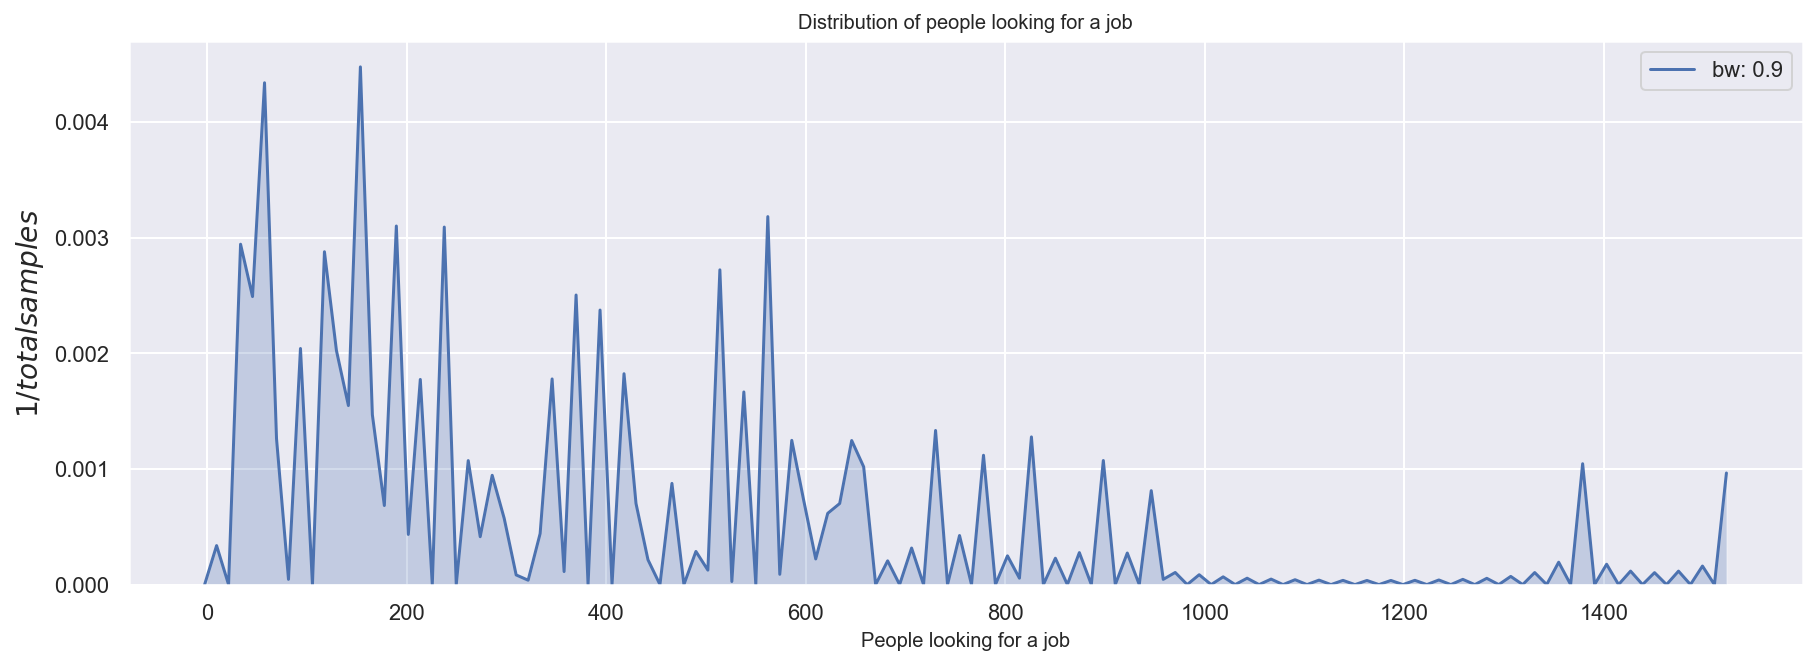

In [39]:
fig, ax = plt.subplots(1,1, figsize=(15,5))

# seaborn goes in first subplot
sns.set(font_scale=1)
sns.kdeplot(nbh_data.no_job, bw=0.9, label="bw: 0.9", shade=True, color="b");
ax.set_title('Distribution of people looking for a job', fontsize=10)
ax.set_xlabel('People looking for a job', fontsize=10 )
ax.set_ylabel(r'$1/total samples$', fontsize=14)


**The distribution seems to be very spread. Therefore, categorizing will be hard.**

Still, it is nice to see scatterplots and spatial plots of groups with a low (100) and high(400) amount of people looking a job. These are rought estimates since the variance is high. Later in this **Notebook** 

**With scatterplots I will find out if there is any relation between the different variables**

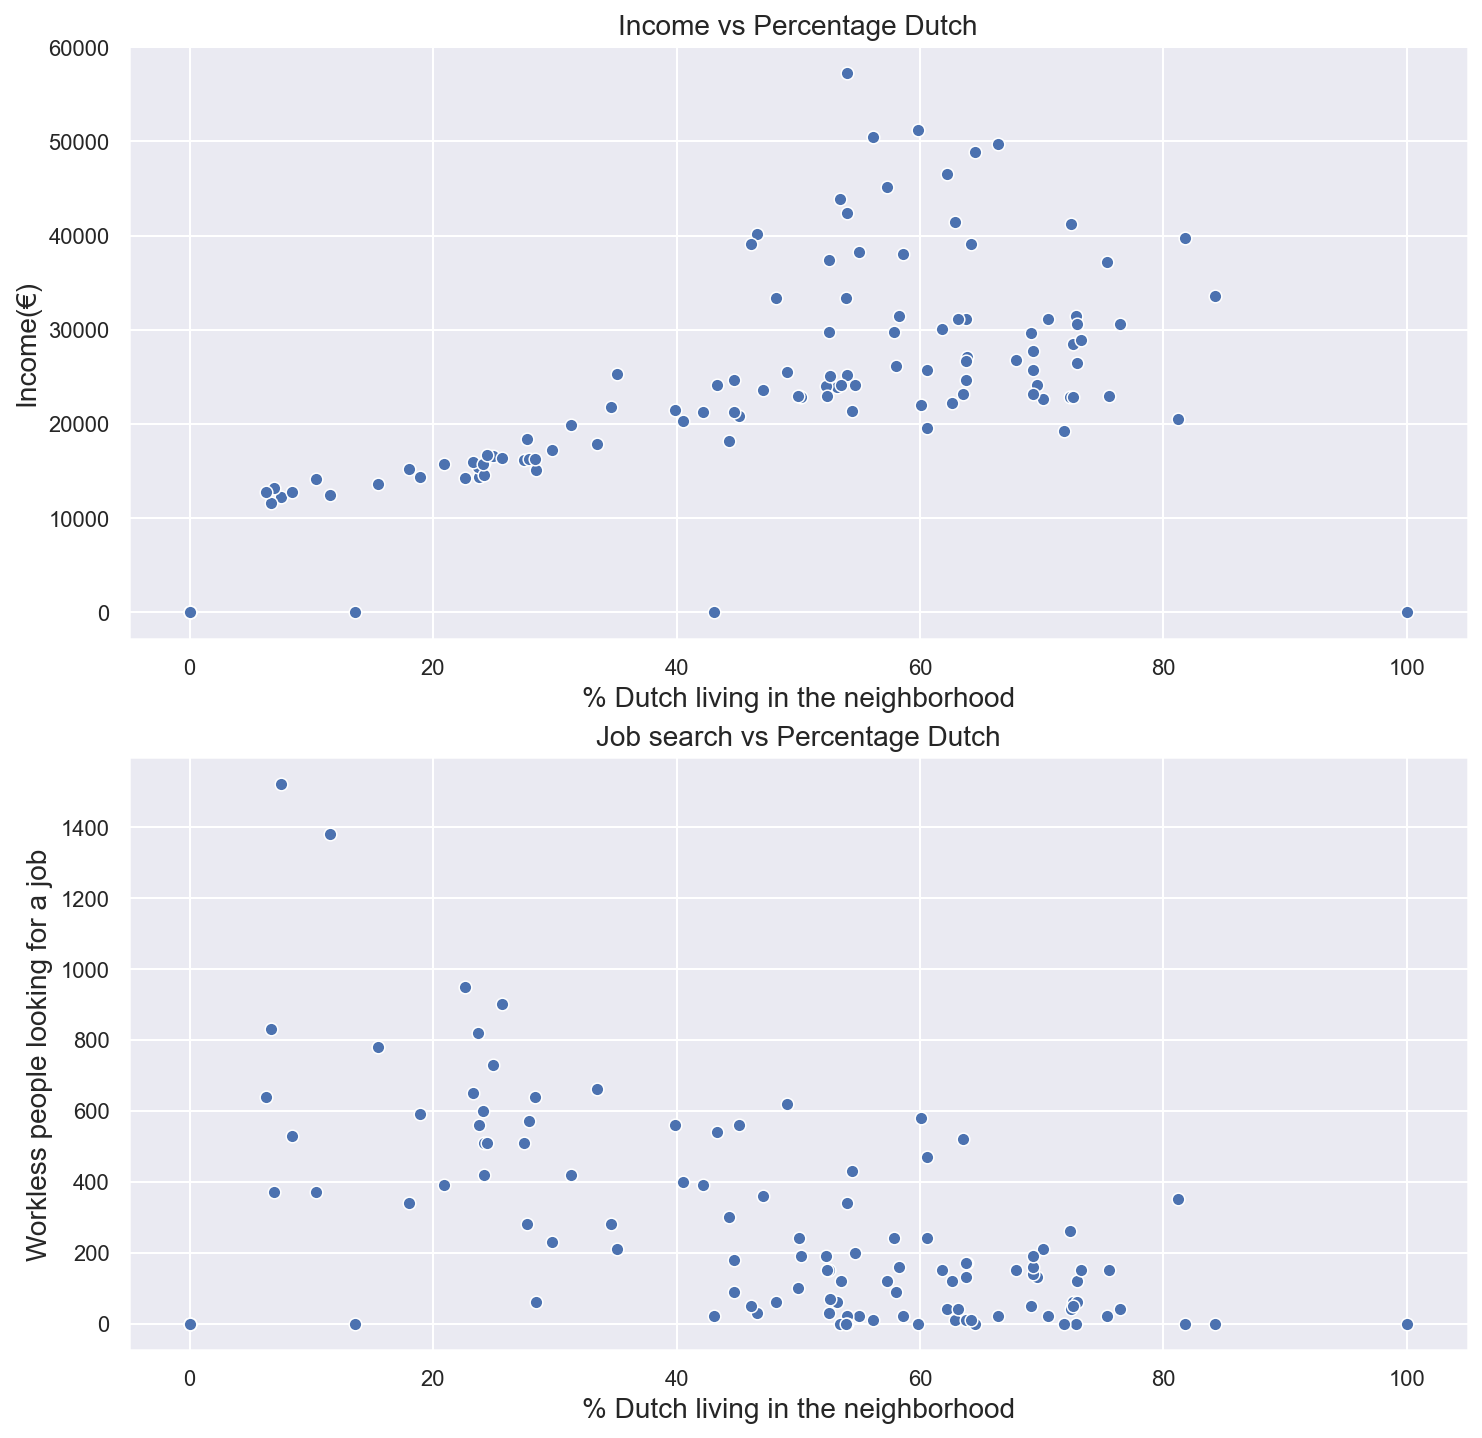

In [40]:
#make 2 separate scatterplots
f, ax = plt.subplots(2,1, figsize=(12, 12))
sns.scatterplot(x=nbh_data.Dutch_percent.tolist(), y=nbh_data.income_euros.tolist(), data=nbh_data, ax=ax[0], s = 40);
sns.set(font_scale = 1)
ax[0].set_xlabel(r'% Dutch living in the neighborhood', fontsize=14);
ax[0].set_ylabel('Income(€)', fontsize=14);
ax[0].set_title('Income vs Percentage Dutch', fontsize=14)

sns.scatterplot(x=nbh_data.Dutch_percent.tolist(), y=nbh_data.no_job.tolist(), data=nbh_data, ax=ax[1], s = 40);
ax[1].set_xlabel(r'% Dutch living in the neighborhood', fontsize=14);
ax[1].set_ylabel('Workless people looking for a job', fontsize=14);
ax[1].set_title('Job search vs Percentage Dutch', fontsize=14)
plt.show();

Text(0.5, 1.0, 'Job search vs Percentage Dutch')

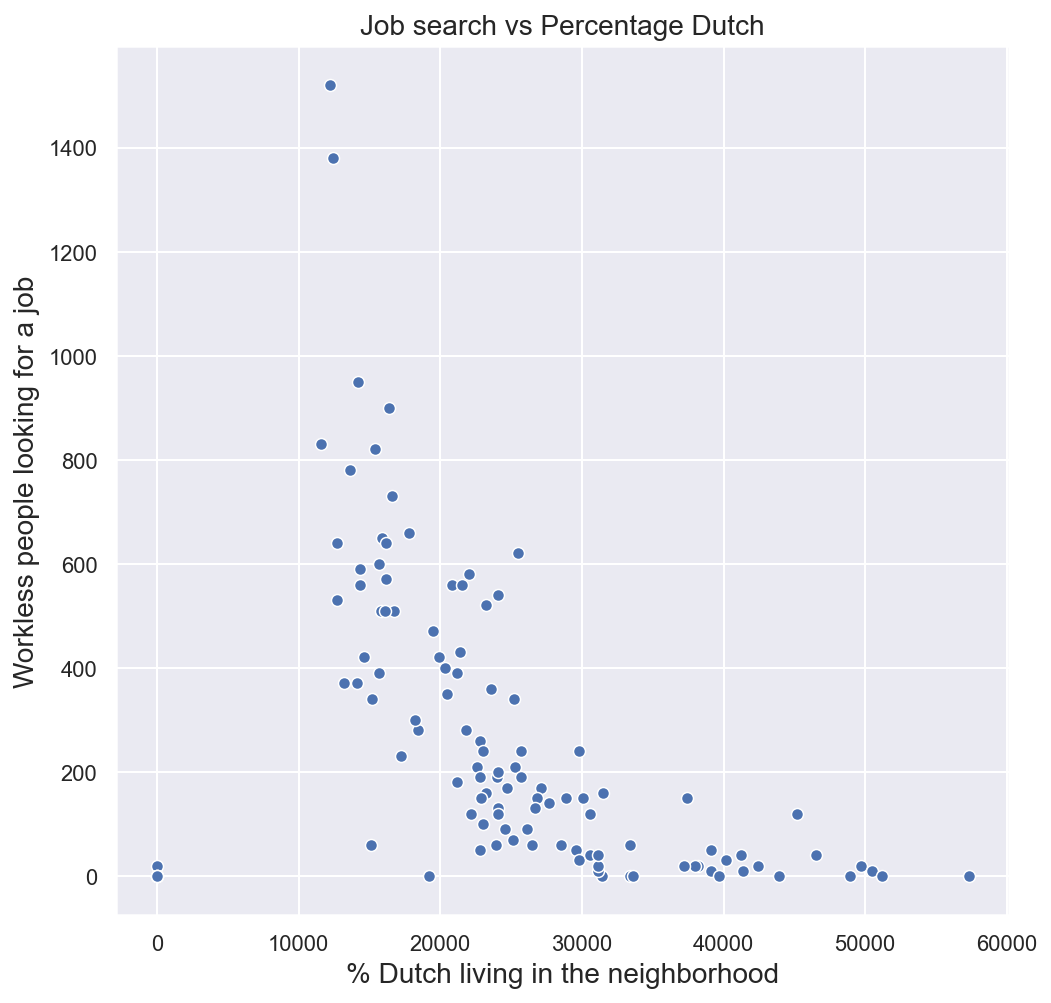

In [41]:
#scatterplot between income and job search

f, ax = plt.subplots(1,1, figsize=(8, 8))

#see if there is a relation between neighborhoods'income and people looking for a job
sns.scatterplot(x=nbh_data.income_euros.tolist(), y=nbh_data.no_job.tolist(), data=nbh_data, ax=ax); 
sns.set(font_scale=1)
ax.set_xlabel(r'% Dutch living in the neighborhood', fontsize=14);
ax.set_ylabel('Workless people looking for a job', fontsize=14);
ax.set_title('Job search vs Percentage Dutch', fontsize=14)

As we saw, EDA with scatterplots and kernel density estimates do not tell us much if the DataFrame is not divided in subgroups that depict relevant characteristics. Hence, 4 subgroups will be made in total.

## EDA on subgroups of DataFrame ##
As we saw, EDA with scatterplots and kernel density estimates do not tell us much if the DataFrame is not divided in subgroups that depict relevant characteristics. Hence, 4 subgroups will be made in total.

- Group 1: €20.000(low income) 
- Group 2: €30.000 (high income)
- Group 3: neighborhoods with people looking for a job below 100
- Group 4: neighborhoods with people looking for a job above 400

In [42]:
#one subfigure

# Replace response variable values with a binary response (High income or Low income)
#this didnt work sadly to make it categorical and be able to implement a legend
#nbh_data['income_euros'].replace( to replace = [lambda x: if x>30000],value='High income',inplace=True)

#GROUP of neighborhoods with less than 20000 income
low_income = nbh_data[(nbh_data['income_euros'] <= 20000)] #low income dataframe

#GROUP of neighborhoods with more than 30000 income
high_income = nbh_data[(nbh_data['income_euros'] >= 30000)] #low income dataframe


#one subfigure
#GROUP of neighborhoods with people looking for a job below 100 
low_job_search = nbh_data[(nbh_data['no_job'] <= 100)] #low income dataframe

#GROUP of neighborhoods with people looking for a job above 400
high_job_search = nbh_data[(nbh_data['no_job'] >= 400)] #low income dataframe


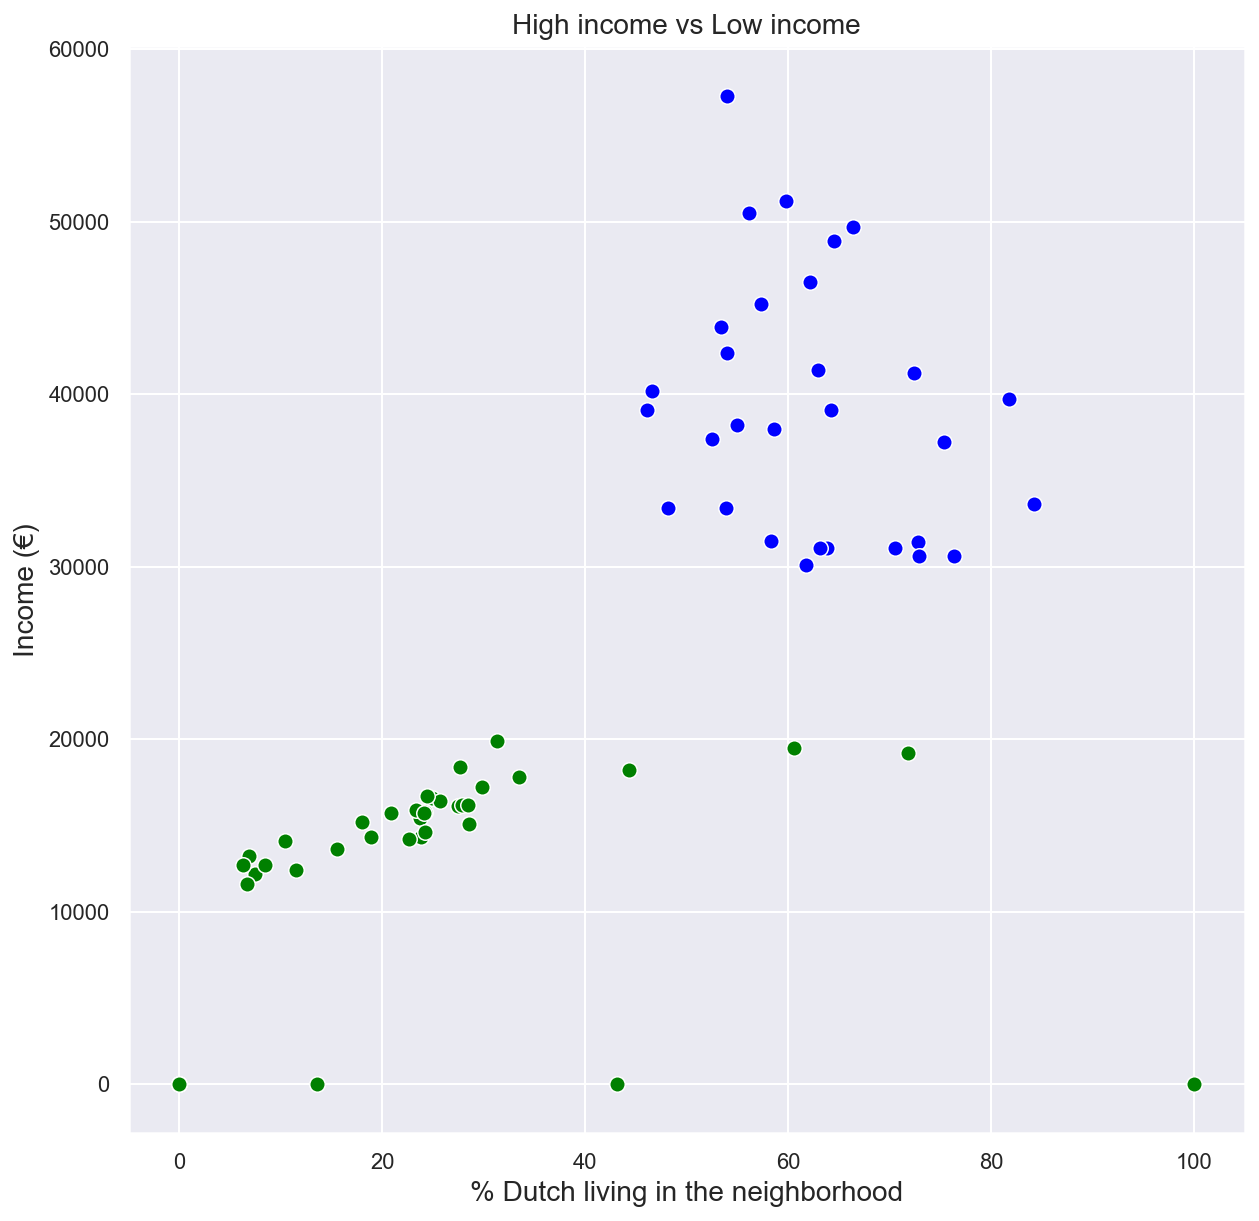

In [43]:
#scatterplot
f, ax = plt.subplots(1,1, figsize=(10, 10))
sns.scatterplot(x=high_income.Dutch_percent.tolist(), y=high_income.income_euros.tolist(), color = 'blue',data=high_income, ax=ax, s = 60);
sns.scatterplot(x=low_income.Dutch_percent.tolist(), y=low_income.income_euros.tolist(), color = 'green', data=high_income, ax=ax, s = 60);

ax.set_xlabel(r'% Dutch living in the neighborhood', fontsize=14);
ax.set_ylabel('Income (€)', fontsize=14);
ax.set_title('High income vs Low income', fontsize=14)
plt.show();

Text(0.5, 1.0, 'Distribution of neighborhoods with low income (<€20.000) and high income (>€30.000)')

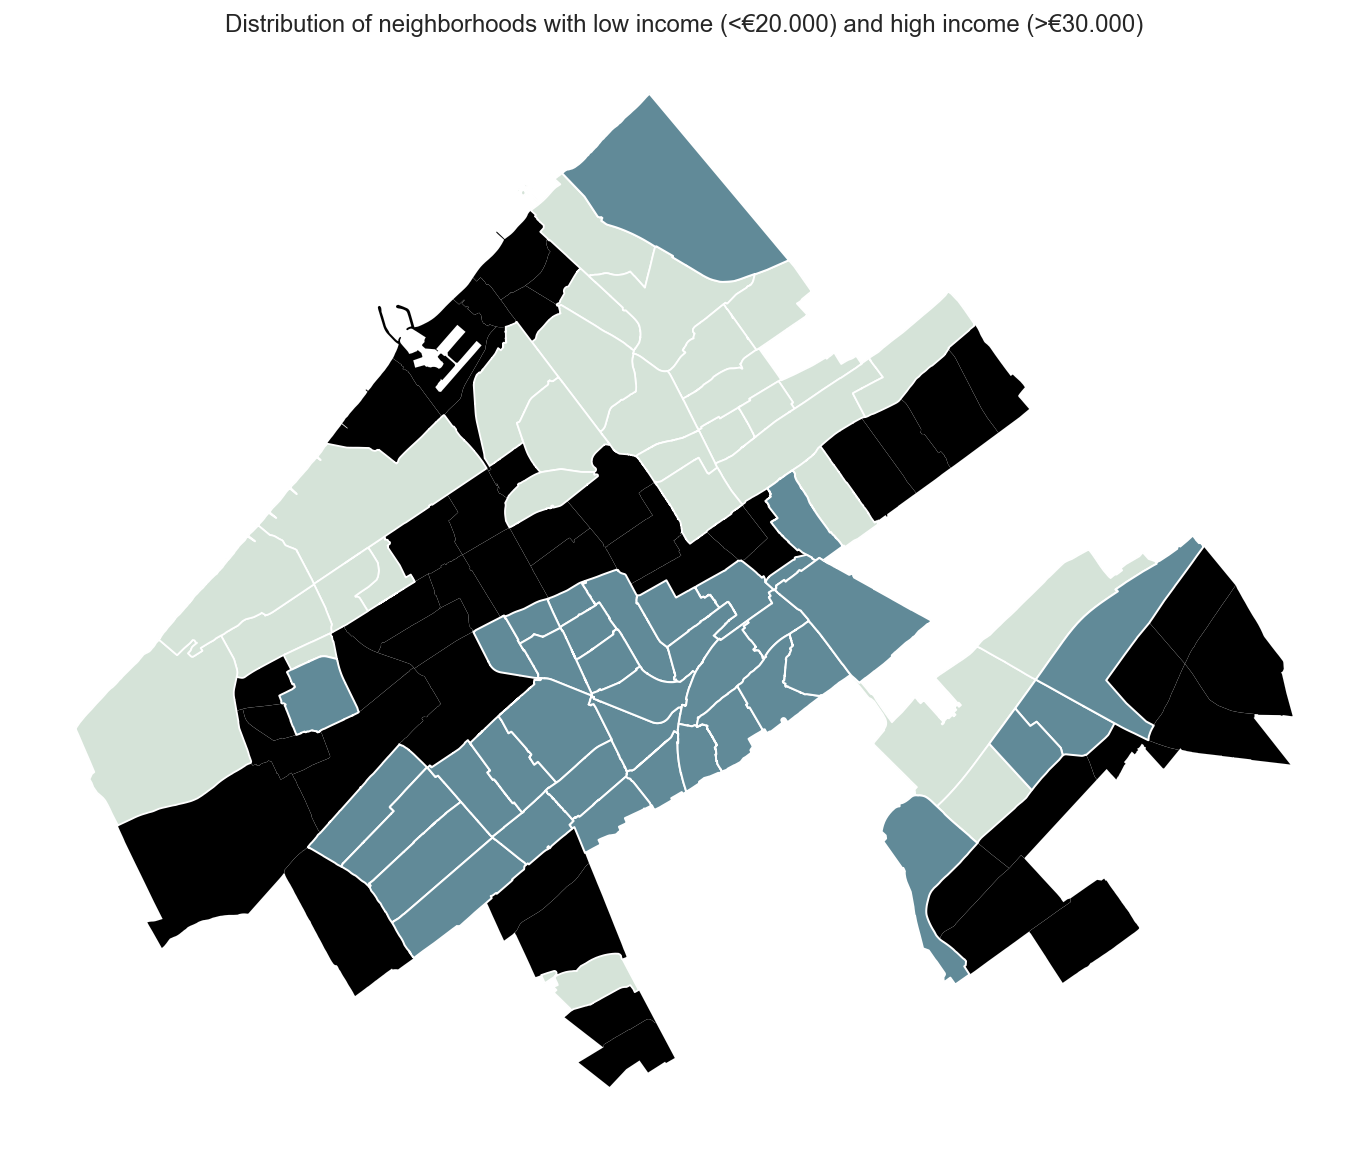

In [44]:
#Spatial plot
f, ax = plt.subplots(1, figsize=(12, 12))
# Base layer with all the areas for the background
nbh_data.plot(facecolor='black', linewidth=0.025, ax=ax)


high_income.plot(alpha=1, facecolor='#D5E3D8', linewidth=0.9, ax=ax,label = 'High income') #high_income plot
low_income.plot(alpha=1, facecolor='#618A98', linewidth=1, ax=ax,  label = 'Low income') #low_income plot
ax.set_axis_off()
ax.set_title("Distribution of neighborhoods with low income (<€20.000) and high income (>€30.000)")


**Light blue are neighborhoods with an income higher than €30.000
Dark blue blue are neighborhoods with an income lower than €20.000**



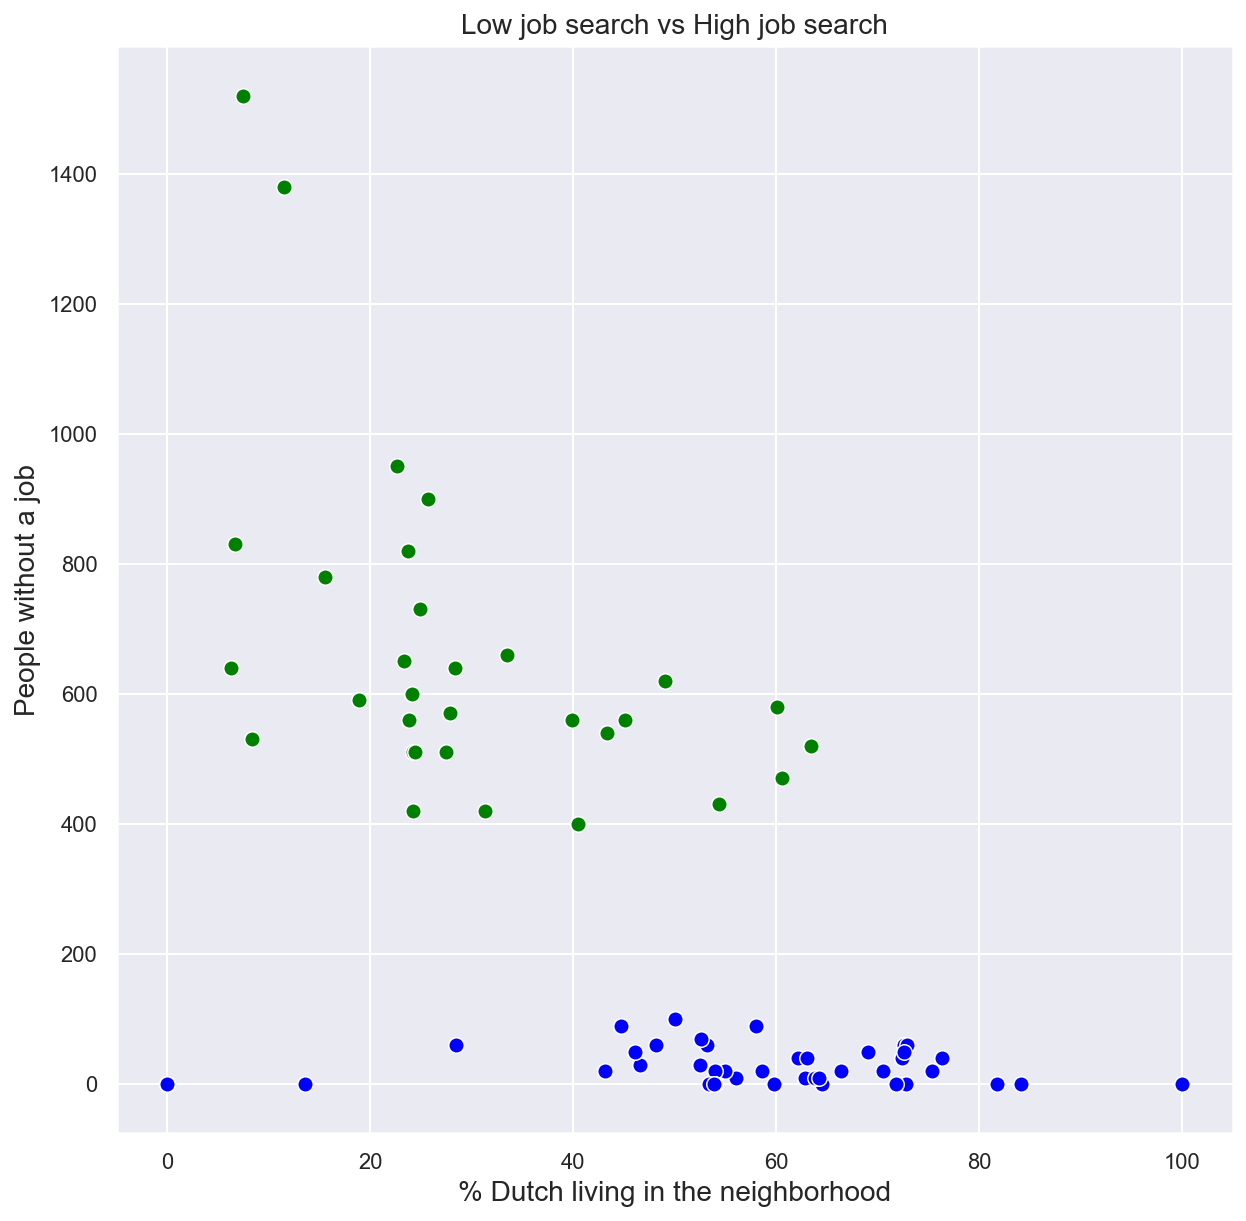

In [45]:
#scatterplot
f, ax = plt.subplots(1,1, figsize=(10, 10))
sns.scatterplot(x=low_job_search.Dutch_percent.tolist(), y=low_job_search.no_job.tolist(), color = 'blue',data=low_job_search, ax=ax, s = 60);
sns.scatterplot(x=high_job_search.Dutch_percent.tolist(), y=high_job_search.no_job.tolist(), color = 'green', data=high_job_search, ax=ax, s = 60);

ax.set_xlabel(r'% Dutch living in the neighborhood', fontsize=14);
ax.set_ylabel('People without a job', fontsize=14);
ax.set_title('Low job search vs High job search', fontsize=14)
plt.show();

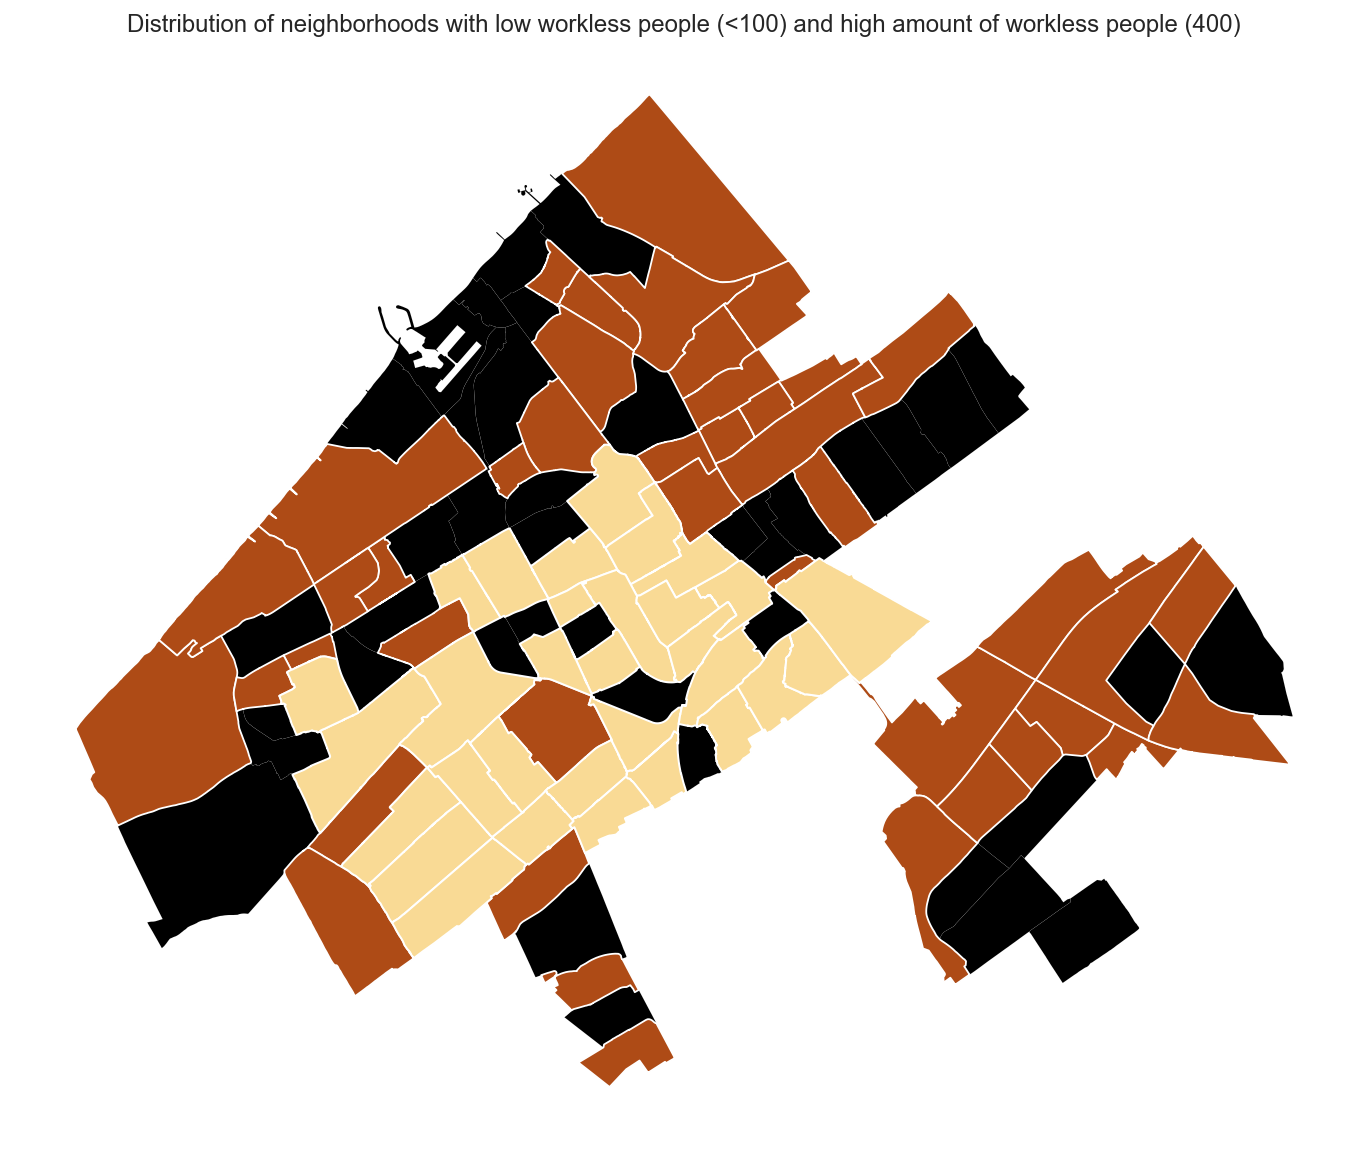

In [46]:
#second subfigure

#Spatial plot
f, ax = plt.subplots(1, figsize=(12, 12))
# Base layer with all the areas for the background
nbh_data.plot(facecolor='black', linewidth=0.025, ax=ax)


low_job_search.plot(alpha=1, facecolor='#AE4B16', linewidth=0.9, ax=ax,label = 'High income')
high_job_search.plot(alpha=1, facecolor='#F9DA95', linewidth=1, ax=ax,  label = 'Low income')
ax.set_title("Distribution of neighborhoods with low workless people (<100) and high amount of workless people (400)")
ax.set_axis_off()

#third subfigure the distribution of ethnic in spatial plot

**Brown red are areas with a low job search/ workless people (below 100)
Yellow are neighborhoods with a high job search/ workless people (above 400)**


## Autocorrelations , Network relations, etc ##

In [156]:
import osmnx as ox, geopandas as gpd
import contextily as ctx
%matplotlib inline
ox.config(log_console=True, use_cache=True)
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 30)
from pysal.lib import weights
from libpysal.io import open as psopen

**Just nice to show some of the OSM graphs**

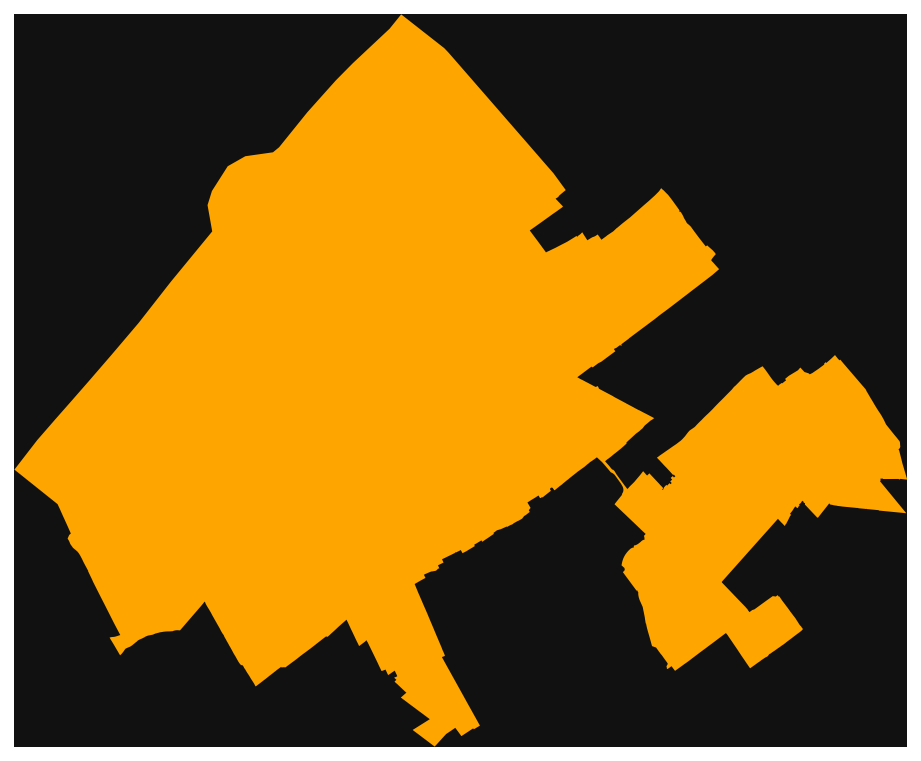

In [157]:
#Get the polygon data first out of the 'geometry' column
polygon = nbh_data['geometry']
polygon

#show what OSM shows when trying to plot the Hague

The_Hague = ox.geocode_to_gdf('The Hague, The Netherlands')

#Project it
area = ox.project_gdf(The_Hague)
fig, ax = ox.plot_footprints(area)

In [161]:
The_Hague = ox.graph_from_place('The Hague, The Netherlands')
Hague_projected = ox.project_graph(The_Hague)
fig, ax = ox.plot_graph(Hague_projected, figsize=(10,10), node_size=0, edge_linewidth=0.5, ax=ax)

ax.set_title("OSM Graph of The Hague")
fig.show()

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'OSM Graph of The Hague with overlay using ctx basemap')

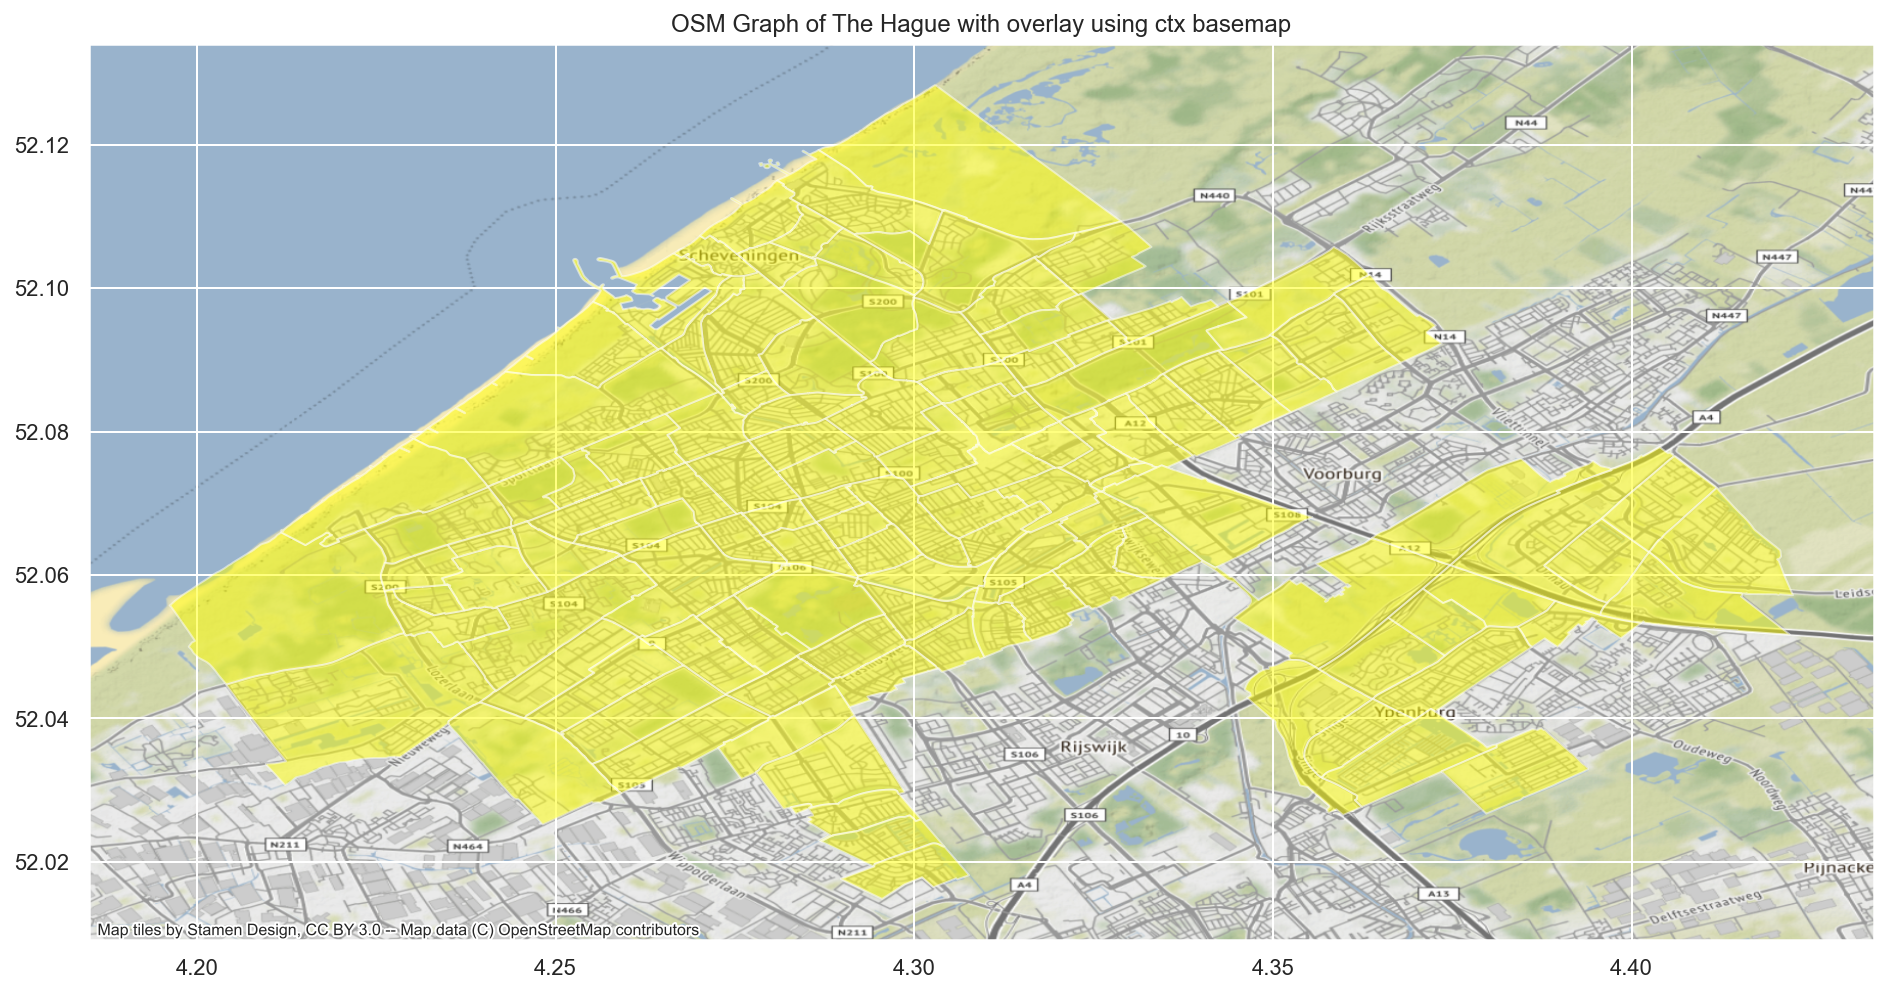

In [158]:
# Add background map, expressing target CRS so the basemap can be
# reprojected (warped)


ax = neigb.plot(figsize=(16, 16), alpha=0.5, color='yellow');
# Add background map, expressing target CRS so the basemap can be
# reprojected (warped)
#overlay The Hague, showing the sea and other areas!
ctx.add_basemap(ax, crs=neigb.crs)
ax.set_title("OSM Graph of The Hague with overlay using ctx basemap")

#crazy how Ypenburg is part of The Hague

This solely fulfills the purpose of a visualisation for the infrastructure of The Hague. It is recommended to future research if this infrastructure plays a role in the distribution of income and amount of workless people.

## Spatial weights ##

*I want to find all surrounding neighbors of certain neighborhoods of interest. 
For example, I want to know the queen weight of a rich neighborhoods like Kijkduin. From this weight, I can compare it to the spatial plots made previously for high income, to* **see if the amount of surrounding neighborhoods is equal to higher subsets of rich neighborhoods.**

In [53]:
shp = 'data/neighborhoods.shp'
# Read the file in
#shp = shp.set_index('neigb_cijf')
neigb = gpd.read_file(shp)
neigb.head(100)

neighb_cbs               neigb_cijf                                           geometry
0            Oostduinen            70 Oostduinen  POLYGON ((4.30290 52.12832, 4.30298 52.12827, ...
1         Belgisch Park         71 Belgisch Park  POLYGON ((4.28056 52.11706, 4.28053 52.11706, ...
2         Westbroekpark         73 Westbroekpark  POLYGON ((4.29171 52.10745, 4.29181 52.10739, ...
3             Duttendel             74 Duttendel  POLYGON ((4.32252 52.10768, 4.32252 52.10766, ...
4           Nassaubuurt           48 Nassaubuurt  POLYGON ((4.31943 52.09247, 4.31943 52.09247, ...
..                  ...                      ...                                                ...
95  Parkbuurt oosteinde  103 Parkbuurt Oosteinde  POLYGON ((4.29789 52.02947, 4.29791 52.02945, ...
96            Lage Veld            104 Lage Veld  POLYGON ((4.30093 52.02593, 4.30258 52.02402, ...
97           Zonne Veld           105 Zonne Veld  POLYGON ((4.30419 52.02215, 4.30427 52.02206, ...
98       Vlietzoom-West       106 Vlietzoom-West  POLYGON ((4.34031 52.06195, 4.34039 52.06189, ...
99     Vliegeniersbuurt     107 Vliegeniersbuurt  POLYGON ((4.34913 52.04689, 4.34942 52.04690, ...

[100 rows x 3 columns]

In [54]:
#load queen weights from all neighborhoods
w_queen = weights.Queen.from_dataframe(neigb, idVariable="neighb_cbs")
w_queen

In [55]:
#show all the weights for every neighborhood of The Hague
queen_card = pd.Series(w_queen.cardinalities)
queen_card

Archipelbuurt                8
Arendsdorp                   6
Belgisch Park                5
Bezuidenhout-Midden          3
Bezuidenhout-Oost            3
                            ..
Zijden, Steden en Zichten    5
Zonne Veld                   1
Zorgvliet                    6
Zuiderpark                   6
Zuidwal                      6
Length: 114, dtype: int64

In [56]:
#find cardinalities of desired neighborhood

Neighbors_Kijkd = w_queen.cardinalities['Kijkduin']
Neighbors_Kijkd #Kijkd Neighbors

4

In [57]:
# Average number of neighbors of the neighborhoods
w_queen.mean_neighbors

5.140350877192983

In [58]:
#Let's plot Kijkduin (famous rich neighborhood)
neigb = neigb.set_index("neighb_cbs")


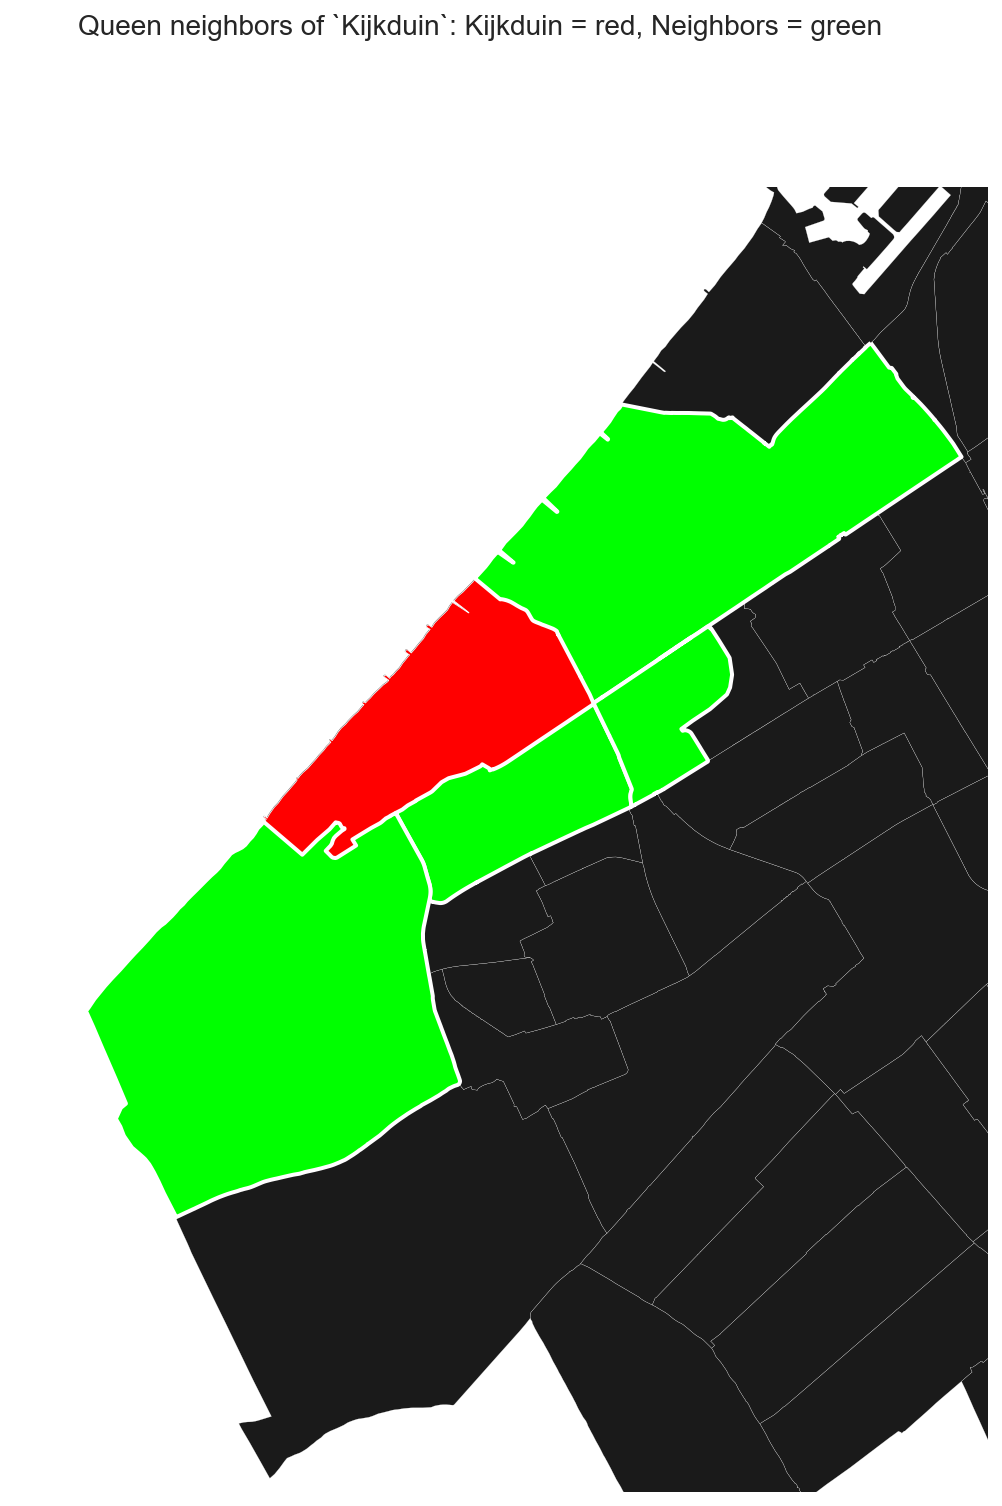

In [60]:
# Setup figure
f, ax = plt.subplots(1, figsize=(12, 12))
# Plot base layer of polygons
neigb.plot(ax=ax, facecolor='k', linewidth=0.1)
# Select focal polygon
# NOTE we pass both the area code and the column name
#     (`geometry`) within brackets!!!

focus = neigb.loc[['Kijkduin'], ['geometry']]
# Plot focal polygon
focus.plot(facecolor='red', alpha=1, linewidth=0.4, ax=ax)
# Plot neighbors
neigb_kijkd = neigb.loc[w_queen['Kijkduin'], :]
neigb_kijkd.plot(ax=ax, facecolor='lime', linewidth=2)
# Title
f.suptitle("Queen neighbors of `Kijkduin`: Kijkduin = red, Neighbors = green", fontsize = 14)
ax.set_ylim(52.03, 52.1)
ax.set_xlim(4.19, 4.275)
ax.set_axis_off()
# # Style and display on screen

plt.show()

**In red is 'Kijkduin' and the surrounding neighbors are in green**



## Finding out of plot ##
**New conclusion: If you look at this same area in the spatial plot of Distribution of personal income and % Dutch, Kijkduin and surrounding areas have a reasonably high income (€30.000 - €50.000) and >70% of the neighborhood are Dutch natives. This supports that rich neighborhoods lie around the same area. Furthermore, the hypothesis is supported.**

## Spatial lag ##
On this Section I will compute the spatial lag to be able to plot the LISA plot for Personal Income(€) and job search. This way I can determine global autocorrelation of the variables, and spot areas with outlier values in my data, as well as local autocorrelation to find where, if (and why) clusters are made for these 2 variables of interest.

I will not calculate the spatial lag for % Dutch or % ethnic, since I don't feel this autocorrelation is relevant to my hypothesis. I am not inspecting where clusters are made of these attributes.

In [62]:
# # - Create the Moran Plot with your data to explore the spatial correlation of selected region.
# Row-standardize the queen matrix
w_queen.transform = 'R'

# Compute spatial lag of `imd_score`

w_queen_score = weights.lag_spatial(w_queen, nbh_data['income_euros'])


#include it in the DataFrame
nbh_data['w_queen_score'] = w_queen_score

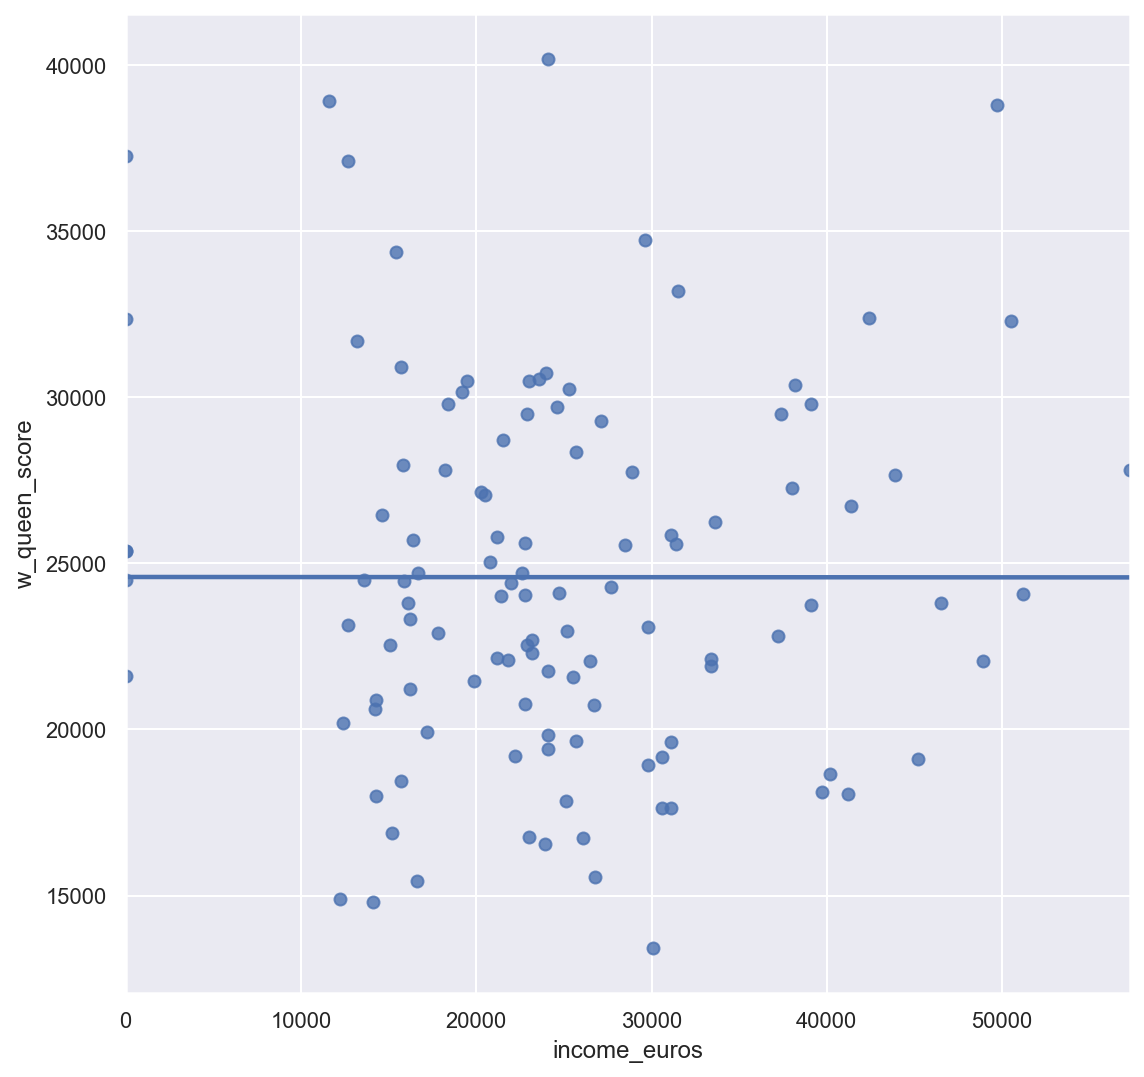

In [63]:
# Setup the figure and axis for income euros autocorrelation
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x="income_euros", y="w_queen_score", data=nbh_data, ci=None)
# Display
plt.show()


There is no evident spatial autocorrelation.

In [64]:
from pysal.lib import weights
from pysal.explore import esda
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation
#necessary packages

In [65]:
#calculate Moran's I
mi = esda.Moran(nbh_data['income_euros'], w_queen)
mi.I

-0.0002111134768041536

**Meaning the value of the attribute is pretty random. Let's visualise this in a LISA plot. The function will standardize the weights automatically.**

In [66]:
lisa = esda.Moran_Local(nbh_data['income_euros'], w_queen) 

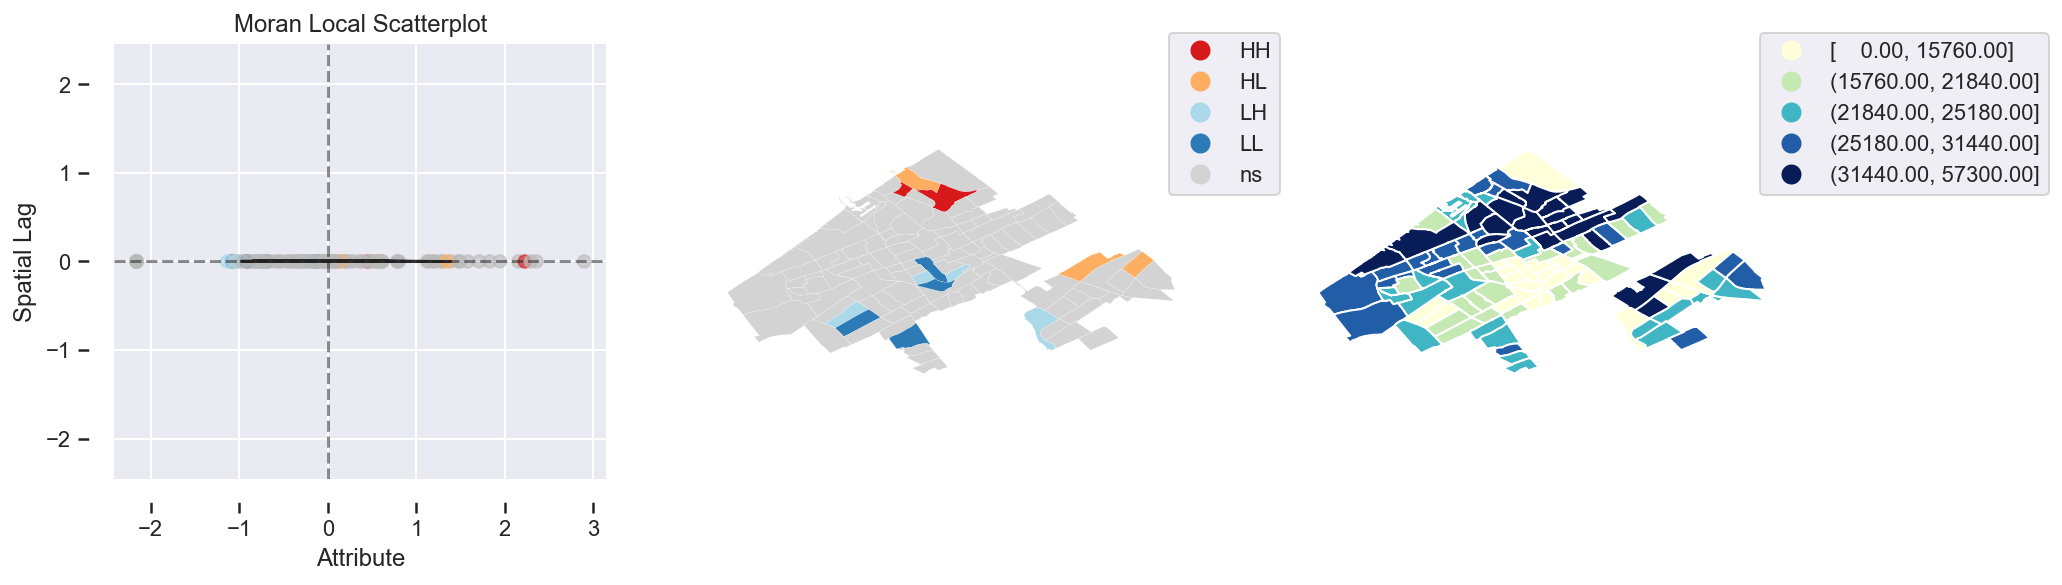

In [67]:
# Break observations into significant or not
lisa.p_sim < 0.05   #chosen threshold, referenced from lab exercises.
plot_local_autocorrelation(lisa, nbh_data, 'income_euros'); #make Moran, LISA and interval plot


**The data is significantly random. There are no significant clusters that can be formed. Job Seach/Workless people will be analysed now.**

In [68]:
# # - Create the Moran, LISA and intervl analysis

# Compute spatial lag of `no job`
w_queen_score_no_job = weights.lag_spatial(w_queen, nbh_data['no_job'])

#include it in the DataFrame
nbh_data['w_queen_score_no_job'] = w_queen_score_no_job

#calculate Moran's I
mi = esda.Moran(nbh_data['no_job'], w_queen)
mi.I

0.1516285505595954

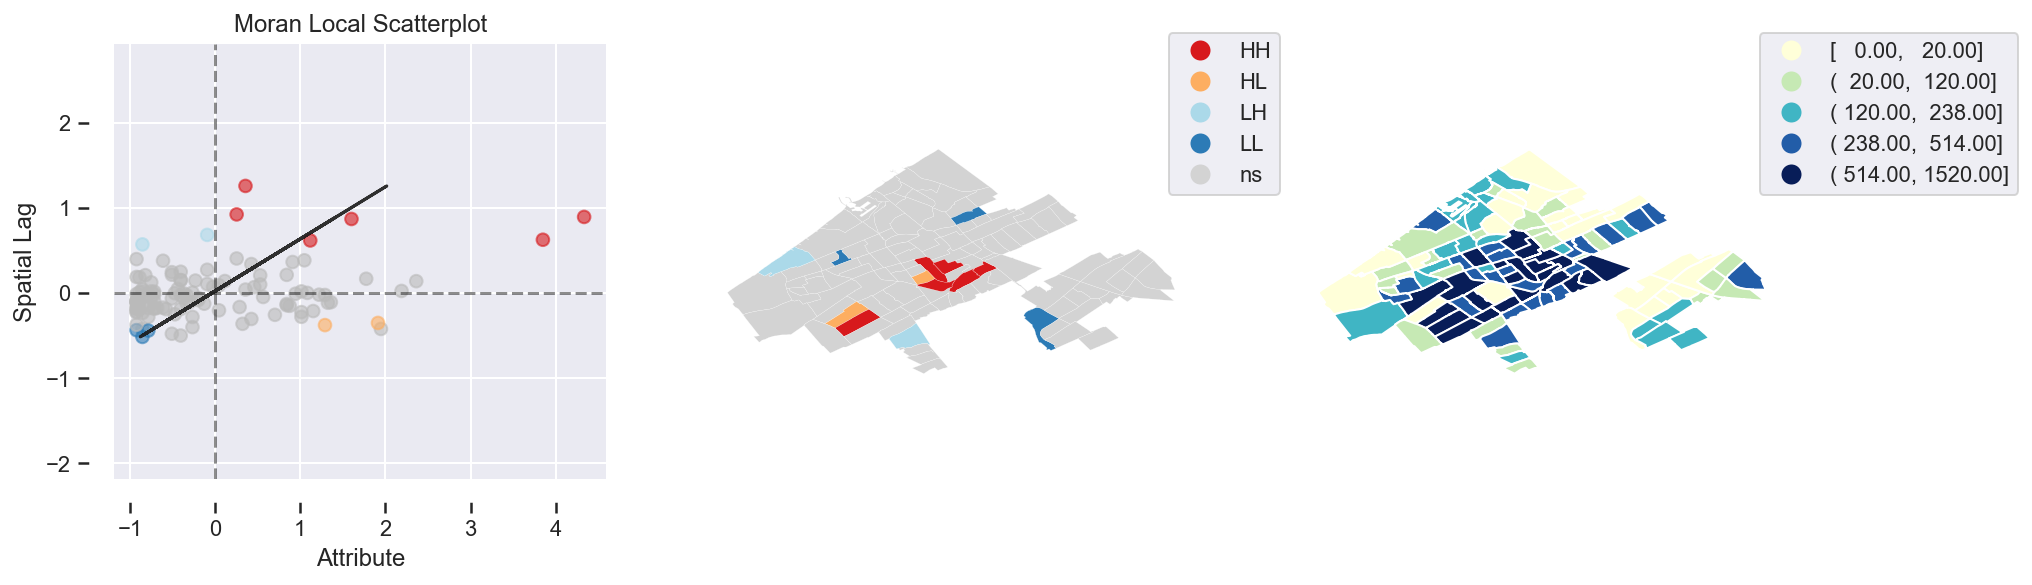

In [69]:
lisa = esda.Moran_Local(nbh_data['no_job'], w_queen) 

# Break observations into significant or not
lisa.p_sim < 0.05   #chosen threshold, referenced from lab exercises.

plot_local_autocorrelation(lisa, nbh_data, 'no_job'); #make Moran, LISA and interval plot



**This data is somewhat less random than the values of income. There are small High High clusters where the percentage of ethnic people is reasonably high compared to the % Dutch natives. This seems to be a positive indicator for the hypothesis. However, there are no real clusters formed to be able to say f.e. "Areas with low job search are close to each other."**

## Correlation ##
 Let's analyse if there are any correlations between the variables.

In [70]:
#use function to find correlation between each of the attributes
#Pearson correlation method is used. This is the standard
nbh_data.corr()

#No exact correlation available. Consider there are some outliers values in the data

Dutch_percent  ethnic_percent  income_euros    no_job  w_queen_score  w_queen_score_no_job
Dutch_percent              1.000000       -0.732499      0.595643 -0.576239      -0.096352             -0.162670
ethnic_percent            -0.732499        1.000000     -0.334029  0.684473      -0.000259              0.281962
income_euros               0.595643       -0.334029      1.000000 -0.467104      -0.000430             -0.111104
no_job                    -0.576239        0.684473     -0.467104  1.000000      -0.081017              0.304671
w_queen_score             -0.096352       -0.000259     -0.000430 -0.081017       1.000000             -0.483252
w_queen_score_no_job      -0.162670        0.281962     -0.111104  0.304671      -0.483252              1.000000

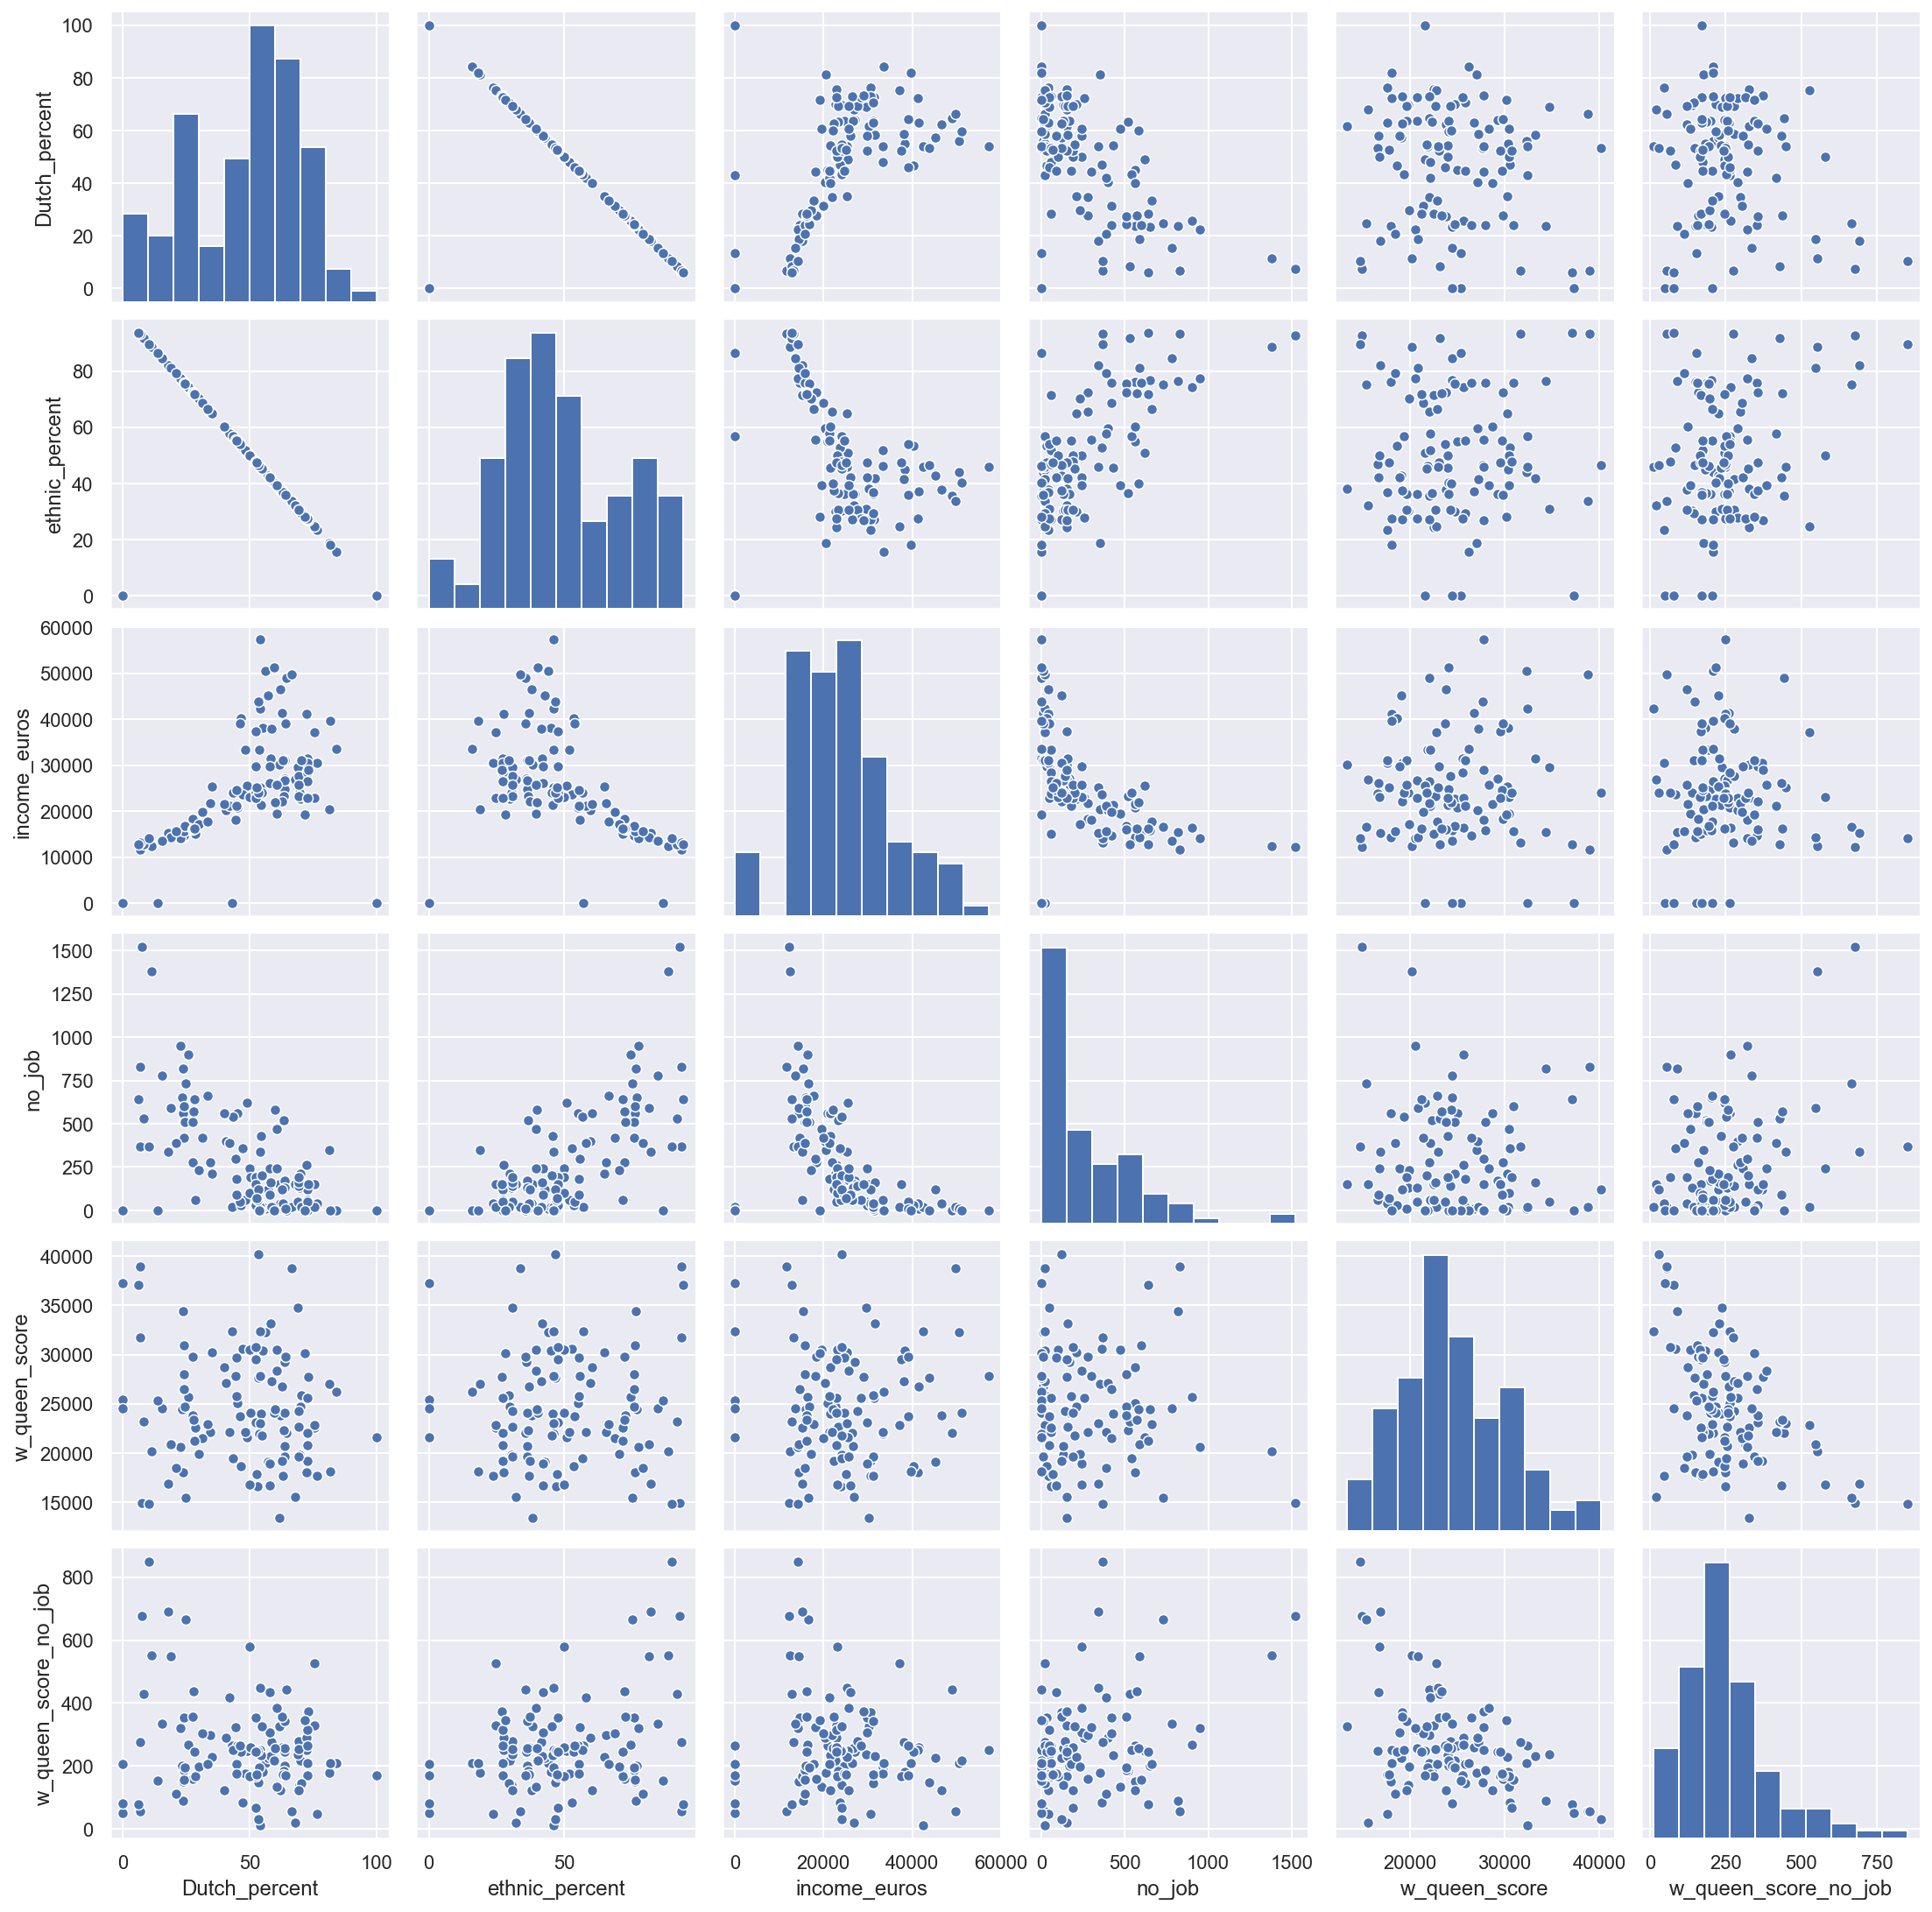

<Figure size 5040x5040 with 0 Axes>

In [71]:
##Plot correlation graph
sns.pairplot(nbh_data)
#make graph BIGGER
plt.figure(figsize=(70,70))
plt.show()

There is no clear correlation visible. However, some values seem to cluster in a way that almost forms a correlation.

## Conclusion: Data that supports my hypothesis ##

The spatial plots I plotted with variables:
- %Dutch
- %ethnic
- Income(€) 

These spatial plots with choroplets already support the hypothesis. We can clearly see that a neighborhood with lower percentages of ethnic people, have higher income and vice versa for the percentages of Dutch people and lower income. But to make this clear, groups were made of neighborhoods with high incomes and low incomes, or high job searching and low job searching, and then looked at the spatial plot again of percentages to see if the hypothesis can be supported with more robust statements. 

If we look at the **first figure** to support my hypothesis, there is a clear distinction of neighborhoods with an income higher than €30.000 and lower than €20.000. If we look at the spatial plot, these exact neighborhoods with income higher than €30.000 consist of a composition 70% or more Dutch natives, and 30% or less of ethnic people. The same if we look at incomes lower than €20.000. Most of these areas consist of 70% or more ethnic people, and 30% or less of Dutch natives.

If we look at the **second figure** to support my hypothesis, there is a clear distinction of neighborhoods with an job search higher than 400, and lower than 100. These exact neighborhoods with lower job search (100) consist of a composition 70% or more Dutch natives, and 30% or less of ethnic people. The same if we look at higher job search. Most of these areas consist of 70% or more ethnic people, and 30% or less of Dutch natives. 

**However**, there is no exact overlap between the income and job search amount. They slightly differ, and this might be due to:
- Wrongfully grouping the data.
- Wrongfully replacing NaN values with 0

If we look at the **third figure** is a scatterplot of the income, where it is even more visible that neighborhoods with a low income, usually consist of less than 30% of Dutch natives. 

**If you check the table below with the top 10 relevant neighborhoods ->
**5 neighborhoods that support my hypothesis**:
- 116 Vlietzoom-West,  84.2% Dutch, €33.600 income, 0 looking for a job
- 50 Bloemenbuurt-West, 76.4% Dutch, €30.600 income, 40 looking for a job
- 33 Transvaalkwartier-Midden, 6.9% Dutch, €13.200 income, 370 looking for a job
- 15 Schildersbuurt-West, 7.5% Dutch, €12.200 income, 1520 looking for a job
- 32 Transvaalkwartier-Noord, 8.4% Dutch, €12.700 income, 530 looking for a job

These neighborhoods support my hypothesis drastically since you can see a clear difference when the %Dutch is high or low on the income(€) and job search amount of the residents. 

In my opinion, this data is not enough to 100% say that my hypothesis is true. There are many factors playing a role in this socio-economic field, and one shall consider that I had 3 NaNs or less in my data.

If my hypothesis were to be true, it would be important to research what the reason is that this relation is held. In the end we want everybody to gain the same amount (or gradually improved) amount of development.



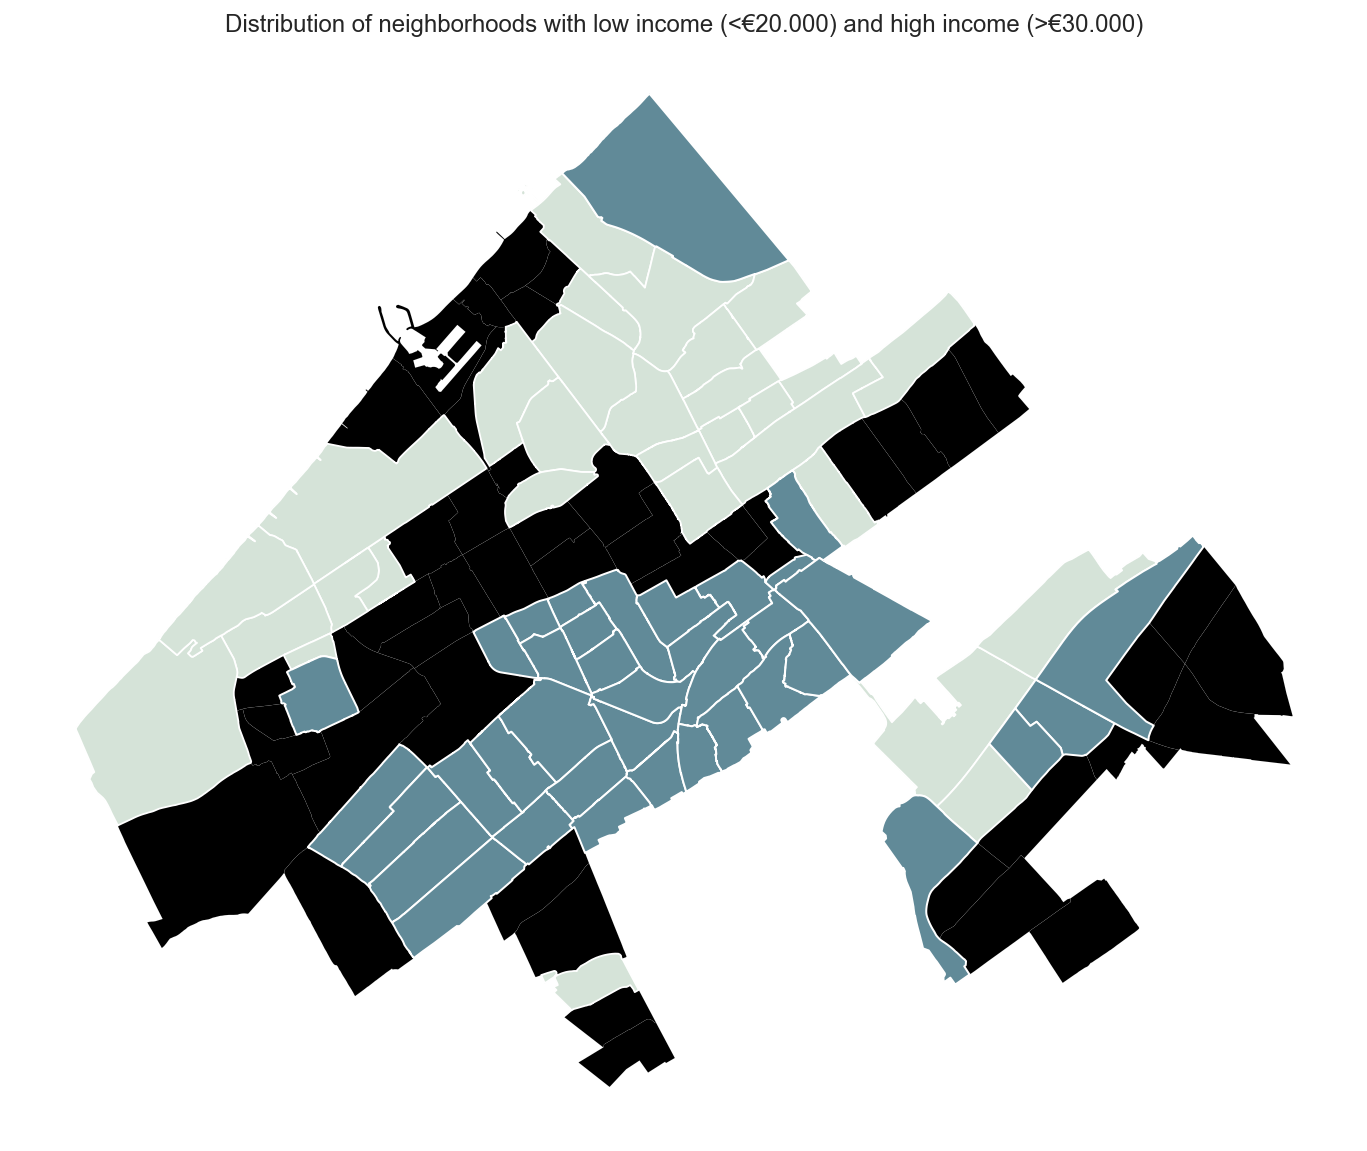

In [72]:
#Spatial plot
f, ax = plt.subplots(1, figsize=(12, 12))
# Base layer with all the areas for the background
nbh_data.plot(facecolor='black', linewidth=0.025, ax=ax)


high_income.plot(alpha=1, facecolor='#D5E3D8', linewidth=0.9, ax=ax,label = 'High income') #high_income plot
low_income.plot(alpha=1, facecolor='#618A98', linewidth=1, ax=ax,  label = 'Low income') #low_income plot
ax.set_title("Distribution of neighborhoods with low income (<€20.000) and high income (>€30.000)")
ax.set_axis_off()

**Light blue are neighborhoods with an income higher than €30.000.
Dark blue blue are neighborhoods with an income lower than €20.000.**

*Write 3(or more) properties of excellence*
This plot encourages the reader to:
- Encourage the eye to compare different pieces of data since only two different colors are used to make comparison of neighborhoods easy.
- Show the data in a clear manner.
- Exclude unneeded dimensions, since I only show where the low and high income is. If I would combine this with other variables (i.e. % Dutch or % ethnic) it would become unclear. Therefore, this plot excludes this dimension, making it possible to just look at the other spatial splot of percentage population to derive fruitful conclusions.
- Encourage the eye to compare different pieces of data

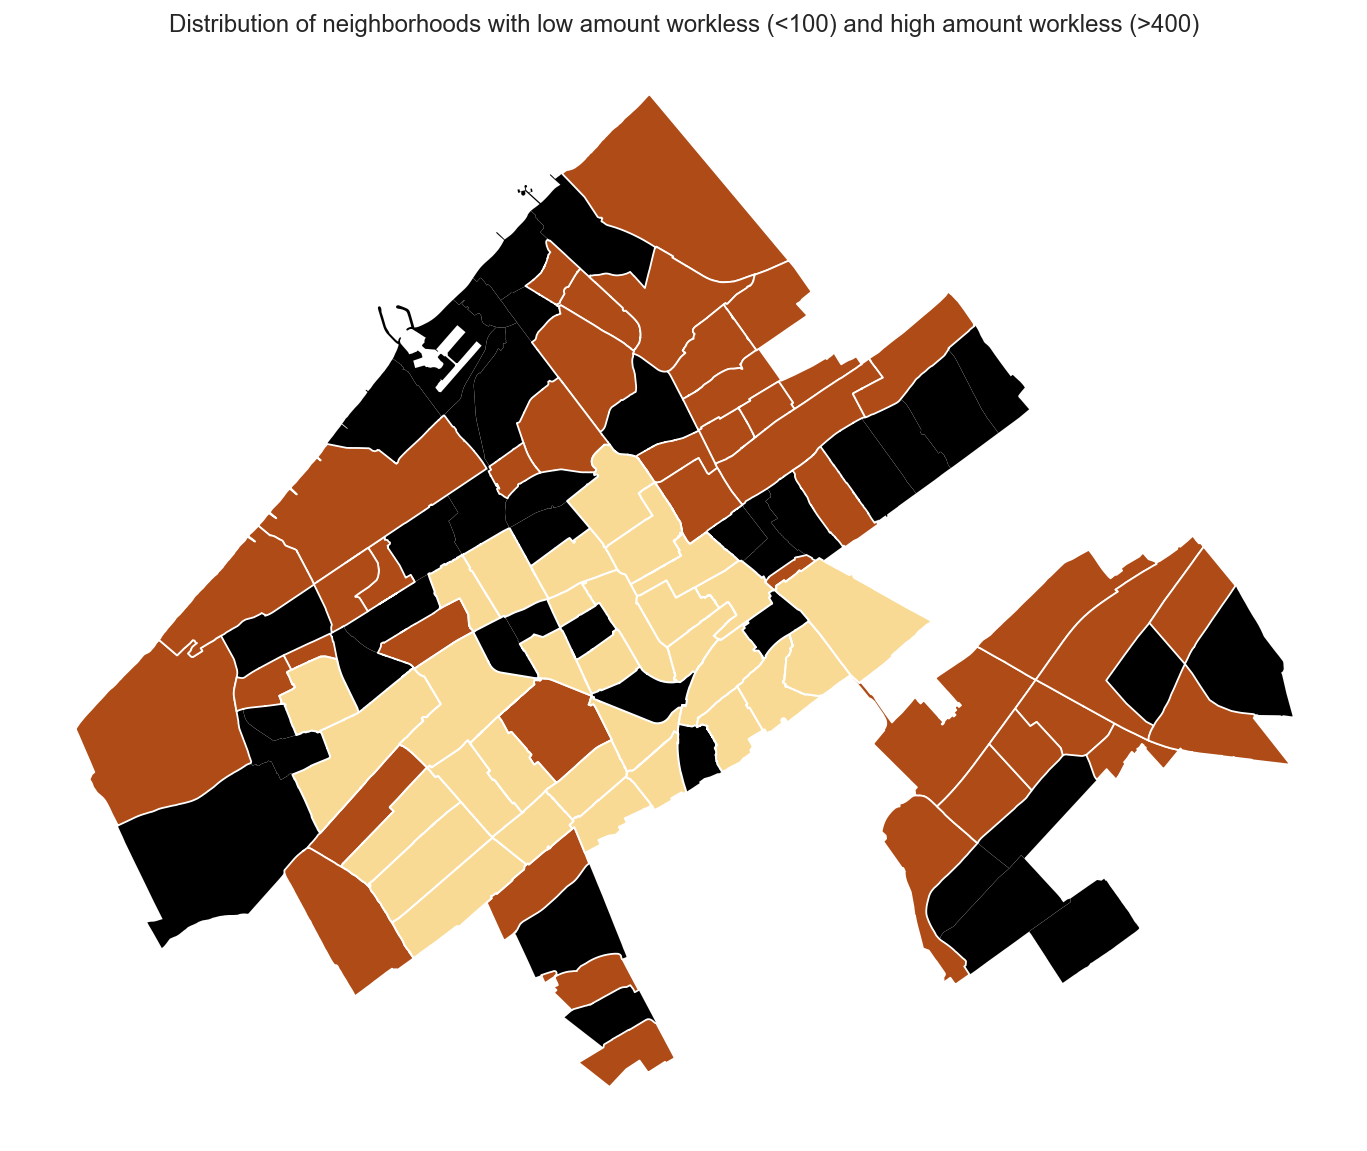

In [73]:
#second subfigure

#Spatial plot
f, ax = plt.subplots(1, figsize=(12, 12))
# Base layer with all the areas for the background
nbh_data.plot(facecolor='black', linewidth=0.025, ax=ax)

#label does not work
low_job_search.plot(alpha=1, facecolor='#AE4B16', linewidth=0.9, ax=ax,label = 'High income')
high_job_search.plot(alpha=1, facecolor='#F9DA95', linewidth=1, ax=ax, label = 'Low income')
ax.set_title("Distribution of neighborhoods with low amount workless (<100) and high amount workless (>400)")
ax.set_axis_off()

#third subfigure the distribution of ethnic in spatial plot

**Red are areas with a low job search/ workless people (below 100).
Yellow are neighborhoods with a high job search/ workless people (above 400).**


*Write 3(or more) properties of excellence* 
This plot encourages the reader to:
- Encourage the eye to compare different pieces of data since only two different colors are used to make comparison of neighborhoods easy.
- Show the data in a clear manner.
- Exclude unneeded dimensions, since I only show where the low and high job search is. If I would combine this with other variables (i.e. % Dutch or % ethnic) it would become unclear. Therefore, this plot excludes this dimension, making it possible to just look at the other spatial splot of percentage population to derive fruitful conclusions.
- Encourage the eye to compare different pieces of data

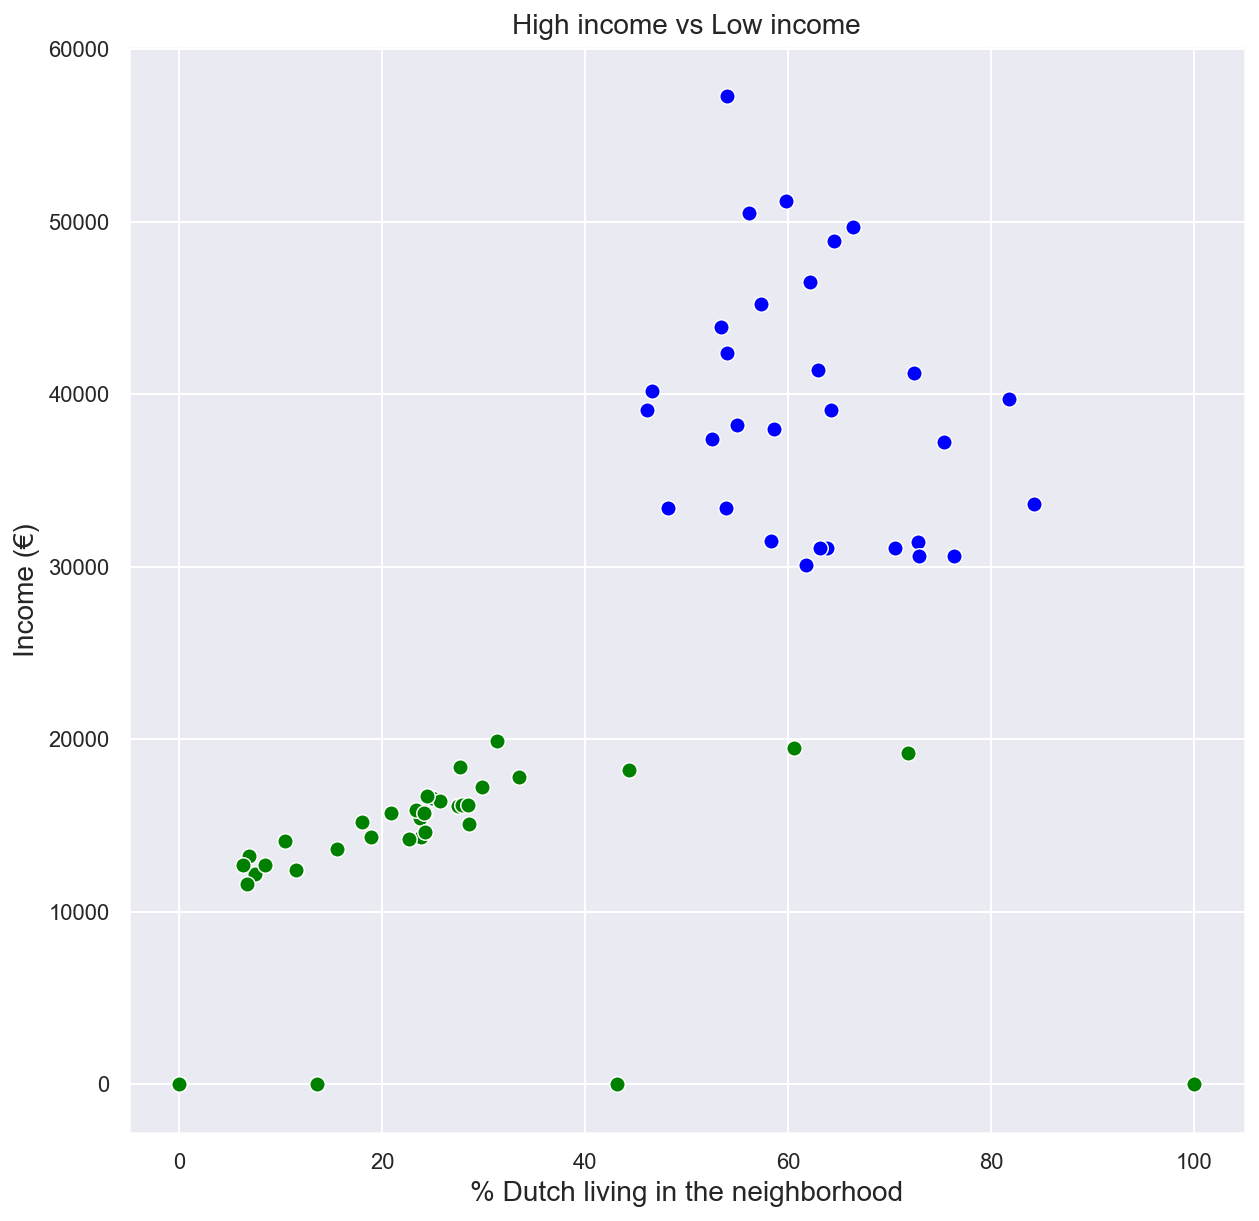

In [74]:
#scatterplot
f, ax = plt.subplots(1,1, figsize=(10, 10))
sns.scatterplot(x=high_income.Dutch_percent.tolist(), y=high_income.income_euros.tolist(), color = 'blue',data=high_income, ax=ax, s = 60);
sns.scatterplot(x=low_income.Dutch_percent.tolist(), y=low_income.income_euros.tolist(), color = 'green', data=high_income, ax=ax, s = 60);

ax.set_xlabel(r'% Dutch living in the neighborhood', fontsize=14);
ax.set_ylabel('Income (€)', fontsize=14);
ax.set_title('High income vs Low income', fontsize=14)
plt.show();

*Write 3(or more) properties of excellence*
This plot encourages the reader to:
- Encourage the eye to compare different pieces of data since only two different colors are used to make comparison of neighborhoods easy.
- Show the data in a clear manner.
- Exclude unneeded dimensions, since I only show where the income group properties. If I would combine this with other variables by having more categorical variables by size, hue, etc. of the marker, it would become unclear. Therefore, this plot excludes this dimension.
- Encourage the eye to compare different pieces of data

In [75]:
dutch_ethn_df_joint #top 5 neighborhoods of both high %Dutch and high %ethnic 
#consider the first row that is an outlier due to insufficient data

neigb_cijf                                           geometry  % Dutch  % ethnic  Average personal income per resident (€)  looking for a job
109              117 De Rivieren  POLYGON ((4.39709 52.07476, 4.39778 52.07496, ...    100.0       0.0                                       0.0                0.0
98            106 Vlietzoom-West  POLYGON ((4.34031 52.06195, 4.34039 52.06189, ...     84.2      15.8                                   33600.0                0.0
108           116 Vlietzoom-Oost  POLYGON ((4.38436 52.07616, 4.38458 52.07623, ...     81.8      18.2                                   39700.0                0.0
17                  100 Duindorp  POLYGON ((4.26433 52.09142, 4.26426 52.09138, ...     81.2      18.8                                   20500.0              350.0
23          50 Bloemenbuurt-West  POLYGON ((4.25365 52.07771, 4.25375 52.07762, ...     76.4      23.6                                   30600.0               40.0
68     34 Transvaalkwartier-Zuid  POLYGON ((4.29684 52.06716, 4.29687 52.06717, ...      6.3      93.7                                   12700.0              640.0
65        17 Schildersbuurt-Oost  POLYGON ((4.31576 52.06597, 4.31576 52.06597, ...      6.7      93.3                                   11600.0              830.0
67   33 Transvaalkwartier-Midden  POLYGON ((4.29288 52.06991, 4.29300 52.06996, ...      6.9      93.1                                   13200.0              370.0
63        15 Schildersbuurt-West  POLYGON ((4.29696 52.07397, 4.29706 52.07382, ...      7.5      92.5                                   12200.0             1520.0
66    32 Transvaalkwartier-Noord  POLYGON ((4.29105 52.07267, 4.29106 52.07264, ...      8.4      91.6                                   12700.0              530.0

## Assignment 03 ##

Assignment 03 consists of building a regression or clustering model to explain my hypothesis. Given this task there are two things I could do:

1. **Supervised EDA** The data I did assignment 02 with was from 2017. This data consisted of the % Dutch, % Ethnic, Avg. Personal Income and Number of job-seekers for every neighborhood. More recent data is not available, and therefore I decided to see if the "2016" could be predicted with the data of "2017". This is done in several steps to determine the feasability by:
 - Building both a linear regression model and a non-parametric model k-nearest neigbor. I train the models with data of 2017 and test with the data of 2016. 
 - To determine if this is possible, I will first inspect if the attributes in the data of 2016 follows the same distribution as 2017. Only if this is the case, I can proceed. Otherwise, the error values will be high since they follow too much of a different distribution, for which the model is overfitted wrongly. 
 - Make some plots to make sure I am not overfitting!
 - Perform error evaluation to evaluate the most feasible model, i.e. with least error, but also to see how well 2016 attributes can be predicted with 2017 test data using the best model.
 
 
2. **Unsupervised EDA** Build a cluster model based on:
 - K-means. However, this is an unsupervised task. Therefore, if I don't know how many categories there are, it doesn't really make sense if I did not determine beforehand which quantitative values I should look at for classfication. It can still provide insights to see if the categories made, coincide with the clusters I made myself in assignment 02 based on what I deducted to be high income/ high amount of workless people and low income/ low amount of workless people.
 - Regionalization. Regionalization might help by categorizing the attributes with certain spatial constraints and put them in a nested area. For a large region like The Hague the k-means (depending on the k-chosen) the clustering of areas can become messy without providing any real insights. The messyness is because the algorithm makes it own choice of amount of categories needed based on the attributes chosen. 
 
Concluding, I will only do **1**, since for my specific hypothesis it is unknown what different categories could be with ** Unsupervised tasks ** . Furthermore I ran a test to look at the distribution of categories and found that from the two variables of interest one had a weird distribution containing a lot of noise, making the clusters made based on this attribute redundant. You can see this in the section of UNSUPERVISED EDA. All by all, only statistical regression makes sense for my hypothesis.


For **1** my prediction variable will be Avg. Personal Income and Job-seekers/Workless people, while my response variable will be % Dutch. Percentage Dutch as response is easier to read compared to monetary (or other) non-standardized values. I will consider standardizing everything for error evaluation, but it is not required. It only makes the MLA(Machine Learning Algorithm) computational time less.



## 3 Supervised EDA ##

In [83]:
#importing necessary packages
# your code here
# don't forget to import the libraries you need
#import packages
import numpy as np
import scipy as sp
import geopandas as gpd
import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skr
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
import time
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
#import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Displays the plots for us.
%matplotlib inline

In [84]:
#load in the data of 2016
hypothesis_df_2016 = pd.read_csv("./data/hypothesis_data_2.csv", header = 0)

#visualize
hypothesis_df_2016.head()

Buurten % Dutch natives|2016 % Ethnic minorities|2016  Average personal income of individuals, 52 weeks|2016  aantal niet-werkende werkzoekenden totaal|2016
0          01 Oud Scheveningen                 78.4                     21.6                                            30000.0                                               170.0
1              02 Vissershaven                 73.8                     26.2                                            31300.0                                               220.0
2    03 Scheveningen Badplaats                 67.5                     32.5                                            36400.0                                               260.0
3             04 Visserijbuurt                 67.5                     32.5                                            34000.0                                               200.0
4  05 v Stolkpark/Schev Bosjes                 60.3                     39.7                                            74300.0                                                 NaN

I will clean the data of 2016 first

Notice that I will purposefully leave the data with NaN as unknown values. If I replace with a value like 0, the results will be unreliable when evaluating its error. In assignment 02 this was possible since there were few NaN, but now there are too much NaNs.

In [85]:
#first delete the extra unnecesary row
hypothesis_df_2016 = hypothesis_df_2016.drop([114],axis = 0)

#rename some columns to make references easier.
attr_names = ['neigb_cijf','Dutch_percent','ethnic_percent','income_euros','no_job']
hypothesis_df_2016.columns = attr_names

In [86]:
#Combine with shapefile
nbh_dir = 'data'
nbh_link  = nbh_dir + '/neighborhoods.shp'
nbh = gpd.read_file(nbh_link)

nbh_new_2016 = nbh.drop(nbh.columns[0],axis=1)
nbh_new_2016.crs = nbh.crs

#change both to string format so the shapefile and csv are able to be concatenated

nbh_new_2016['neigb_cijf'] = nbh_new_2016['neigb_cijf'].astype(str)
hypothesis_df_2016['neigb_cijf'] = hypothesis_df_2016['neigb_cijf'].astype(str)

hypothesis_df_2016 = hypothesis_df_2016.set_index('neigb_cijf') #set index

nbh_data_2016 = nbh_new_2016.join(hypothesis_df_2016, on='neigb_cijf')

#make sure they have the same crs
nbh_data_2016.crs = nbh_new_2016.crs

#there is an unnecessary x and - in the columns
nbh_data_2016 = nbh_data_2016.replace(['x'], np.nan)
nbh_data_2016 = nbh_data_2016.replace(['-'], np.nan)

#show the table to check if everything looks good
nbh_data_2016

neigb_cijf                                           geometry Dutch_percent ethnic_percent  income_euros  no_job
0       70 Oostduinen  POLYGON ((4.30290 52.12832, 4.30298 52.12827, ...           NaN            NaN           NaN     NaN
1    71 Belgisch Park  POLYGON ((4.28056 52.11706, 4.28053 52.11706, ...          65.4           34.6       43700.0   240.0
2    73 Westbroekpark  POLYGON ((4.29171 52.10745, 4.29181 52.10739, ...          64.2           35.8       63200.0    10.0
3        74 Duttendel  POLYGON ((4.32252 52.10768, 4.32252 52.10766, ...          64.0           36.0       71300.0    20.0
4      48 Nassaubuurt  POLYGON ((4.31943 52.09247, 4.31943 52.09247, ...          56.2           43.8       80500.0    30.0
..                ...                                                ...           ...            ...           ...     ...
109   117 De Rivieren  POLYGON ((4.39709 52.07476, 4.39778 52.07496, ...          92.9            NaN           NaN     NaN
110      118 De Lanen  POLYGON ((4.40245 52.06319, 4.40242 52.06314, ...          58.9           41.1       38800.0   170.0
111     119 De Velden  POLYGON ((4.40593 52.07659, 4.40607 52.07649, ...          62.8           37.2       38600.0   170.0
112     120 De Vissen  POLYGON ((4.41188 52.07213, 4.41192 52.07210, ...          64.0           36.0       38200.0   320.0
113     121 Rietbuurt  POLYGON ((4.41539 52.05744, 4.41538 52.05707, ...          58.1           41.9       41400.0   100.0

[114 rows x 6 columns]

There are soms NaNs I would like to avoid since it can cause a lot of trouble when training and testing the model (this was a conclusion made out of the iterative process). 

Since this is not a good practice for my training data, I will remove this first by having the instead of NaN, the mean of that column filled in that cell using Python's package sklearn.SimpleImputer. 

In [88]:
#fill NaN with mean value of that column using, otherwise I cannot perform linear regression
#specify predictor variables, income and no job /job searchers

data_change = nbh_data[['income_euros', 'no_job']]

data_change = data_change.values.reshape(len(data_change),2)  #reshape to a 2-D array   

data_change_imputed = imp.fit_transform(data_change)

income_imp = data_change_imputed[:,0]   #store imputed value for income 
no_job_imp  = data_change_imputed[:,1] #store imputed value for people with no job


income_imp  = income_imp .reshape(len(income_imp),1)  #reshape to one column again   
no_job_imp = no_job_imp.reshape(len(no_job_imp),1)   #reshape to one column again  

#replace the values in the DataFrame
nbh_data['income_euros'] = income_imp  
nbh_data['no_job'] = no_job_imp

nbh_data.head()   #

neigb_cijf                                           geometry  Dutch_percent  ethnic_percent  income_euros  no_job  w_queen_score  w_queen_score_no_job
0     70 Oostduinen  POLYGON ((4.30290 52.12832, 4.30298 52.12827, ...            0.0             0.0           0.0     0.0   25387.500000            206.250000
1  71 Belgisch Park  POLYGON ((4.28056 52.11706, 4.28053 52.11706, ...           61.8            38.2       30100.0   150.0   13416.666667            326.666667
2  73 Westbroekpark  POLYGON ((4.29171 52.10745, 4.29181 52.10739, ...           64.5            35.5       48900.0     0.0   22060.000000            444.000000
3      74 Duttendel  POLYGON ((4.32252 52.10768, 4.32252 52.10766, ...           66.4            33.6       49700.0    20.0   38800.000000             56.666667
4    48 Nassaubuurt  POLYGON ((4.31943 52.09247, 4.31943 52.09247, ...           56.1            43.9       50500.0    10.0   32300.000000            210.000000

## 3.1 Distribution analysis ##

Analysing the distribution will help us determine if the model using data of one year (2017) can be trained for the prediction of other years (in this case 2016).

Standardize data to avoid for a better representation when conducting statistical analysis. I will do this using sklearn's function StandardScaler()

**Explanation of StandardScaler() standardization**

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. StandardScaler does not meet the strict definition of scale I introduced earlier.
StandardScaler results in a distribution with a standard deviation equal to 1. The variance is equal to 1 also, because variance = standard deviation squared. And 1 squared = 1.

**Consider** when you apply this on a different year, the deviation for which it divides all the values is different. Therefore, the standardized values and distribution can be the same, while having different absolute values.

In [89]:
scaler = StandardScaler()  #import as

nbh_dutch = nbh_data_2016['Dutch_percent']
nbh_income = nbh_data_2016['income_euros']
nbh_nojob = nbh_data_2016['no_job']
nbh_ethnic = nbh_data_2016['ethnic_percent']

#reshape all arrays to 2-D for 2016
nbh_dutch = nbh_dutch.values.reshape(len(nbh_dutch),1)  #reshape to a 2-D array 
nbh_income = nbh_income.values.reshape(len(nbh_income),1)  #reshape to a 2-D array 
nbh_nojob = nbh_nojob.values.reshape(len(nbh_nojob),1)  #reshape to a 2-D array 
nbh_ethnic = nbh_ethnic.values.reshape(len(nbh_ethnic),1)  #reshape to a 2-D array 


#standardize data
nbh_dutch_norm = scaler.fit_transform(nbh_dutch)
nbh_income_norm = scaler.fit_transform(nbh_income)
nbh_nojob_norm = scaler.fit_transform(nbh_nojob)
nbh_ethnic_norm = scaler.fit_transform(nbh_ethnic)

#store in dataframe again
nbh_data_2016['dutch_norm'] = nbh_dutch_norm
nbh_data_2016['ethnic_norm'] = nbh_ethnic_norm
nbh_data_2016['income_norm'] = nbh_income_norm
nbh_data_2016['no_job_norm'] = nbh_nojob_norm
nbh_data_2016.head(10)


neigb_cijf                                           geometry Dutch_percent ethnic_percent  income_euros  no_job  dutch_norm  ethnic_norm  income_norm  no_job_norm
0          70 Oostduinen  POLYGON ((4.30290 52.12832, 4.30298 52.12827, ...           NaN            NaN           NaN     NaN         NaN          NaN          NaN          NaN
1       71 Belgisch Park  POLYGON ((4.28056 52.11706, 4.28053 52.11706, ...          65.4           34.6       43700.0   240.0    0.606590    -0.632807     0.427848    -0.367067
2       73 Westbroekpark  POLYGON ((4.29171 52.10745, 4.29181 52.10739, ...          64.2           35.8       63200.0    10.0    0.547892    -0.573328     1.645316    -1.050888
3           74 Duttendel  POLYGON ((4.32252 52.10768, 4.32252 52.10766, ...          64.0           36.0       71300.0    20.0    0.538109    -0.563415     2.151033    -1.021156
4         48 Nassaubuurt  POLYGON ((4.31943 52.09247, 4.31943 52.09247, ...          56.2           43.8       80500.0    30.0    0.156572    -0.176800     2.725428    -0.991425
5           75 Uilennest  POLYGON ((4.34232 52.09748, 4.34233 52.09747, ...          60.1           39.9       53700.0    40.0    0.347341    -0.370107     1.052190    -0.961694
6            76 Duinzigt  POLYGON ((4.32894 52.10921, 4.32899 52.10917, ...          63.4           36.6       53000.0    30.0    0.508760    -0.533675     1.008486    -0.991425
7           77 Waalsdorp  POLYGON ((4.32270 52.09912, 4.32271 52.09910, ...          62.9           37.1       71500.0    50.0    0.484303    -0.508892     2.163520    -0.931962
8          78 Arendsdorp  POLYGON ((4.32329 52.09921, 4.32388 52.09870, ...          56.6           43.4       80900.0    20.0    0.176138    -0.196627     2.750402    -1.021156
9  79 v Hoytemastraat eo  POLYGON ((4.32692 52.09548, 4.32732 52.09514, ...          62.6           37.4       60100.0    40.0    0.469628    -0.494022     1.451770    -0.961694

In [90]:
#do the same for 2017
nbh_dutch_17 = nbh_data['Dutch_percent']
nbh_income_17 = nbh_data['income_euros']
nbh_nojob_17 = nbh_data['no_job']
nbh_ethnic_17 = nbh_data['ethnic_percent']

#reshape all arrays to 2-D for 2017
nbh_dutch_17 = nbh_dutch.reshape(len(nbh_dutch_17),1)  #reshape to a 2-D array 
nbh_income_17 = nbh_income.reshape(len(nbh_income_17),1)  #reshape to a 2-D array 
nbh_nojob_17 = nbh_nojob.reshape(len(nbh_nojob_17),1)  #reshape to a 2-D array 
nbh_ethnic_17 = nbh_ethnic.reshape(len(nbh_ethnic_17),1)  #reshape to a 2-D array 

nbh_dutch_norm_17 = scaler.fit_transform(nbh_dutch_17)
nbh_income_norm_17 = scaler.fit_transform(nbh_income_17)
nbh_nojob_norm_17 = scaler.fit_transform(nbh_nojob_17)
nbh_ethnic_norm_17 = scaler.fit_transform(nbh_ethnic_17)

#store in previous dataframe
nbh_data['dutch_norm'] = nbh_dutch_norm_17
nbh_data['ethnic_norm'] = nbh_ethnic_norm_17
nbh_data['income_norm'] = nbh_income_norm_17
nbh_data['no_job_norm'] = nbh_nojob_norm_17
nbh_data.head(10)


neigb_cijf                                           geometry  Dutch_percent  ethnic_percent  income_euros  no_job  w_queen_score  w_queen_score_no_job  dutch_norm  ethnic_norm  income_norm  no_job_norm
0          70 Oostduinen  POLYGON ((4.30290 52.12832, 4.30298 52.12827, ...            0.0             0.0           0.0     0.0   25387.500000            206.250000         NaN          NaN          NaN          NaN
1       71 Belgisch Park  POLYGON ((4.28056 52.11706, 4.28053 52.11706, ...           61.8            38.2       30100.0   150.0   13416.666667            326.666667    0.606590    -0.632807     0.427848    -0.367067
2       73 Westbroekpark  POLYGON ((4.29171 52.10745, 4.29181 52.10739, ...           64.5            35.5       48900.0     0.0   22060.000000            444.000000    0.547892    -0.573328     1.645316    -1.050888
3           74 Duttendel  POLYGON ((4.32252 52.10768, 4.32252 52.10766, ...           66.4            33.6       49700.0    20.0   38800.000000             56.666667    0.538109    -0.563415     2.151033    -1.021156
4         48 Nassaubuurt  POLYGON ((4.31943 52.09247, 4.31943 52.09247, ...           56.1            43.9       50500.0    10.0   32300.000000            210.000000    0.156572    -0.176800     2.725428    -0.991425
5           75 Uilennest  POLYGON ((4.34232 52.09748, 4.34233 52.09747, ...           55.0            45.0       38200.0    20.0   30360.000000            182.000000    0.347341    -0.370107     1.052190    -0.961694
6            76 Duinzigt  POLYGON ((4.32894 52.10921, 4.32899 52.10917, ...           62.9            37.1       41400.0    10.0   26740.000000            260.000000    0.508760    -0.533675     1.008486    -0.991425
7           77 Waalsdorp  POLYGON ((4.32270 52.09912, 4.32271 52.09910, ...           62.2            37.8       46500.0    40.0   23816.666667            123.333333    0.484303    -0.508892     2.163520    -0.931962
8          78 Arendsdorp  POLYGON ((4.32329 52.09921, 4.32388 52.09870, ...           54.0            46.0       42400.0    20.0   32375.000000             12.500000    0.176138    -0.196627     2.750402    -1.021156
9  79 v Hoytemastraat eo  POLYGON ((4.32692 52.09548, 4.32732 52.09514, ...           58.6            41.4       38000.0    20.0   27266.666667            276.666667    0.469628    -0.494022     1.451770    -0.961694

**Now let us analyse the distribution of the data of 2016 against 2017**


Firstly, I analyse the distribution of Dutch percentage. I do not used the standardized Dutch percentage column. For a human, percentage are more intuitive, and where something is intuitive, it is better to keep it this way.

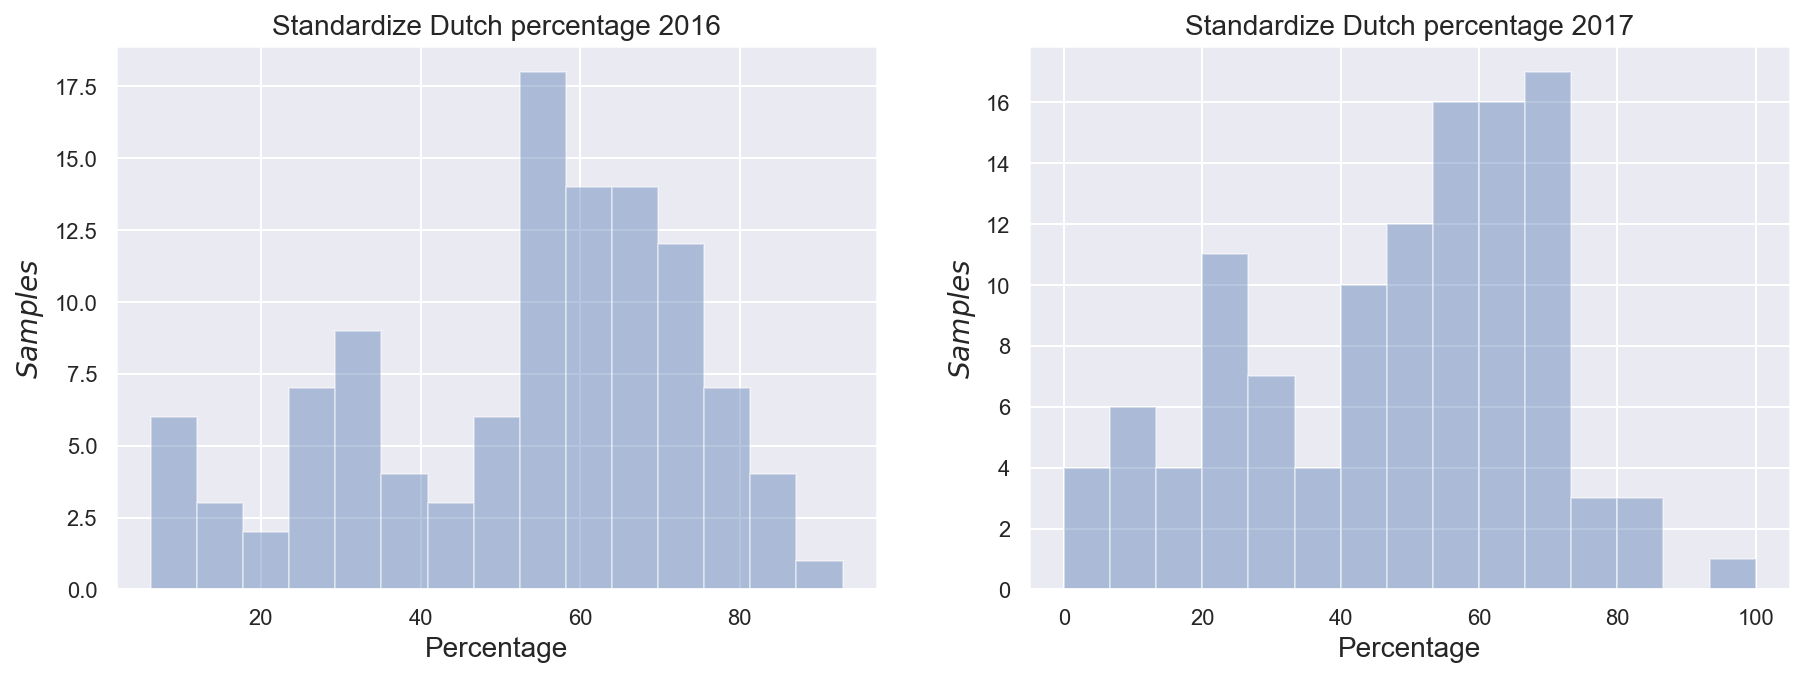

In [91]:

fig, ax = plt.subplots(1,2, figsize=(15,5))

# seaborn goes in first subplot
sns.set(font_scale=1)
sns.distplot(nbh_data_2016.Dutch_percent, bins= 15, kde = False, label="bw: 5", color="b", ax = ax[0]);
ax[0].set_title('Standardize Dutch percentage 2016', fontsize=14)
ax[0].set_xlabel('Percentage', fontsize=14 )
ax[0].set_ylabel(r'$Samples$', fontsize=14)

sns.set(font_scale=1)
sns.distplot(nbh_data.Dutch_percent, bins = 15, kde= False, label="bw: 5",  color="b", ax=ax[1]);
ax[1].set_title('Standardize Dutch percentage 2017', fontsize=14)
ax[1].set_xlabel('Percentage', fontsize=14 )
ax[1].set_ylabel(r'$Samples$', fontsize=14)

plt.show()


It can be seen that the data from 2016 and 2017 for the Dutch percentage is reasonably distributed in a same manner. Both seem to be have a high amount of samples between 55 and 65 %. Both years have a lower amount of samples for lower percentages of Dutch natives.

Secondly, I analyse the distribution of income euros standardized. It is best to look at the standardized, since the absolute value data can be considered to be counter-intuitive when handling with large average income.

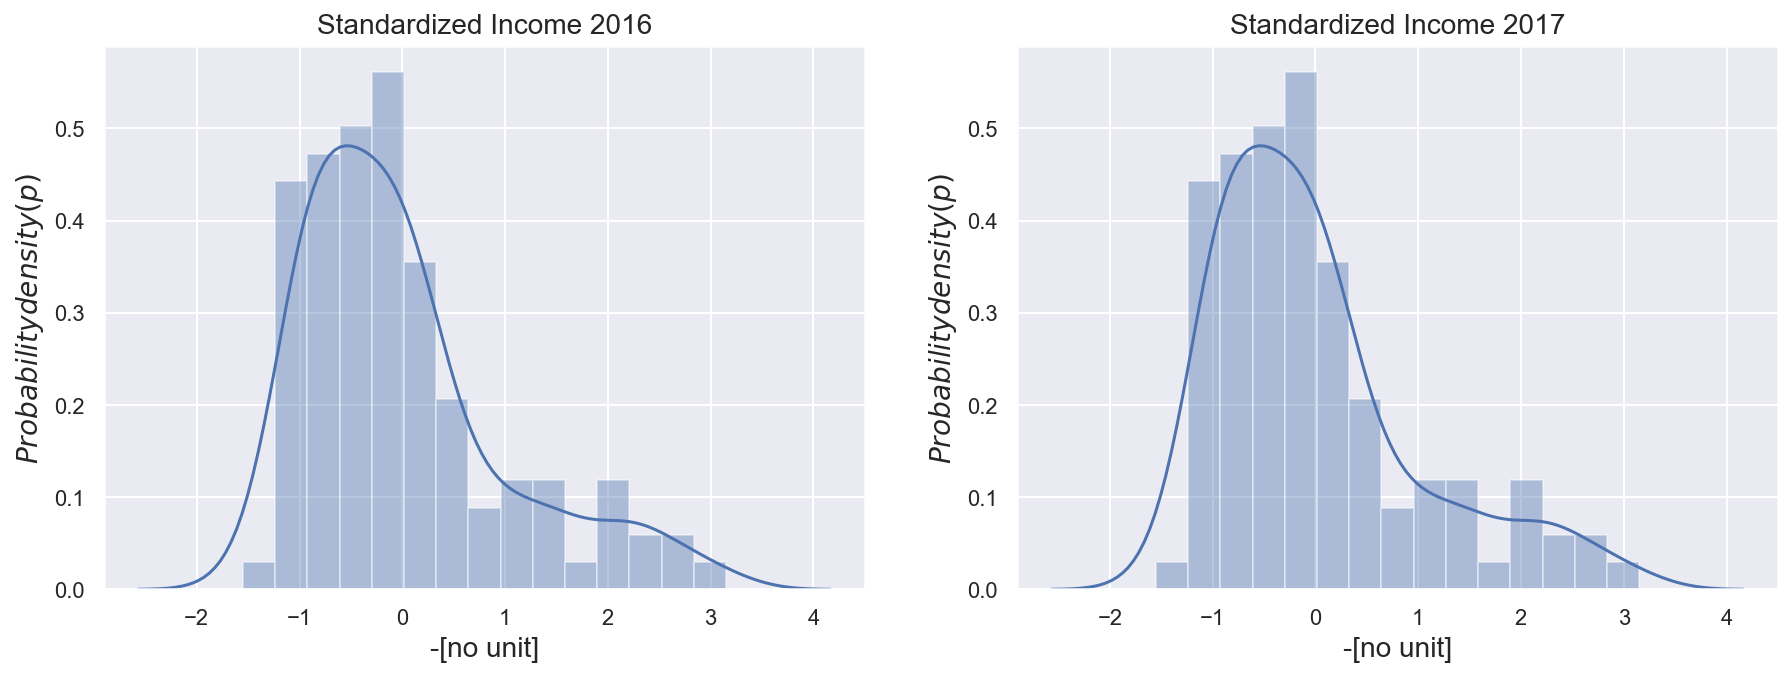

In [92]:

fig, ax = plt.subplots(1,2, figsize=(15,5))

# seaborn goes in first subplot
sns.set(font_scale=1)
sns.distplot(nbh_data_2016.income_norm, kde = True,bins= 15 ,label="bins = 15", color="b", ax = ax[0]);
ax[0].set_title('Standardized Income 2016', fontsize=14)
ax[0].set_xlabel('-[no unit]', fontsize=14 )
ax[0].set_ylabel(r'$Probability density  (p)$', fontsize=14)

sns.set(font_scale=1)
sns.distplot(nbh_data.income_norm, kde = True,bins = 15, label="bins = 15", color="b", ax=ax[1]);
ax[1].set_title('Standardized Income 2017', fontsize=14)
ax[1].set_xlabel('-[no unit]', fontsize=14 )
ax[1].set_ylabel(r'$Probability density  (p)$', fontsize=14)

plt.show()

Both seem to be centered around 0. 2016 has a slightly higher density centered around 0 compared to 2017 data, which is more spread.

Now I analyse the distribution of workless people for both 2016 and 2017

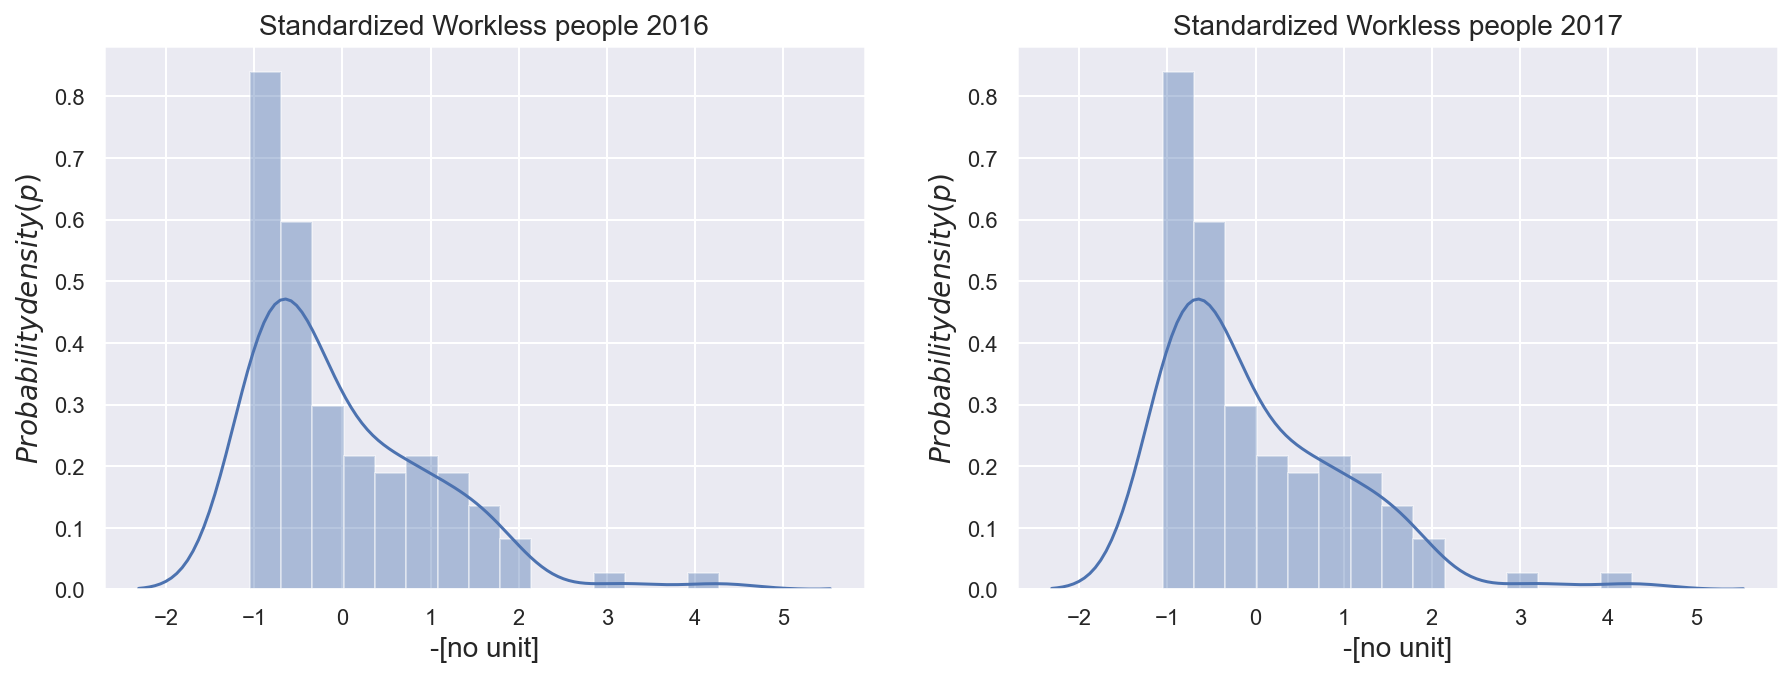

In [93]:

fig, ax = plt.subplots(1,2, figsize=(15,5))

# seaborn goes in first subplot
sns.set(font_scale=1)
sns.distplot(nbh_data_2016.no_job_norm, kde = True,bins= 15 ,label="bins = 15", color="b", ax = ax[0]);
ax[0].set_title('Standardized Workless people 2016', fontsize=14)
ax[0].set_xlabel('-[no unit]', fontsize=14 )
ax[0].set_ylabel(r'$Probability  density (p)$', fontsize=14)

sns.set(font_scale=1)
sns.distplot(nbh_data.no_job_norm, kde = True,bins = 15, label="bins = 15", color="b", ax=ax[1]);
ax[1].set_title('Standardized Workless people 2017', fontsize=14)
ax[1].set_xlabel('-[no unit]', fontsize=14 )
ax[1].set_ylabel(r'$Probability  density  (p)$', fontsize=14)

plt.show()

The distribution seems to be reasonably the same for both years. 

Conclusively, the attributes of data from 2017 could be used as predictors for a response attribute from data of 2016. But since this data hardly has any variation in absolute values compared to each other, the linear regression model will probably be less relevant for a real research.

Therefore, I will load new data from an older year and see if there is somewhat more variation, which makes the linear regression model relevant. 

The year I chose now is 2014. More recent years, did not include data about the amount of workless people. Also, at first sight, it seemed to have a small desired difference in values compared to data of 2017. 

Let us inspect the distributions.




In [94]:
#load in the data of 2014
hypothesis_df_2014 = pd.read_csv("./data/hypothesis_data_3.csv", header = 0)
hypothesis_df_2014.head(5)

Buurten % Dutch natives|2014 % Ethnic minorities|2014  Average personal income of individuals, 52 weeks|2014  aantal niet-werkende werkzoekenden totaal|2014
0          01 Oud Scheveningen                 79.0                     21.0                                            28300.0                                               210.0
1              02 Vissershaven                 75.2                     24.8                                            29800.0                                               270.0
2    03 Scheveningen Badplaats                 68.7                     31.3                                            35000.0                                               300.0
3             04 Visserijbuurt                 70.1                     29.9                                            33000.0                                               240.0
4  05 v Stolkpark/Schev Bosjes                 65.1                     34.9                                            75200.0                                                10.0

In [95]:
#first remove the extra unnecesary row
hypothesis_df_2014 = hypothesis_df_2014.drop([114],axis = 0)

#rename some columns to make references easier.
columns = ['neigb_cijf','Dutch_percent','ethnic_percent','income_euros','no_job']
hypothesis_df_2014.columns = columns

#Combine with shapefile
nbh_dir = 'data'
nbh_link  = nbh_dir + '/neighborhoods.shp'
nbh = gpd.read_file(nbh_link)

nbh_new_2014 = nbh.drop(nbh.columns[0],axis=1)
nbh_new_2014.crs = nbh.crs

#change both to string format so the shapefile and csv are able to be concatenated

nbh_new_2014['neigb_cijf'] = nbh_new_2014['neigb_cijf'].astype(str)
hypothesis_df_2014['neigb_cijf'] = hypothesis_df_2014['neigb_cijf'].astype(str)

hypothesis_df_2014 = hypothesis_df_2014.set_index('neigb_cijf') #set index

nbh_data_2014 = nbh_new_2014.join(hypothesis_df_2014, on='neigb_cijf')

#make sure they have the same crs
nbh_data_2014.crs = nbh_new_2014.crs

#there is an unnecessary x and - in the columns
nbh_data_2014 = nbh_data_2014.replace(['x'], np.nan)
nbh_data_2014 = nbh_data_2014.replace(['-'], np.nan)



##standardize all the data and put it back in the dataframe

scaler = StandardScaler()  #import as

nbh_dutch = nbh_data_2014['Dutch_percent']
nbh_income = nbh_data_2014['income_euros']
nbh_nojob = nbh_data_2014['no_job']
nbh_ethnic = nbh_data_2014['ethnic_percent']

#reshape all arrays to 2-D for 2014
nbh_dutch = nbh_dutch.values.reshape(len(nbh_dutch),1)  #reshape to a 2-D array 
nbh_income = nbh_income.values.reshape(len(nbh_income),1)  #reshape to a 2-D array 
nbh_nojob = nbh_nojob.values.reshape(len(nbh_nojob),1)  #reshape to a 2-D array 
nbh_ethnic = nbh_ethnic.values.reshape(len(nbh_ethnic),1)  #reshape to a 2-D array 


#normalise data
nbh_dutch_norm = scaler.fit_transform(nbh_dutch)
nbh_income_norm = scaler.fit_transform(nbh_income)
nbh_nojob_norm = scaler.fit_transform(nbh_nojob)
nbh_ethnic_norm = scaler.fit_transform(nbh_ethnic)

#store in dataframe again
nbh_data_2014['dutch_norm'] = nbh_dutch_norm
nbh_data_2014['ethnic_norm'] = nbh_ethnic_norm
nbh_data_2014['income_norm'] = nbh_income_norm
nbh_data_2014['no_job_norm'] = nbh_nojob_norm
nbh_data_2014.head(10)


neigb_cijf                                           geometry Dutch_percent ethnic_percent  income_euros  no_job  dutch_norm  ethnic_norm  income_norm  no_job_norm
0          70 Oostduinen  POLYGON ((4.30290 52.12832, 4.30298 52.12827, ...           NaN            NaN           NaN     NaN         NaN          NaN          NaN          NaN
1       71 Belgisch Park  POLYGON ((4.28056 52.11706, 4.28053 52.11706, ...          65.7           34.3       41200.0   290.0    0.536161    -0.563248     0.380048    -0.340582
2       73 Westbroekpark  POLYGON ((4.29171 52.10745, 4.29181 52.10739, ...          68.4           31.6       65000.0     NaN    0.668607    -0.697688     1.796170          NaN
3           74 Duttendel  POLYGON ((4.32252 52.10768, 4.32252 52.10766, ...          67.8           32.2       68100.0    30.0    0.639175    -0.667812     1.980622    -0.970947
4         48 Nassaubuurt  POLYGON ((4.31943 52.09247, 4.31943 52.09247, ...          59.0           41.0       74400.0    30.0    0.207499    -0.229639     2.355478    -0.970947
5           75 Uilennest  POLYGON ((4.34232 52.09748, 4.34233 52.09747, ...          61.3           38.7       50800.0    40.0    0.320323    -0.344162     0.951257    -0.946702
6            76 Duinzigt  POLYGON ((4.32894 52.10921, 4.32899 52.10917, ...          63.1           36.9       51200.0    30.0    0.408621    -0.433788     0.975057    -0.970947
7           77 Waalsdorp  POLYGON ((4.32270 52.09912, 4.32271 52.09910, ...          62.3           37.7       72100.0    60.0    0.369377    -0.393954     2.218626    -0.898213
8          78 Arendsdorp  POLYGON ((4.32329 52.09921, 4.32388 52.09870, ...          57.3           42.7       70300.0    30.0    0.124107    -0.144992     2.111524    -0.970947
9  79 v Hoytemastraat eo  POLYGON ((4.32692 52.09548, 4.32732 52.09514, ...          66.2           33.8       60800.0    40.0    0.560688    -0.588144     1.546266    -0.946702

**Now let us analyse the distribution of the data of 2014, 2016 against 2017**


Firstly, I analyse the distribution of Dutch percentage. I do not used the standardized Dutch percentage column. For a human, percentages are more intuitive values, and when something is intuitive, it is better to keep it this way.

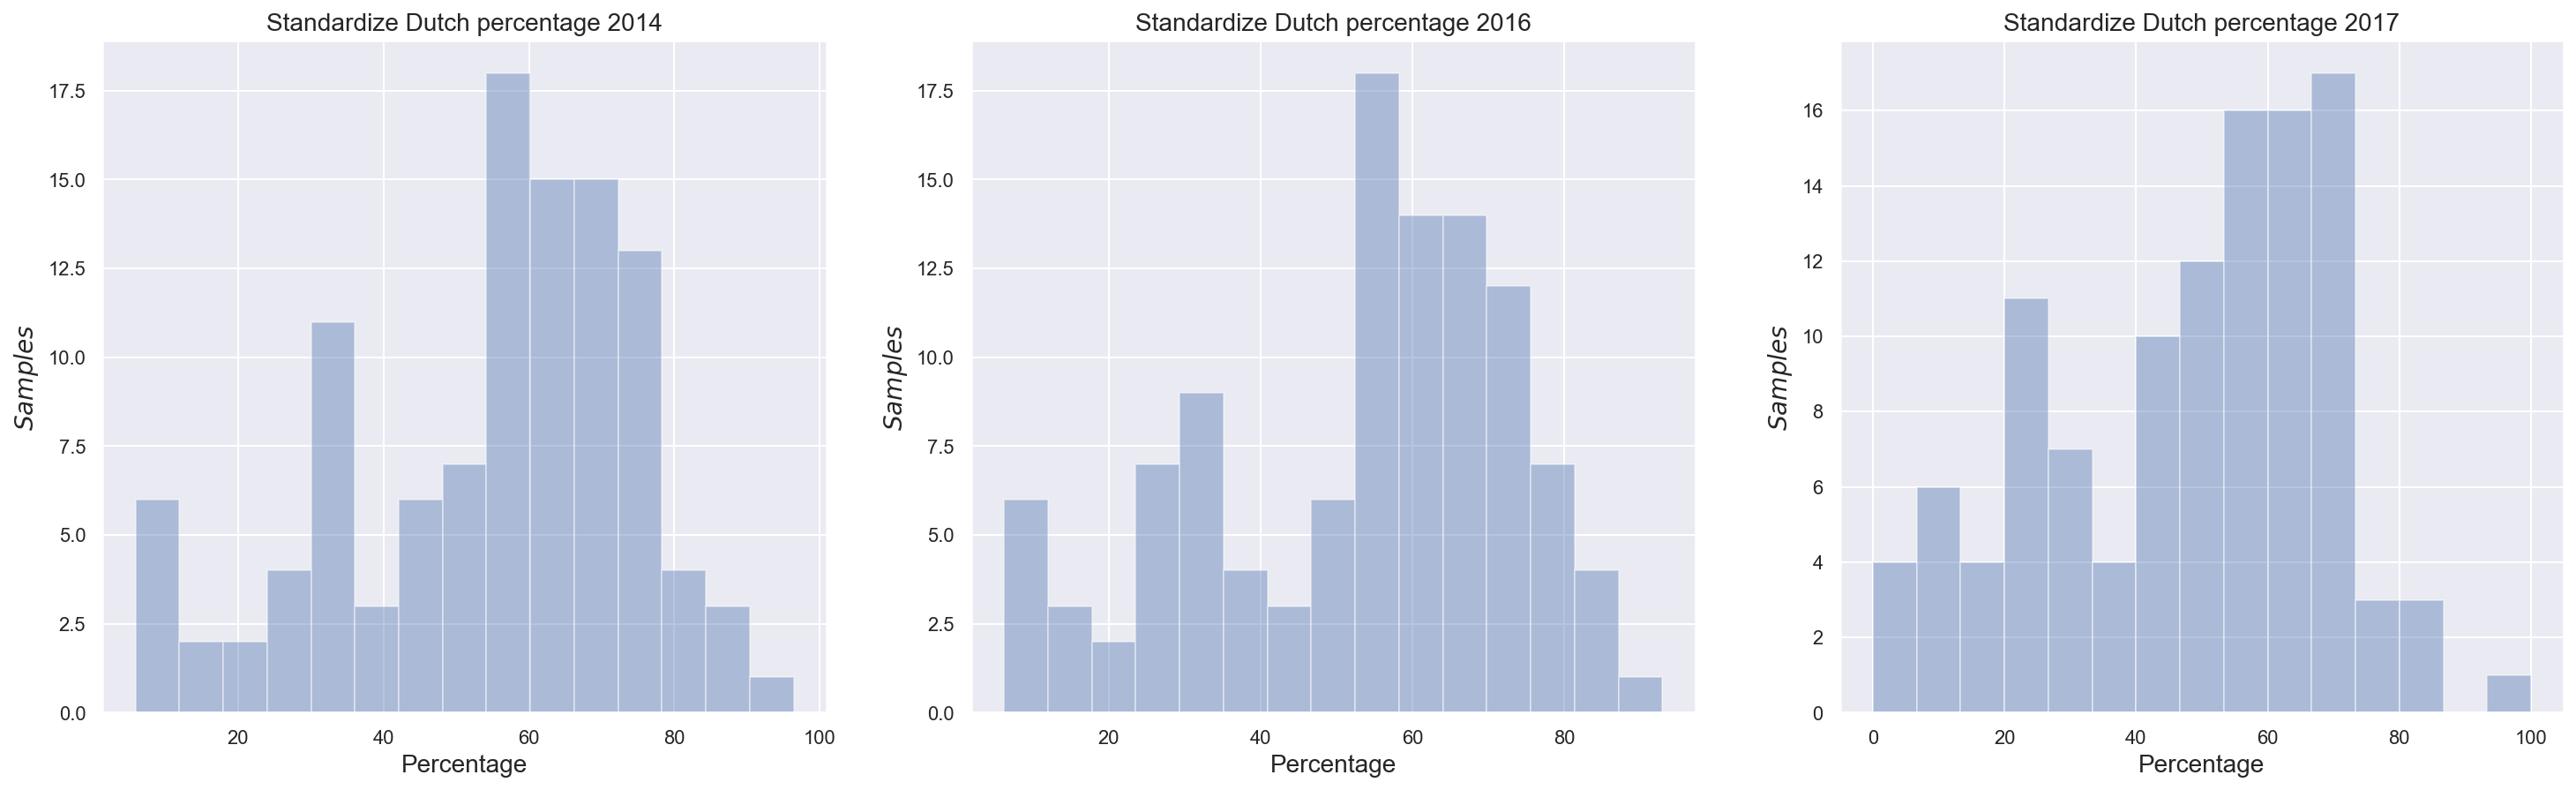

In [96]:

fig, ax = plt.subplots(1,3, figsize=(25,7))

# seaborn goes in first subplot
sns.set(font_scale=1)
sns.distplot(nbh_data_2014.Dutch_percent, bins= 15, kde = False, label="bw: 5", color="b", ax = ax[0]);
ax[0].set_title('Standardize Dutch percentage 2014', fontsize=14)
ax[0].set_xlabel('Percentage', fontsize=14 )
ax[0].set_ylabel(r'$Samples$', fontsize=14)


sns.set(font_scale=1)
sns.distplot(nbh_data_2016.Dutch_percent, bins= 15, kde = False, label="bw: 5", color="b", ax = ax[1]);
ax[1].set_title('Standardize Dutch percentage 2016', fontsize=14)
ax[1].set_xlabel('Percentage', fontsize=14 )
ax[1].set_ylabel(r'$Samples$', fontsize=14)

sns.set(font_scale=1)
sns.distplot(nbh_data.Dutch_percent, bins = 15, kde= False, label="bw: 5",  color="b", ax=ax[2]);
ax[2].set_title('Standardize Dutch percentage 2017', fontsize=14)
ax[2].set_xlabel('Percentage', fontsize=14 )
ax[2].set_ylabel(r'$Samples$', fontsize=14)

plt.show()


Seen from the histograms, it can be seen that the data between the years does not variate too much. It shouldn't be a problem when it comes to the Dutch percentage.

Secondly, I analyse the distribution of income euros standardized. It is best to look at the standardized, since the normal data can be considered to be counter-intuitive when handling with large average income.

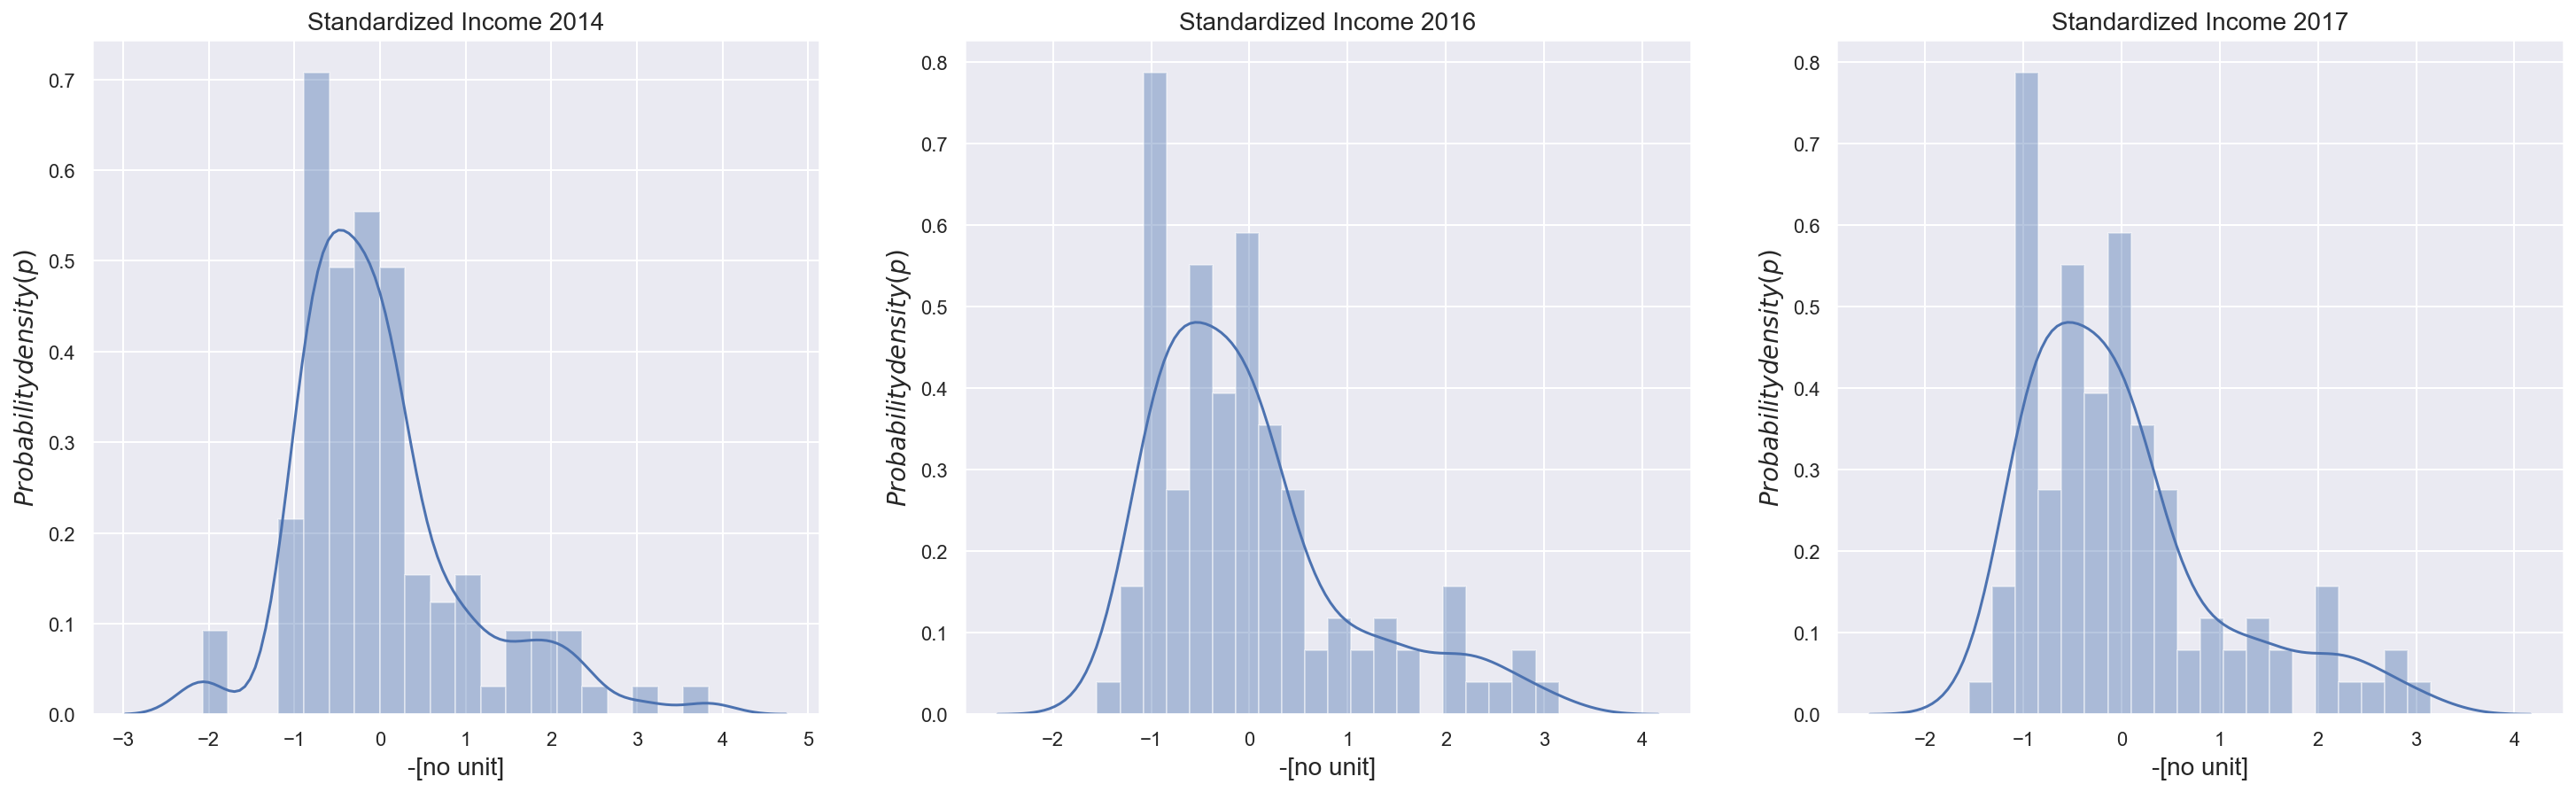

In [97]:

fig, ax = plt.subplots(1,3, figsize=(25,7))

# seaborn goes in first subplot
sns.set(font_scale=1)
sns.distplot(nbh_data_2014.income_norm, kde = True,bins= 20 ,label="bins = 15", color="b", ax = ax[0]);
ax[0].set_title('Standardized Income 2014', fontsize=14)
ax[0].set_xlabel('-[no unit]', fontsize=14 )
ax[0].set_ylabel(r'$Probability  density (p)$', fontsize=14)

sns.set(font_scale=1)
sns.distplot(nbh_data_2016.income_norm, bins= 20, kde = True, label="bw: 5", color="b", ax = ax[1]);
ax[1].set_title('Standardized Income 2016', fontsize=14)
ax[1].set_xlabel('-[no unit]', fontsize=14 )
ax[1].set_ylabel(r'$Probability  density (p)$', fontsize=14)

sns.set(font_scale=1)
sns.distplot(nbh_data.income_norm, kde = True,bins = 20, label="bins = 15", color="b", ax=ax[2]);
ax[2].set_title('Standardized Income 2017', fontsize=14)
ax[2].set_xlabel('-[no unit]', fontsize=14 )
ax[2].set_ylabel(r'$Probability  density (p)$', fontsize=14)

plt.show()

The distribution of income in 2014 has similar shapes to 2016 and 2017, but seems to be more dense on the left of the 0 scale compared to 2016 and 2017. This is the kind of small difference in distribution that is acceptable and even desired to test the robustness of the model.

Now I analyse the distribution of workless people for both 2014, 2016 and 2017

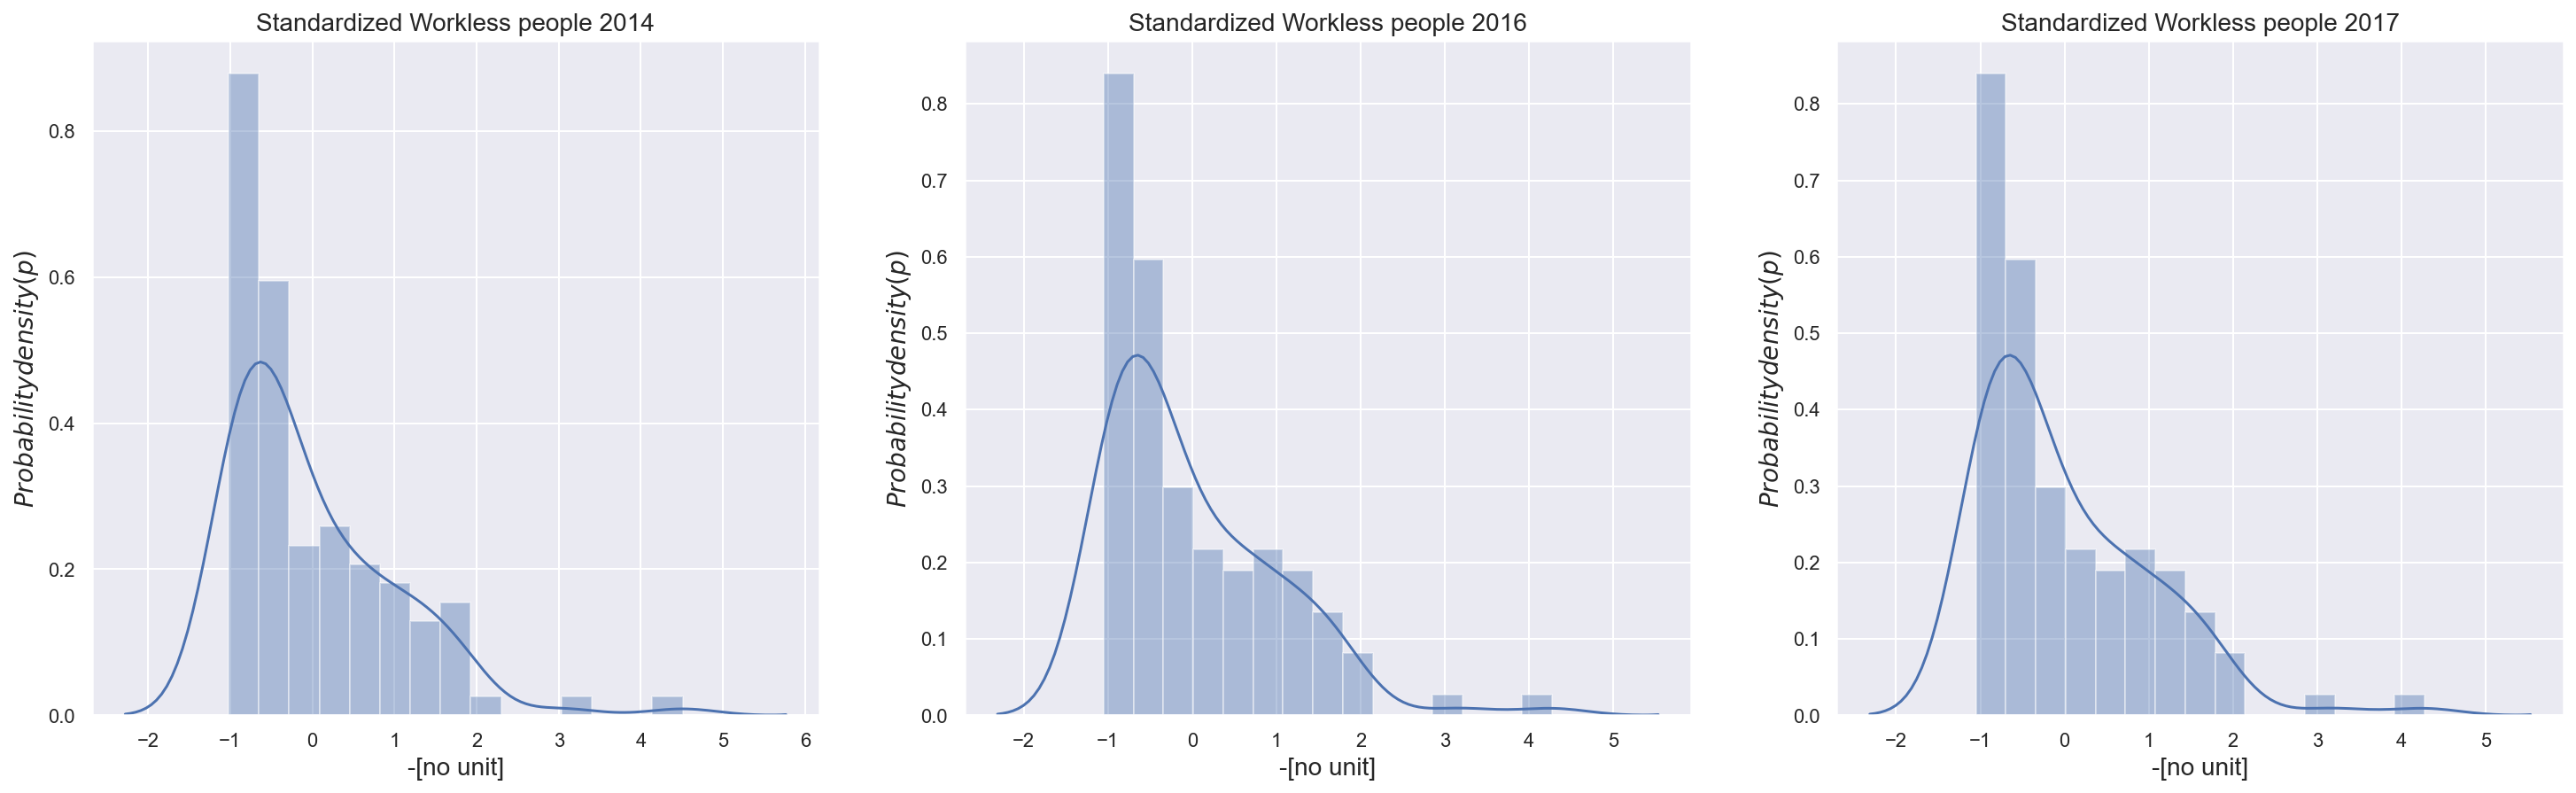

In [98]:

fig, ax = plt.subplots(1,3, figsize=(25,7))

# seaborn goes in first subplot
sns.set(font_scale=1)
sns.distplot(nbh_data_2014.no_job_norm, kde = True,bins= 15 ,label="bins = 15", color="b", ax = ax[0]);
ax[0].set_title('Standardized Workless people 2014', fontsize=14)
ax[0].set_xlabel('-[no unit]', fontsize=14 )
ax[0].set_ylabel(r'$Probability  density (p)$', fontsize=14)



sns.set(font_scale=1)
sns.distplot(nbh_data_2016.no_job_norm, bins= 15, kde = True, label="bw: 5", color="b", ax = ax[1]);
ax[1].set_title('Standardized Workless people 2016', fontsize=14)
ax[1].set_xlabel('-[no unit]', fontsize=14 )
ax[1].set_ylabel(r'$Probability density (p)$', fontsize=14)

sns.set(font_scale=1)
sns.distplot(nbh_data.no_job_norm, kde = True,bins = 15, label="bins = 15", color="b", ax=ax[2]);
ax[2].set_title('Standardized Workless people 2017', fontsize=14)
ax[2].set_xlabel('-[no unit]', fontsize=14 )
ax[2].set_ylabel(r'$Probability density (p)$', fontsize=14)

plt.show()

The distribution seem to be the same for all three years.

There might be small variations in the data of three years, but it can be concluded that all three are half- normally distributed for both income and amount of workless people. Since 2014 does still have a difference in absolute values, this data is best to evaluate the model!

## 3.2 Statistical model ##

**Now we can train with 2017 data and try to predict 2014**

At first I decided to make a multivariate model based on income and workless people as predictor variables, and Dutch percentage as response variable.
However, that would require a 3-D plot, making the information plotted less insightful. I will make two separate predictor variables to train the data with, i.e. two separate univariate models.

In [102]:
#specify predictor variables, income and no-job /job searchers

x_train_no_job = nbh_data['no_job']
x_train_income = nbh_data['income_euros']

x_train_no_job = x_train_no_job.values.reshape(len(x_train_no_job),1)  #reshape to a 2-D array   
x_train_income = x_train_income.values.reshape(len(x_train_income),1)  #reshape to a 2-D array   

     
#specify response variable
y_train = nbh_data.Dutch_percent


y_train = y_train.values.reshape(len(y_train),1)  #reshape to a 2-D array   

In [104]:
#make test_set and training_set
#set random_state to get the same split every time
#traindf, testdf = train_test_split(nbh_data_2016, test_size=0.2, random_state=42)

# build the least squares model
dutch_regr_income = linear_model.LinearRegression()
dutch_regr_no_job = linear_model.LinearRegression()

#fill NaN with mean value of that column using, otherwise I cannot perform linear regression
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
y_imputed_dutch = imp.fit_transform(y_train)
x_imputed_income = imp.fit_transform(x_train_income)
x_imputed_no_job = imp.fit_transform(x_train_no_job)

# # save regression info (parameters, etc) in results_skl
results_income = dutch_regr_income.fit(x_imputed_income, y_imputed_dutch)
results_no_job = dutch_regr_no_job.fit(x_imputed_no_job, y_imputed_dutch)

# # pull the beta parameters out from results_skl
beta0_skl_income = dutch_regr_income.intercept_
beta1_skl_income = dutch_regr_income.coef_[0]

beta0_skl_no_job = dutch_regr_no_job.intercept_
beta1_skl_no_job = dutch_regr_no_job.coef_[0]

print(f"The regression coefficients from the sklearn package for income are: beta_0 = {beta0_skl_income}, beta_1 = {beta1_skl_income}")
print(f"The regression coefficients from the sklearn package for workless people are: beta_0 = {beta0_skl_no_job}, beta_1 = {beta1_skl_no_job}")

The regression coefficients from the sklearn package for income are: beta_0 = [19.83930113], beta_1 = [0.00114732]
The regression coefficients from the sklearn package for workless people are: beta_0 = [59.53205745], beta_1 = [-0.04351282]


The coefficients do not tell me much. It is the plot that and error evaluation that will yield the desired information.

Let us plot and see how good of an estimate it is.

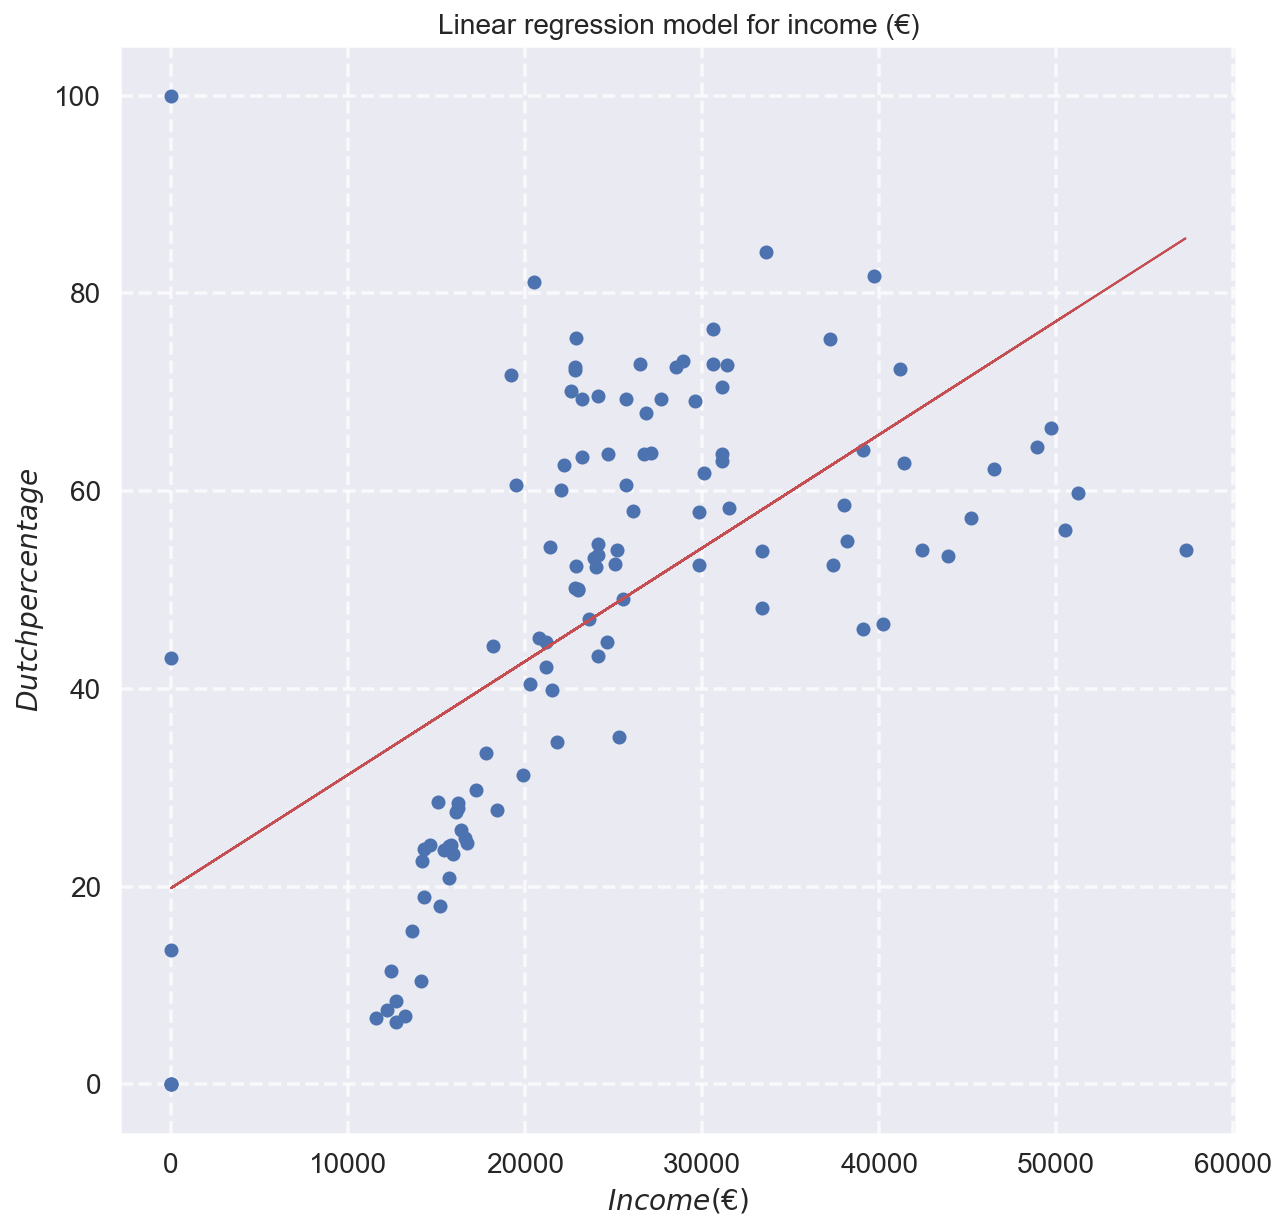

In [105]:
#put the parameters in a function

best_fit_income = beta0_skl_income + beta1_skl_income * x_imputed_income


# make the figure
fig, ax = plt.subplots(1,1, figsize=(10,10)) # Create figure object

f_size = 14
title = "Linear regression model for income (€)"
# set axes limits to make the scale nice
#ax.set_xlim(np.min(x_imputed_income)-1, np.max(x_imputed_income) + 1)
#ax.set_ylim(np.min(y_imputed)-1, np.max(y_imputed) + 1)

# adjust size of tickmarks in axes
ax.tick_params(labelsize = f_size)

# adjust size of axis label
ax.set_xlabel(r'$Income(€)$', fontsize = f_size)
ax.set_ylabel(r'$Dutch   percentage$', fontsize = f_size)

# set figure title label
ax.set_title(title, fontsize = f_size)

# you may set up grid with this 
ax.grid(True, lw=1.75, ls='--', alpha=0.75)

ax.scatter(x_imputed_income , y_train)
ax.plot(x_imputed_income, best_fit_income, linestyle='-', color = 'r',label='Best Fit Line', linewidth = 1)

This looks pretty good, but let us look at the definition and the value of the MSE in order to define how accurate this estimate is.

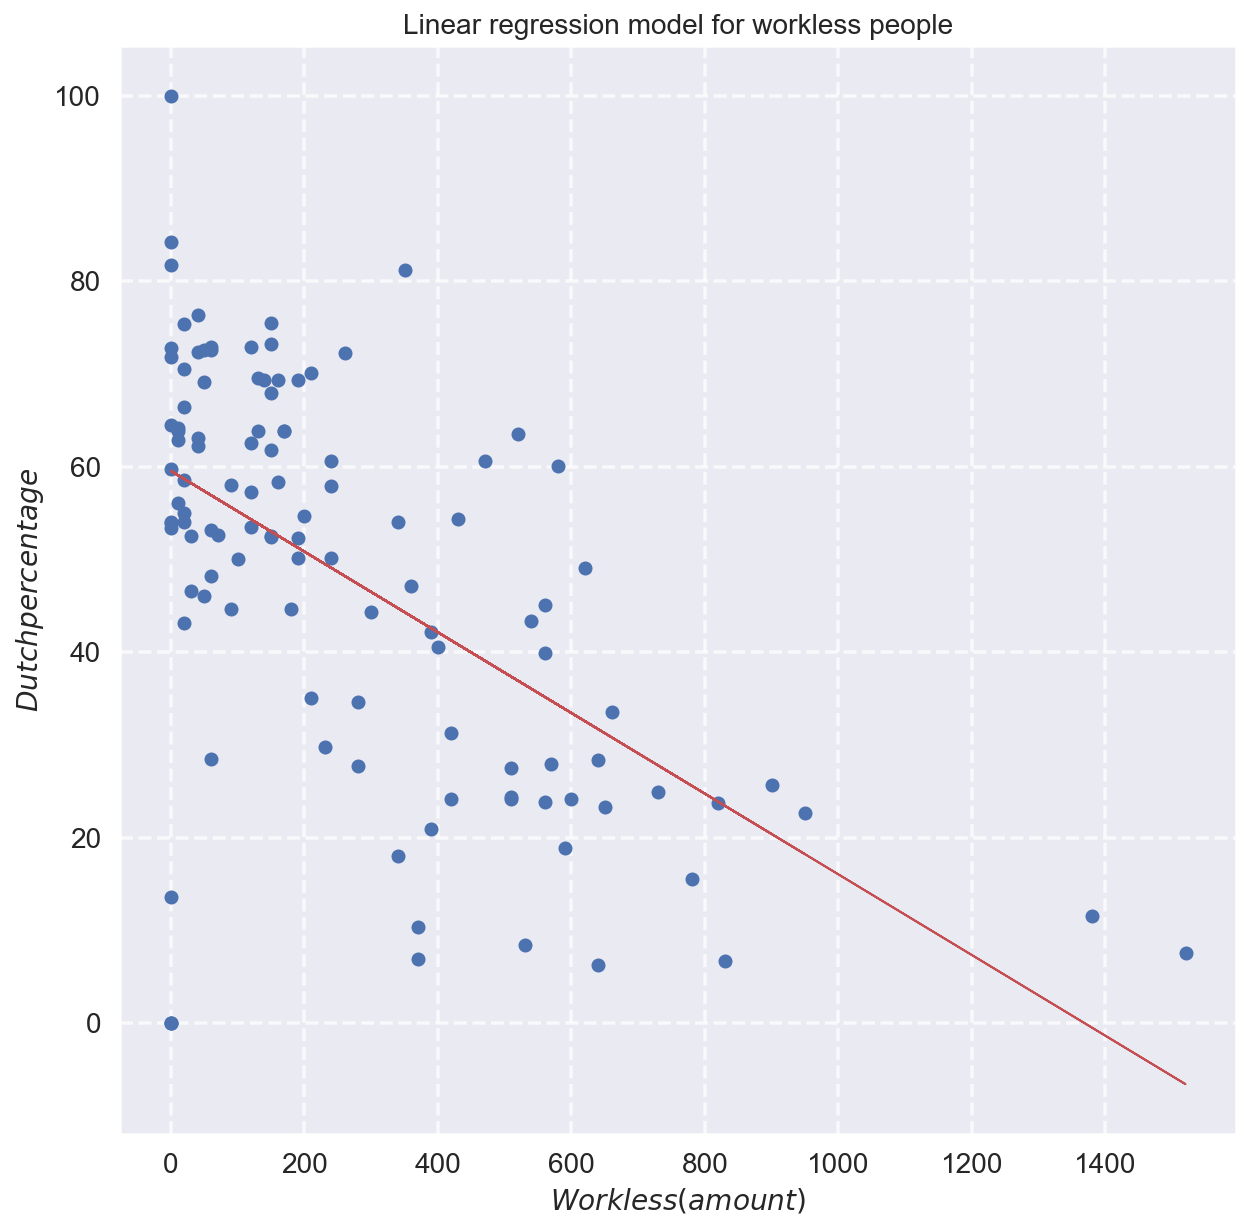

In [106]:
#put the parameters in a function

best_fit_no_job = beta0_skl_no_job + beta1_skl_no_job * x_imputed_no_job


# make the figure
fig, ax = plt.subplots(1,1, figsize=(10,10)) # Create figure object

f_size = 14
title = "Linear regression model for workless people"
# set axes limits to make the scale nice
#ax.set_xlim(np.min(x_imputed_income)-1, np.max(x_imputed_income) + 1)
#ax.set_ylim(np.min(y_imputed)-1, np.max(y_imputed) + 1)

# adjust size of tickmarks in axes
ax.tick_params(labelsize = f_size)

# adjust size of axis label
ax.set_xlabel(r'$Workless (amount)$', fontsize = f_size)
ax.set_ylabel(r'$Dutch   percentage$', fontsize = f_size)

# set figure title label
ax.set_title(title, fontsize = f_size)

# you may set up grid with this 
ax.grid(True, lw=1.75, ls='--', alpha=0.75)

ax.scatter(x_imputed_no_job , y_train)
ax.plot(x_imputed_no_job, best_fit_no_job, linestyle='-', color = 'r',label='Best Fit Line', linewidth = 1)

For both linear models it seems to have a large absolute residual when subtracted from the real training sample data. However this is derived from visualisation of the graph, without any calculations. There are lots of outliers in the data, even after one tried to find the best values to fill in for the missing data. The linear model is especially affected by some high outliers in the amount of working people. Because of the 2 outliers of neighborhoods with more than 1000 people workless the entire regression line is pulled down.

There seems to be no linear relation what so ever for the data analysed.

Later, the model will be analysed through error evaluation (Next section). Then, real conclusions can be derived.

## 3.2.1 Linear regression model fitness evaluation ##

MSE is defined as:

![](data/mse.png)

In [107]:
#calculate mean squared error for income and no job
mse_income = mean_squared_error(best_fit_income, y_train, squared = False)
mse_no_job = mean_squared_error(best_fit_no_job, y_train, squared = False)


print(f"The MSE for the income model is MSE = {mse_income}, and for the workless model MSE  = {mse_no_job}")

The MSE for the income model is MSE = 17.542270016135202, and for the workless model MSE  = 17.848721008644205


The MSE for both variables is reasonably high. Dutch % can range from 0% to 100% and having an error range of 20% is already too high for a model to be considered fit to use for other test data.


R^2 evaluation

In [108]:
#R^2
r2_score(best_fit_income, y_train)

-0.8185625687866522

In [109]:
r2_score(best_fit_no_job, y_train)

-1.0115839385851242

A $R^{2}$ of -2.38 and $R^{2}$ of -0.81 is significantly negative. The model performs worst than average in this case.

Conclusively, the model is not fit to use as test model. The model does not fit the training data properly, since it is **sensitive** to outliers. A solution in the future could be using a higher degree regression model, combined with an algortihm that does not take outliers into account. This way, you avoid overfitting, while having smaller absolute residuals between your model and actual sample values.

It was decided to not proceed with this model, and see if the k-nearest neighbor performs better.

In [110]:
##add higher degree polynomials and see if this yields better estimates to evaluate with a model

## 3.2.2 K-nearest neighbor ##

I will try out different k's and see which performs best.

The k-nearest neighbor will only be applied on income as predictor variable. The scatter plot of workless people in the previous section showed that the sample points are randomly placed. If a model is made based on this, it will easily be overfitted with such a simple algorithm. Therefore, it is neglected for the purpose of this assignment.

In [1]:
# Make our lives easy by storing the different regressors in a dictionary
regdict = {}

# Make our lives easier by entering the k values from a list
k_list = range(1,2)

# Do a bunch of KNN regressions
for k in k_list:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(x_imputed_income, y_train)
    # Store the regressors in a dictionary
    regdict[k] = knnreg 

# Print the dictionary to see what we have
regdict

NameError: name 'KNeighborsRegressor' is not defined

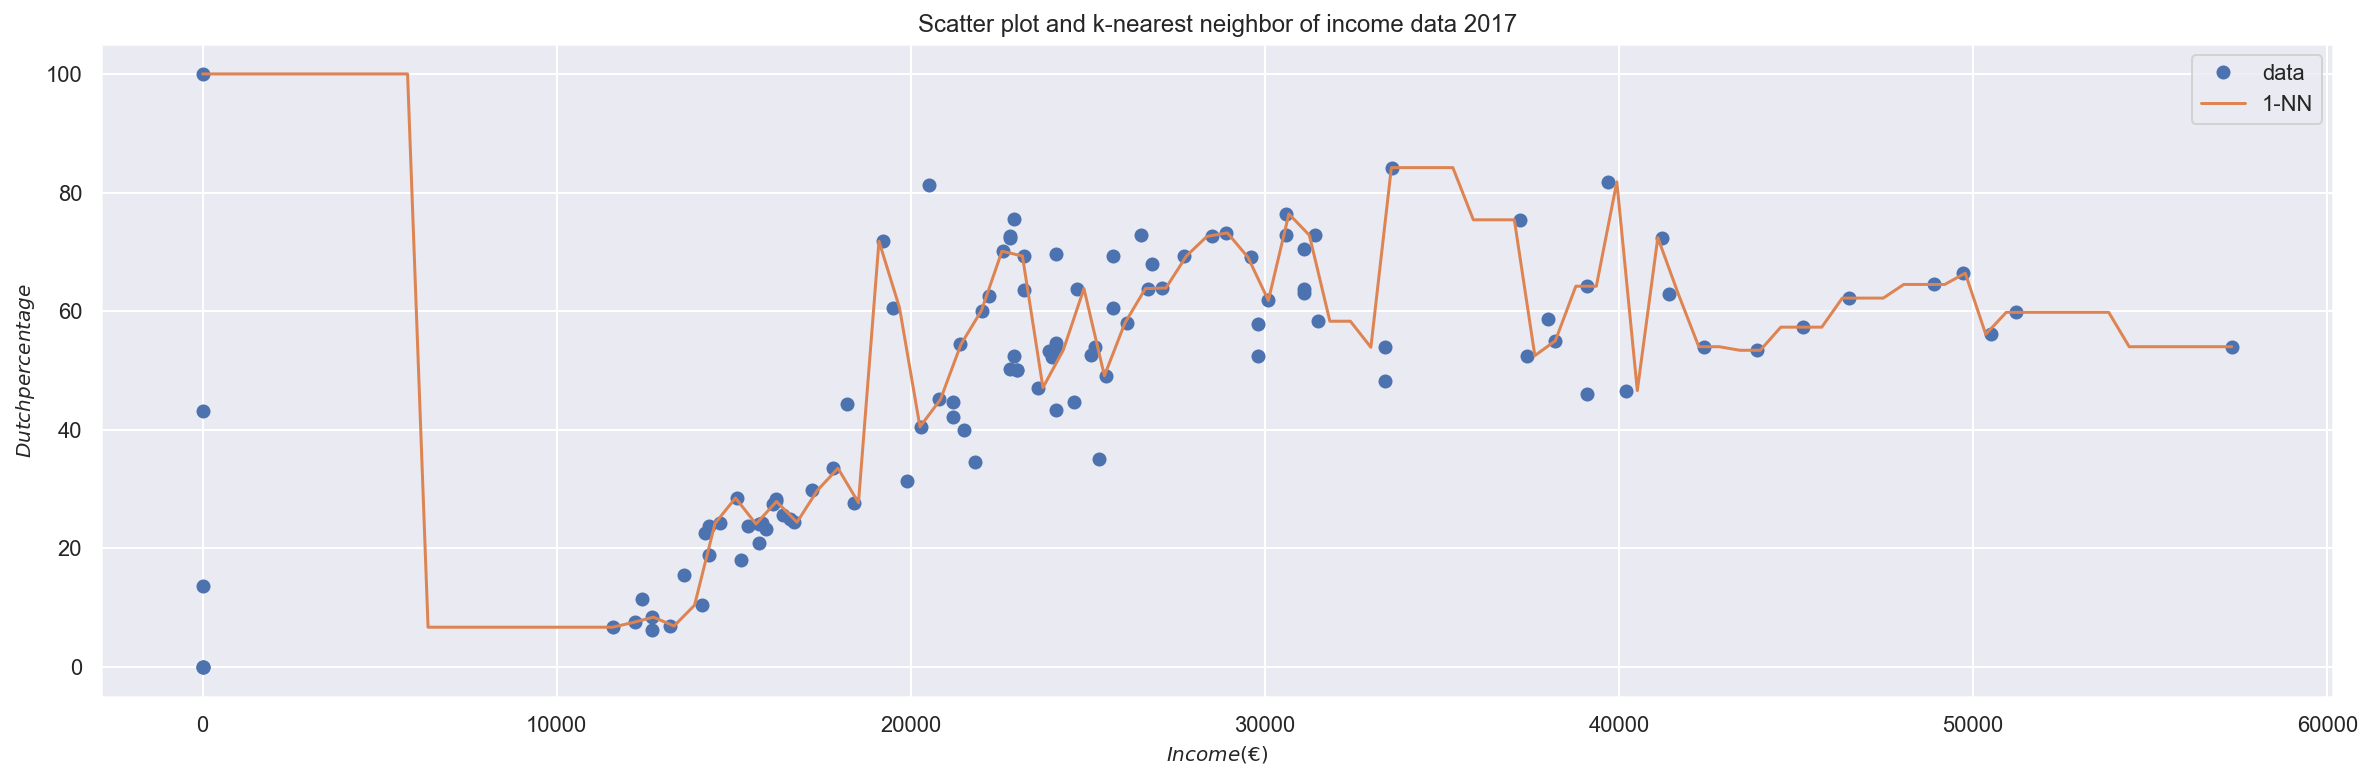

In [112]:
fig, ax = plt.subplots(1,1, figsize=(20,6))

ax.plot(x_imputed_income, y_train, 'o', label="data")

xgrid = np.linspace(np.min(x_imputed_income), np.max(x_imputed_income), 100)

# let's unpack the dictionary to its elements (items) which is the k and Regressor
for k, regressor in regdict.items():
    predictions = regressor.predict(xgrid.reshape(-1,1)) 
    ax.plot(xgrid, predictions, label="{}-NN".format(k))
    ax.set_title("Scatter plot and k-nearest neighbor of income data 2017")
    ax.set_xlabel(r'$Income(€)$', fontsize = 10)
    ax.set_ylabel(r'$Dutch   percentage$', fontsize = 10)
    
ax.legend();

When k = 1 the model seems to be accurate, passing through lots of data samples, but you are testing the training model on the training data. This can lead to overfitting when using for a test model. Therefore it is better to evaluate more k-values when using test data.

Text(0.5, 1.0, 'Performance k-nearest neighbor on its training data 2017')

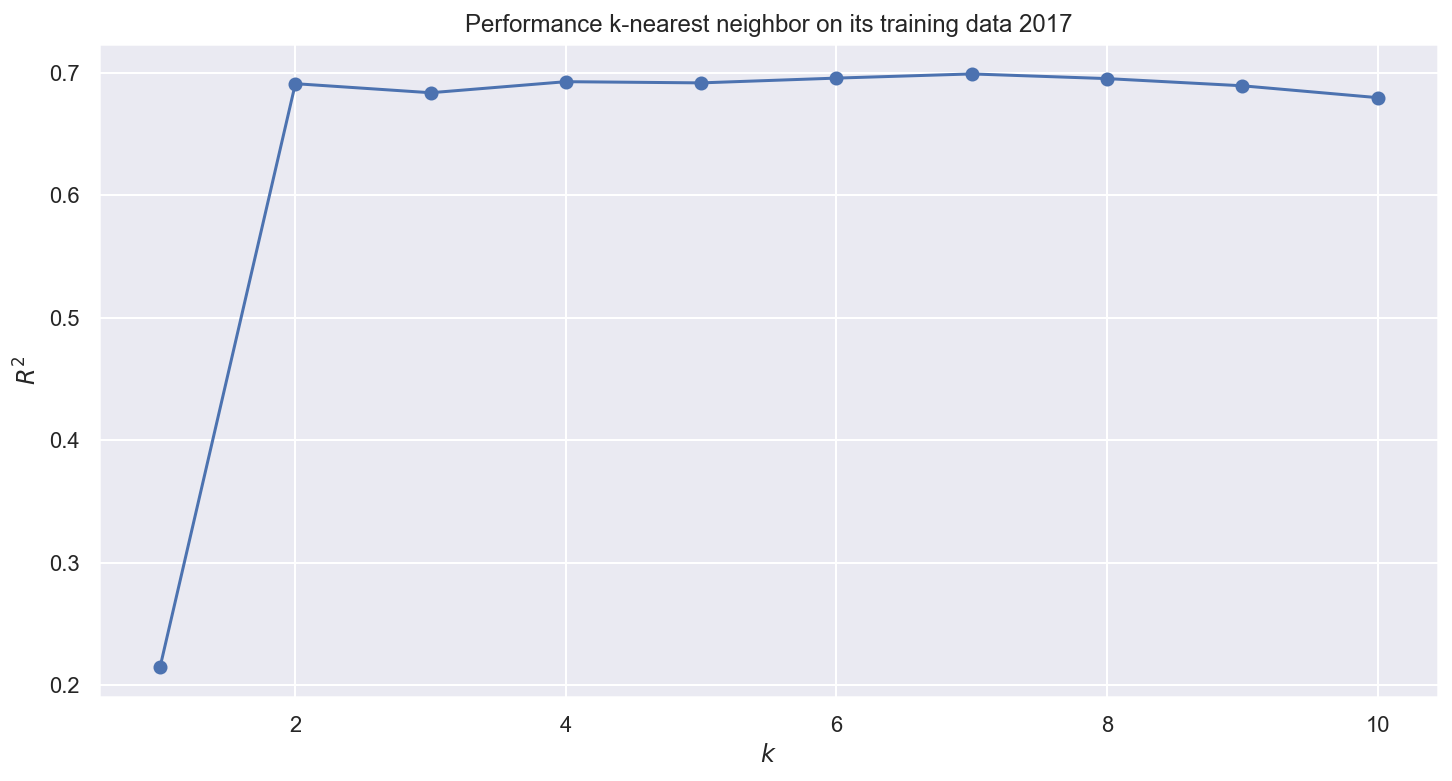

In [113]:
ks = range(1, 11) # Grid of k's
scores_train = [] # R2 scores
for k in ks:
    # Create KNN model
    knnreg = KNeighborsRegressor(n_neighbors=k) 
    
    # Fit the model to training data
    knnreg.fit(x_imputed_income, y_train) 
    
    # Calculate R^2 score
    score_train = knnreg.score(x_imputed_income, y_train) 
    scores_train.append(score_train)

# Plot
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.plot(ks, scores_train,'o-')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$')
ax.set_title("Performance k-nearest neighbor on its training data 2017")


In [114]:
scores_train #list of R^2

[0.2148402650685607,
 0.6910152578869275,
 0.6836194264000001,
 0.6926466906269926,
 0.6916684094049275,
 0.6955675491717603,
 0.6989738007505284,
 0.6951642745670713,
 0.6892985154554409,
 0.6796161259245077]

The best k is reached when k = 1. If the k-nearest neighbor increases, the performance will rapidly decrease. But the $R^{2}$ values are better than for the linear regression model. Therefore, I choose the k-nearest neighbor as a fit model to use for the test data.

## 3.3 Test data on k-nearest neighbor ##

Firstly, out of the 2017 data: **80% as training data** and **20% as test data**. This tells if the model can be used to predict the response values of other neighborhoods in the same year. I preferred to have more training data to be able to predict the last 80% more accurately. Less test data will probably mean the last few ones are outliers, and therefore difficult to predict. More test data, means less training data, which is also not desired. It is a trade-off when it comes to training and testing on the same year.

Thereafter, 2017 will be used completely as training data. 2014 as test data, and 10% of 2014 as validation data, in the hope to remove outliers from the validation set. This test will provide information about the feasibility of this model to predict response variables for other years.

## 3.3.1 2017 Data test ##

In [115]:
#make test_set and training_set
#set random_state to get the same split every time

#for income as predictor variable
traindf, testdf = train_test_split(nbh_data, test_size=0.2, random_state=42)
x_train_income = traindf.income_euros
y_train_income = traindf.Dutch_percent
x_train_income = x_train_income.values.reshape(len(x_train_income),1)  #reshape to a 2-D array   

x_test_income = testdf.income_euros
y_test_income = testdf.Dutch_percent
x_test_income = x_test_income.values.reshape(len(x_test_income),1)  #reshape to a 2-D array   

#do the same for workless amount as predictor variable
x_train_no_job = traindf.no_job
y_train_no_job = traindf.Dutch_percent
x_train_no_job  = x_train_no_job.values.reshape(len(x_train_no_job),1)  #reshape to a 2-D array   


x_test_no_job = testdf.no_job
y_test_no_job = testdf.Dutch_percent
x_test_no_job = x_test_no_job.values.reshape(len(x_test_no_job),1)  #reshape to a 2-D array   


Text(0.5, 1.0, '$R^{2}$ performance for different k-values of year 2017')

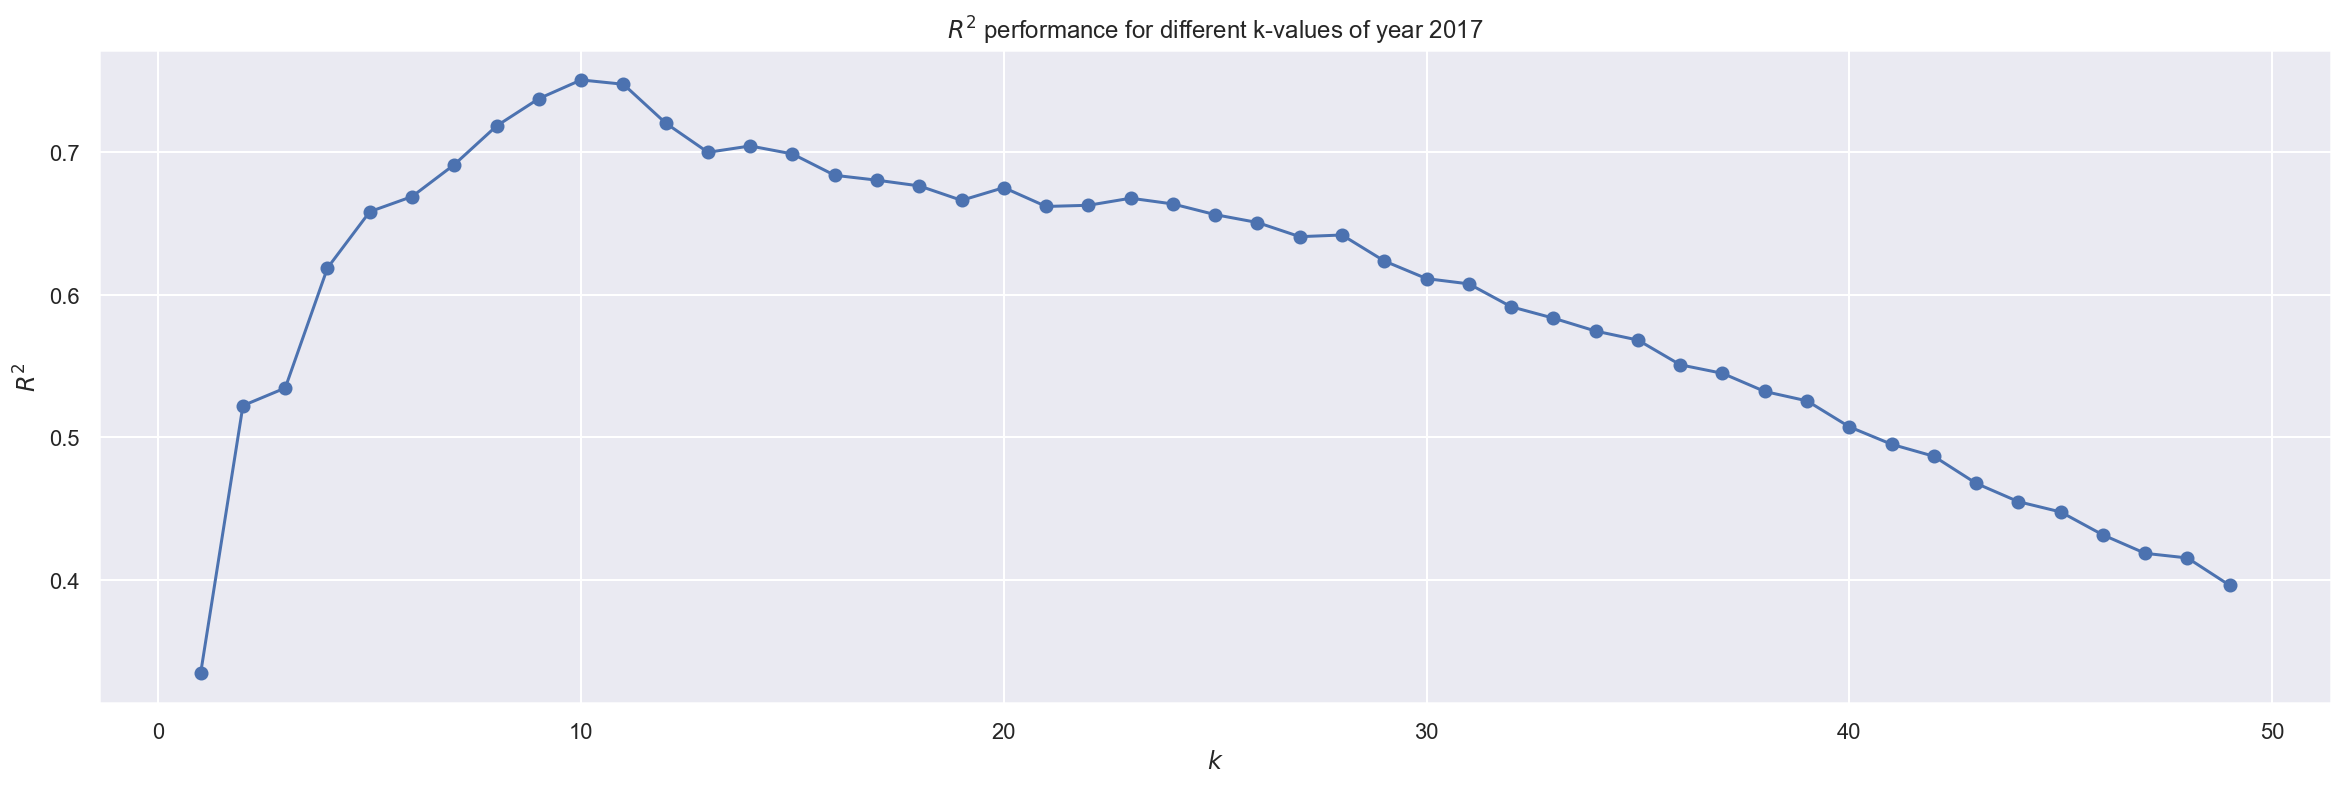

In [116]:
ks = range(1, 50) # Grid of k's
scores_train = [] # R2 scores
for k in ks:
    # Create KNN model
    knnreg = KNeighborsRegressor(n_neighbors=k) 
    
    # Fit the model to training data
    knnreg.fit(x_train_income, y_train_income) 
    
    # Calculate R^2 score
    score_train = knnreg.score(x_test_income, y_test_income) 
    scores_train.append(score_train)

# Plot
fig, ax = plt.subplots(1,1, figsize=(20,6))
ax.plot(ks, scores_train,'o-')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$')
ax.set_title('$R^{2}$ performance for different k-values of year 2017')

The model performs best when k = 3 by having a $R^{2}$ of approximately 0.64. Therefore, it is not a very accurate model. The model cannot account for 35% of the variability in the data.

I will plot k=3 model now with the training, and test data.

In [119]:
# Make our lives easy by storing the different regressors in a dictionary
regdict = {}

# Do one KNN regressions
k = 3
knnreg = KNeighborsRegressor(n_neighbors=k)
knnreg.fit(x_train_income, y_train_income)
# Store the regressors in a dictionary
regdict[k] = knnreg 

# Print the dictionary to see what we have
regdict

{3: KNeighborsRegressor(n_neighbors=3)}

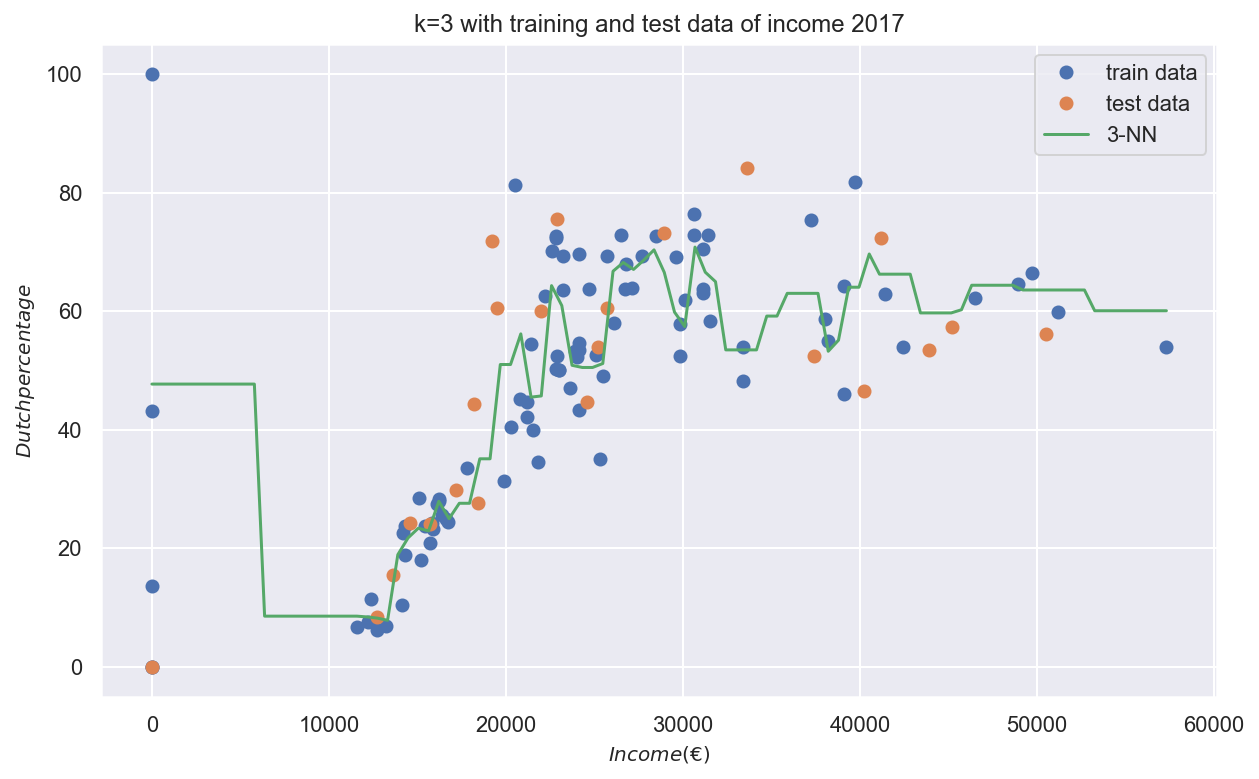

In [120]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(x_train_income, y_train_income, 'o', label="train data")
ax.plot(x_test_income, y_test_income, 'o', label="test data")
xgrid = np.linspace(np.min(x_imputed_income), np.max(x_imputed_income), 100)

# let's unpack the dictionary to its elements (items) which is the k and Regressor
for k, regressor in regdict.items():
    predictions = regressor.predict(xgrid.reshape(-1,1)) 
    ax.plot(xgrid, predictions, label="{}-NN".format(k))
    # adjust size of axis label
    ax.set_xlabel(r'$Income(€)$', fontsize = 10)
    ax.set_ylabel(r'$Dutch   percentage$', fontsize = 10)

ax.set_title("k=3 with training and test data of income 2017")
ax.legend();

A reason why the $R^{2}$ is so low maybe is because overfitting occurs for the outliers as can be seen around 25.000€, making it hard for the k-nearest neighbor to predict other more common values in the viccinity.

Text(0.5, 1.0, '$R^{2}$ performance for different k-values of workless people 2017')

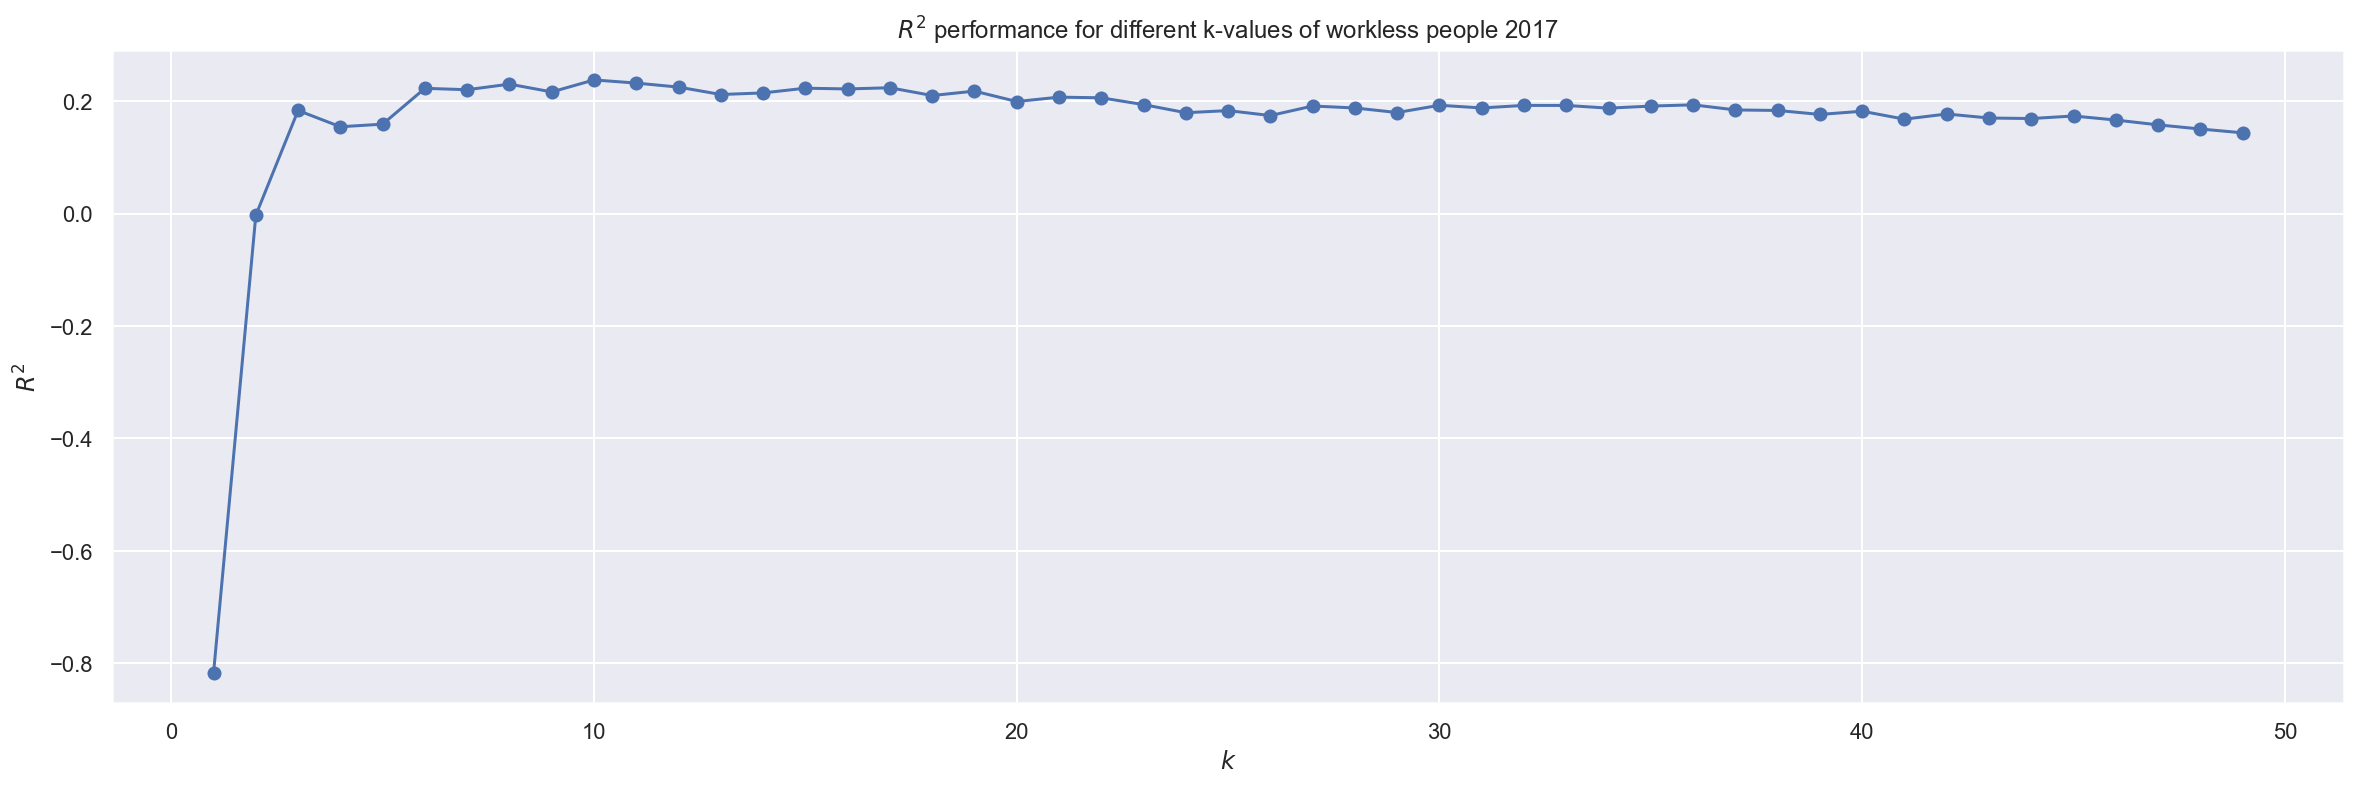

In [121]:
ks = range(1, 50) # Grid of k's
scores_train = [] # R2 scores
for k in ks:
    # Create KNN model
    knnreg = KNeighborsRegressor(n_neighbors=k) 
    
    # Fit the model to training data
    knnreg.fit(x_train_no_job, y_train_no_job) 
    
    # Calculate R^2 score
    score_train = knnreg.score(x_test_no_job, y_test_no_job) 
    scores_train.append(score_train)

# Plot
fig, ax = plt.subplots(1,1, figsize=(20,6))
ax.plot(ks, scores_train,'o-')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$')
ax.set_title('$R^{2}$ performance for different k-values of workless people 2017')

In [122]:
scores_train

#find highest k
index_max = np.argmax(scores_train) +1
value_max = np.amax(scores_train)
index_min = np.argmin(scores_train) +1
value_min = np.amin(scores_train)
print("The best positive $R^{2}$ is reached when k =", {index_max}, "with R^2 = " ,{value_max})
print('and best negative $R^{2}$ is reached when k =', {index_min}, "with R^2 = " ,{value_min})

The best positive $R^{2}$ is reached when k = {10} with R^2 =  {0.23767401821020373}
and best negative $R^{2}$ is reached when k = {1} with R^2 =  {-0.8174540577796916}


It could be concluded that workless people as predictor variable is not sufficient. The R^2 does not improve with different k's. 

The best k is reached when k = {11} with $R^{2}$ =  {0.2668412609934382}. Which is not very good. 

However, another approach could be applied where you use the negative linear relationship for k = 1.  For k = 1, $R^{2}$ = -1.07, which indicates that every response variable is mirrored on the symmetry axis of both. For example if the k-model has Dutch% = 20% , then the response variable is probably 80% (100% - 20%). Only if this method is applied, this model could be considered to be fit for prediction of Dutch percentage in neighborhoods in the same year.

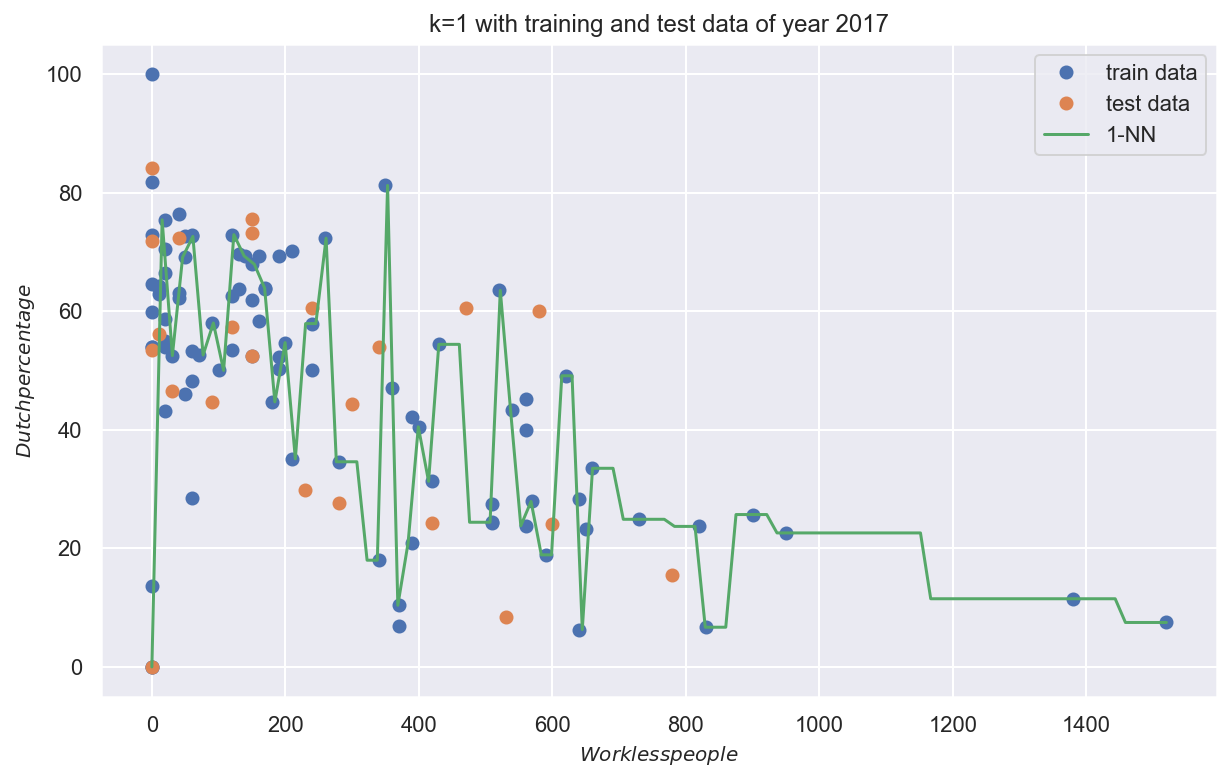

In [123]:
# Make our lives easy by storing the different regressors in a dictionary
regdict = {}

# Make our lives easier by entering the k values from a list
k_list = range(1,2)

# Do a bunch of KNN regressions
for k in k_list:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(x_train_no_job, y_train_no_job)
    # Store the regressors in a dictionary
    regdict[k] = knnreg 

# Print the dictionary to see what we have
regdict


fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(x_train_no_job, y_train_no_job, 'o', label="train data")
ax.plot(x_test_no_job, y_test_no_job, 'o', label="test data")
xgrid = np.linspace(np.min(x_imputed_no_job), np.max(x_imputed_no_job), 100)


# let's unpack the dictionary to its elements (items) which is the k and Regressor
for k, regressor in regdict.items():
    predictions = regressor.predict(xgrid.reshape(-1,1)) 
    ax.plot(xgrid, predictions, label="{}-NN".format(k))
    
ax.set_xlabel(r'$Workless people$', fontsize = 10)
ax.set_ylabel(r'$Dutch   percentage$', fontsize = 10)

ax.set_title("k=1 with training and test data of year 2017")
ax.legend();




As stated previously, sometimes the model indicates that the response variable is the opposite from what it should be. This is seen in the graph. However, still a poor negative relationship. Again, it is overfitted.

## 3.3.2 2014 Data test ##

In [126]:

#fill NaN with mean value of the columns using imo
#specify predictor variables, income and no job /job searchers

data_change = nbh_data_2014[['Dutch_percent', 'ethnic_percent', 'income_euros', 'no_job']]

data_change = data_change.values.reshape(len(data_change),4)  #reshape to a 2-D array   

data_change_imputed = imp.fit_transform(data_change)

dutch_imp = data_change_imputed[:,0]   #store imputed value for income 
ethnic_imp  = data_change_imputed[:,1] #store imputed value for people with no job
income_imp = data_change_imputed[:,2] #store imputed value for people with no job
no_job_imp = data_change_imputed[:,3] #store imputed value for people with no job

dutch_imp  = dutch_imp .reshape(len(dutch_imp),1)  #reshape to one column again   
ethnic_imp = ethnic_imp.reshape(len(ethnic_imp),1)   #reshape to one column again  
income_imp  = income_imp .reshape(len(income_imp),1)  #reshape to one column again   
no_job_imp = no_job_imp.reshape(len(no_job_imp),1)   #reshape to one column again  

#replace the values in the DataFrame
nbh_data_2014['Dutch_percent'] = dutch_imp  
nbh_data_2014['ethnic_percent'] = ethnic_imp
nbh_data_2014['income_euros'] = income_imp  
nbh_data_2014['no_job'] = no_job_imp
nbh_data_2014

neigb_cijf                                           geometry  Dutch_percent  ethnic_percent  income_euros     no_job  dutch_norm  ethnic_norm  income_norm  no_job_norm
0       70 Oostduinen  POLYGON ((4.30290 52.12832, 4.30298 52.12827, ...          54.77       45.611927  34812.727273  430.47619         NaN          NaN          NaN          NaN
1    71 Belgisch Park  POLYGON ((4.28056 52.11706, 4.28053 52.11706, ...          65.70       34.300000  41200.000000  290.00000    0.536161    -0.563248     0.380048    -0.340582
2    73 Westbroekpark  POLYGON ((4.29171 52.10745, 4.29181 52.10739, ...          68.40       31.600000  65000.000000  430.47619    0.668607    -0.697688     1.796170          NaN
3        74 Duttendel  POLYGON ((4.32252 52.10768, 4.32252 52.10766, ...          67.80       32.200000  68100.000000   30.00000    0.639175    -0.667812     1.980622    -0.970947
4      48 Nassaubuurt  POLYGON ((4.31943 52.09247, 4.31943 52.09247, ...          59.00       41.000000  74400.000000   30.00000    0.207499    -0.229639     2.355478    -0.970947
..                ...                                                ...            ...             ...           ...        ...         ...          ...          ...          ...
109   117 De Rivieren  POLYGON ((4.39709 52.07476, 4.39778 52.07496, ...          96.40       45.611927      0.000000  430.47619    2.042123          NaN    -2.071388          NaN
110      118 De Lanen  POLYGON ((4.40245 52.06319, 4.40242 52.06314, ...          61.80       38.200000  37600.000000  200.00000    0.344850    -0.369058     0.165845    -0.558785
111     119 De Velden  POLYGON ((4.40593 52.07659, 4.40607 52.07649, ...          64.70       35.300000  37300.000000  190.00000    0.487107    -0.513456     0.147995    -0.583030
112     120 De Vissen  POLYGON ((4.41188 52.07213, 4.41192 52.07210, ...          64.40       35.600000  36200.000000  360.00000    0.472391    -0.498518     0.082544    -0.170868
113     121 Rietbuurt  POLYGON ((4.41539 52.05744, 4.41538 52.05707, ...          59.20       40.800000  39400.000000  120.00000    0.217310    -0.239598     0.272947    -0.752744

[114 rows x 10 columns]

In [127]:
#make test_set and training_set
#set random_state to get the same split every time

#for income as predictor variable
x_train_income = nbh_data.income_euros
y_train_income =  nbh_data.Dutch_percent
x_train_income =  x_train_income.values.reshape(len(x_train_income),1)  #reshape to a 2-D array   

x_test_income = nbh_data_2014.income_euros
y_test_income = nbh_data_2014.Dutch_percent
x_test_income = x_test_income.values.reshape(len(x_test_income),1)  #reshape to a 2-D array   

#do the same for workless amount as predictor variable
x_train_no_job = nbh_data.no_job
y_train_no_job = nbh_data.Dutch_percent
x_train_no_job  = x_train_no_job.values.reshape(len(x_train_no_job),1)  #reshape to a 2-D array   


x_test_no_job = nbh_data_2014.no_job
y_test_no_job = nbh_data_2014.Dutch_percent
x_test_no_job = x_test_no_job.values.reshape(len(x_test_no_job),1)  #reshape to a 2-D array   


Text(0.5, 1.0, '$R^{2}$ performance for different k-values of year 2014')

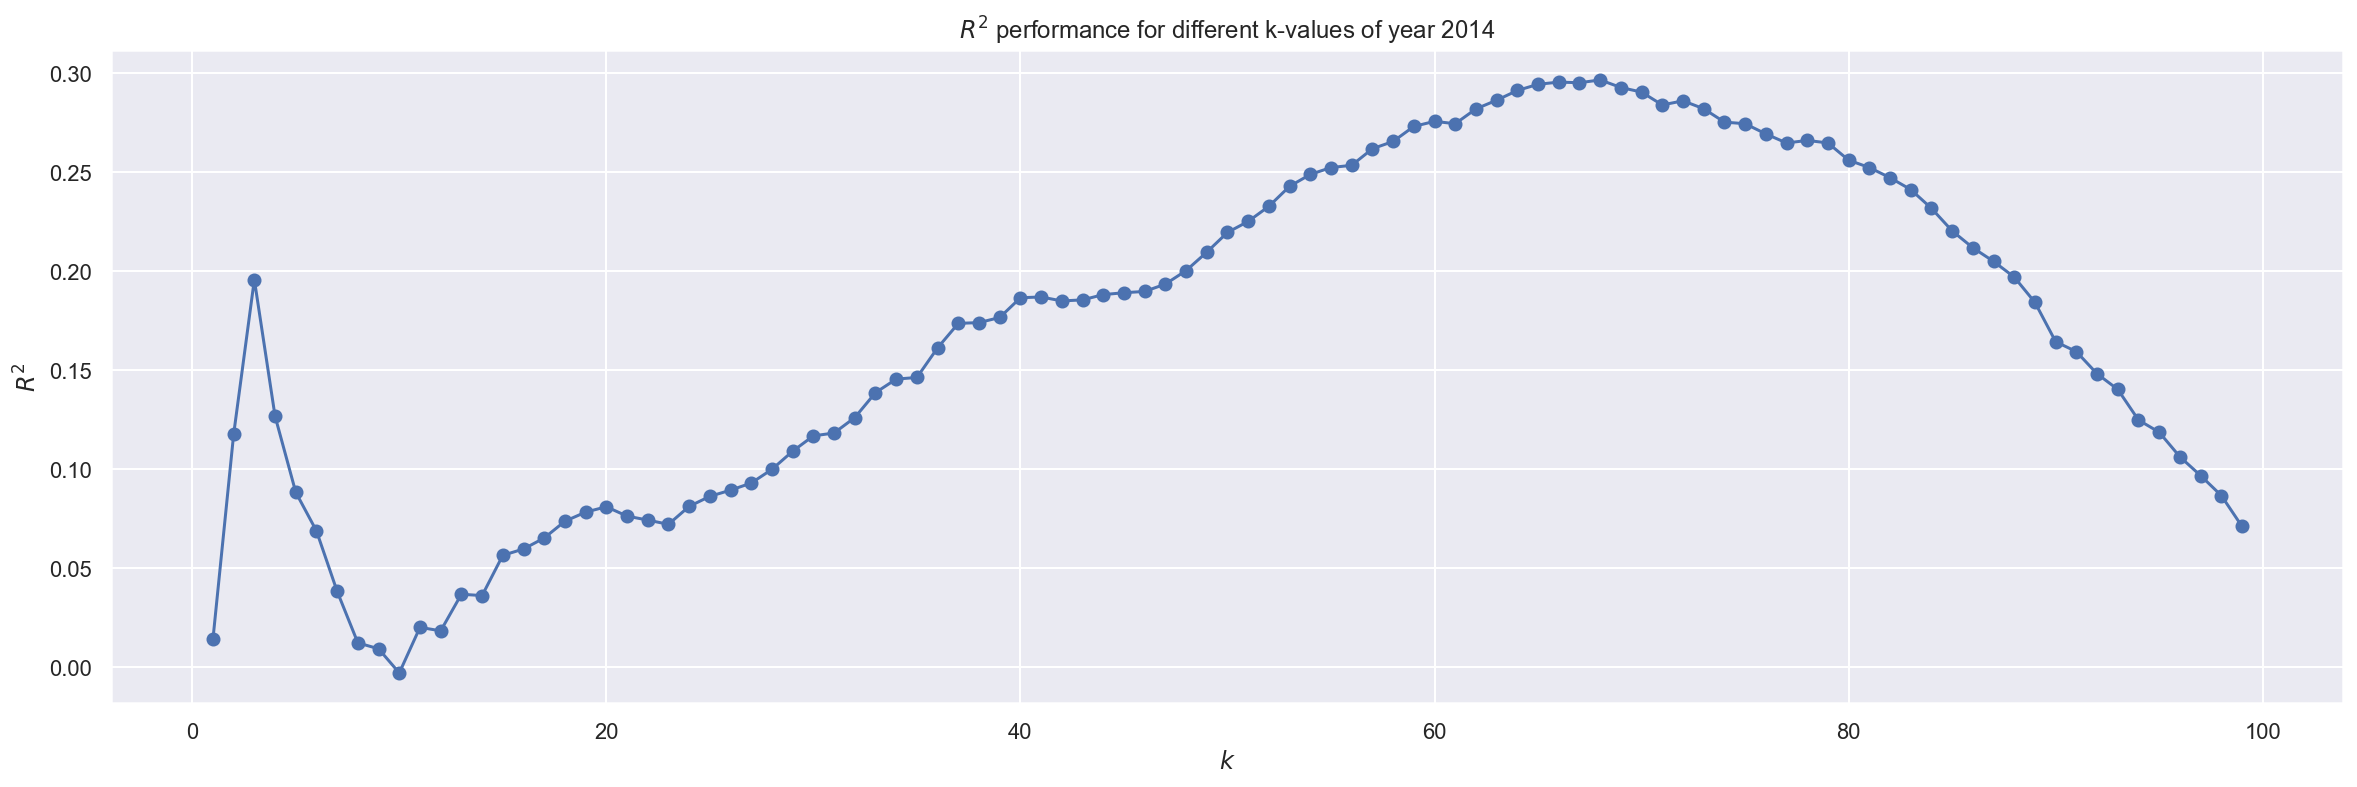

In [128]:
ks = range(1, 100) # Grid of k's
scores_train = [] # R2 scores
for k in ks:
    # Create KNN model
    knnreg = KNeighborsRegressor(n_neighbors=k) 
    
    # Fit the model to training data
    knnreg.fit(x_train_income, y_train_income) 
    
    # Calculate R^2 score
    score_train = knnreg.score(x_test_income, y_test_income) 
    scores_train.append(score_train)

# Plot
fig, ax = plt.subplots(1,1, figsize=(20,6))
ax.plot(ks, scores_train,'o-')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$')
ax.set_title('$R^{2}$ performance for different k-values of year 2014')

In [129]:
scores_train # visualize this is in a list

#find highest k
index_max = np.argmax(scores_train) +1
value_max = np.amax(scores_train)
print("The best positive R^2 is reached when k =", {index_max}, "with R^2 = " ,{value_max})

The best positive R^2 is reached when k = {68} with R^2 =  {0.2964553498756608}


The best k is k = 68 with $R^{2}$ = 0.3014. Conclusively, there is a weak linear relationship. The model performs equally good to the mean in such case.

In [130]:
# Make our lives easy by storing the different regressors in a dictionary
regdict = {}

# Do one KNN regressions
k = 68

knnreg = KNeighborsRegressor(n_neighbors=k)
knnreg.fit(x_train_income, y_train_income) #fit to training data

# Store the regressors in a dictionary
regdict[k] = knnreg 

# Print the dictionary to see what we have
regdict

{68: KNeighborsRegressor(n_neighbors=68)}

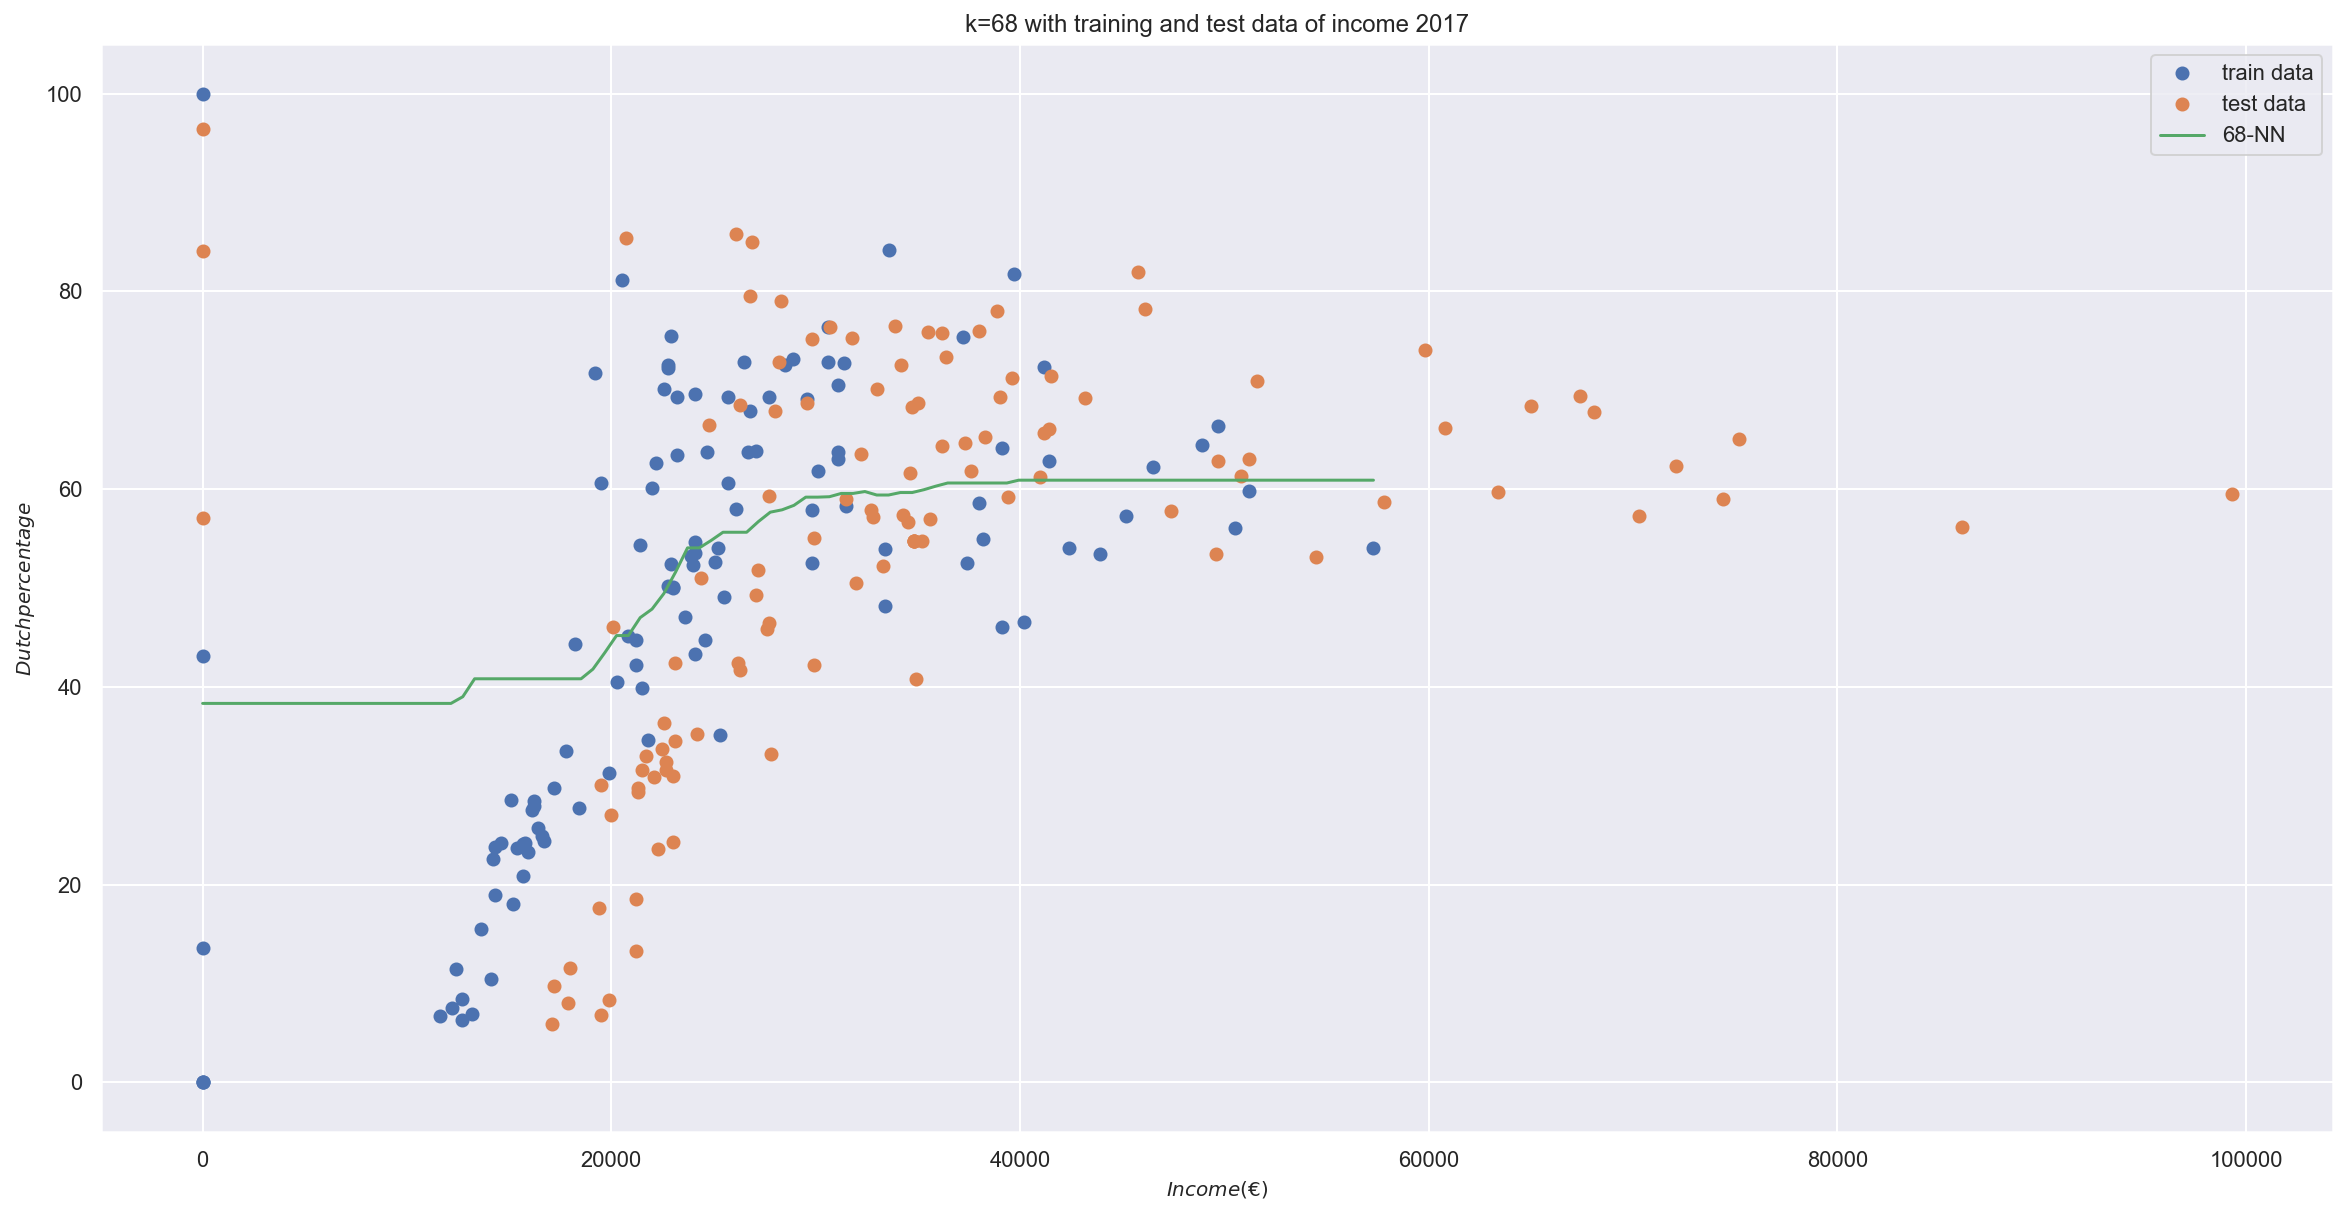

In [131]:
fig, ax = plt.subplots(1,1, figsize=(20,10))

ax.plot(x_train_income, y_train_income, 'o', label="train data")
ax.plot(x_test_income, y_test_income, 'o', label="test data")
xgrid = np.linspace(np.min(x_imputed_income), np.max(x_imputed_income), 100)

# let's unpack the dictionary to its elements (items) which is the k and Regressor
for k, regressor in regdict.items():
    predictions = regressor.predict(xgrid.reshape(-1,1)) 
    ax.plot(xgrid,predictions, label="{}-NN".format(k))
    # adjust size of axis label
    ax.set_xlabel(r'$Income(€)$', fontsize = 10)
    ax.set_ylabel(r'$Dutch   percentage$', fontsize = 10)

ax.set_title("k=68 with training and test data of income 2017")
ax.legend();

The test data deviates a lot from the training data and therefore the k-nearest neighbor model performs poorly for the entire dataset of 2014. A lot of the test data lies outside the scope even of the training data. They are not outliers, rather an indication that economic situation can change throughout years significantly.

## 3.3.3 2014 Data validity test ##

In [132]:
traindf, testdf = train_test_split(nbh_data_2014, test_size=0.1, random_state=42)

#make test_set
#set random_state to get the same split every time
x_test_income = testdf.income_euros
y_test_income = testdf.Dutch_percent
x_test_income = x_test_income.values.reshape(len(x_test_income),1)  #reshape to a 2-D array   

x_test_no_job = testdf.no_job
y_test_no_job = testdf.Dutch_percent
x_test_no_job = x_test_no_job.values.reshape(len(x_test_no_job),1)  #reshape to a 2-D array   

Text(0.5, 1.0, '$R^{2}$ performance for different k-values of year 2014')

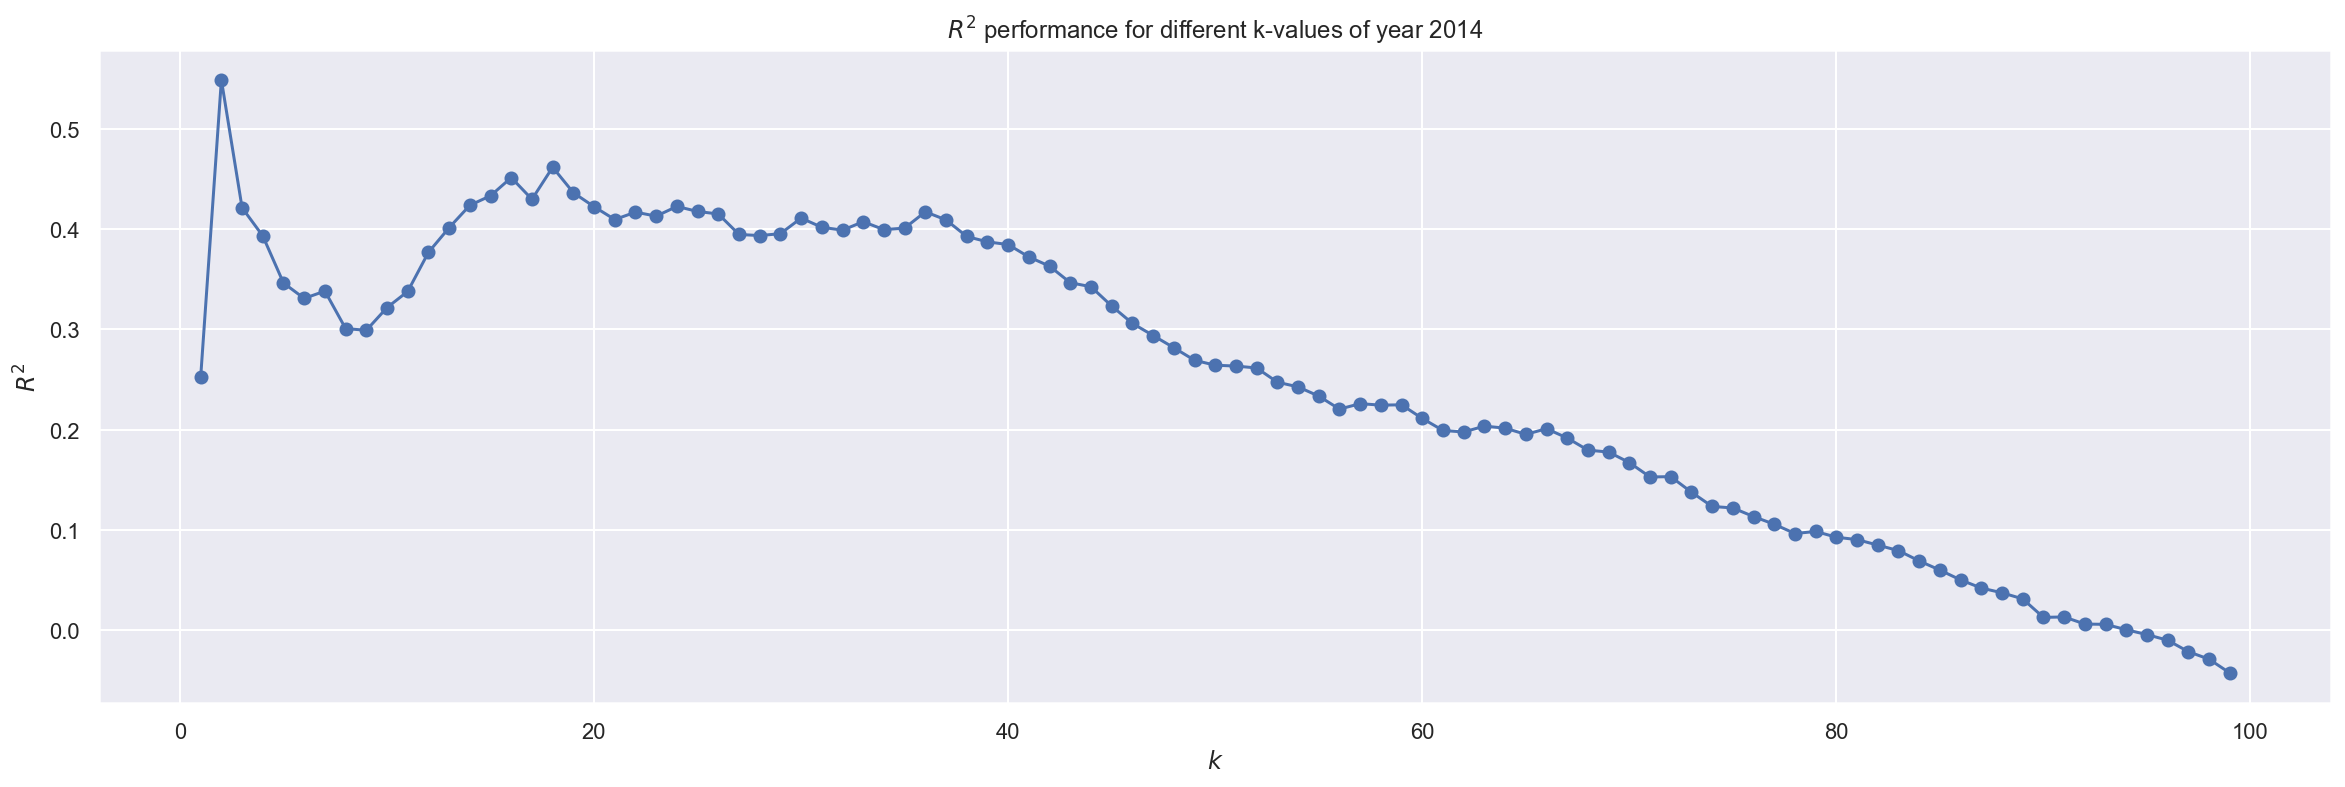

In [133]:
ks = range(1, 100) # Grid of k's
scores_train = [] # R2 scores
for k in ks:
    # Create KNN model
    knnreg = KNeighborsRegressor(n_neighbors=k) 
    
    # Fit the model to training data
    knnreg.fit(x_train_income, y_train_income) 
    
    # Calculate R^2 score
    score_train = knnreg.score(x_test_income, y_test_income) 
    scores_train.append(score_train)

# Plot
fig, ax = plt.subplots(1,1, figsize=(20,6))
ax.plot(ks, scores_train,'o-')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$')
ax.set_title('$R^{2}$ performance for different k-values of year 2014')

In [134]:
scores_train # visualize this is in a list

#find highest k
index_max = np.argmax(scores_train) +1
value_max = np.amax(scores_train)
print("The best positive R^2 is reached when k =", {index_max}, "with R^2 = " ,{value_max})

The best positive R^2 is reached when k = {2} with R^2 =  {0.5489154792024749}


In [135]:
# Make our lives easy by storing the different regressors in a dictionary
regdict = {}

# Do one KNN regressions
k = 2

knnreg = KNeighborsRegressor(n_neighbors=k)
knnreg.fit(x_train_income, y_train_income) #fit to training data

# Store the regressors in a dictionary
regdict[k] = knnreg 

# Print the dictionary to see what we have
regdict

{2: KNeighborsRegressor(n_neighbors=2)}

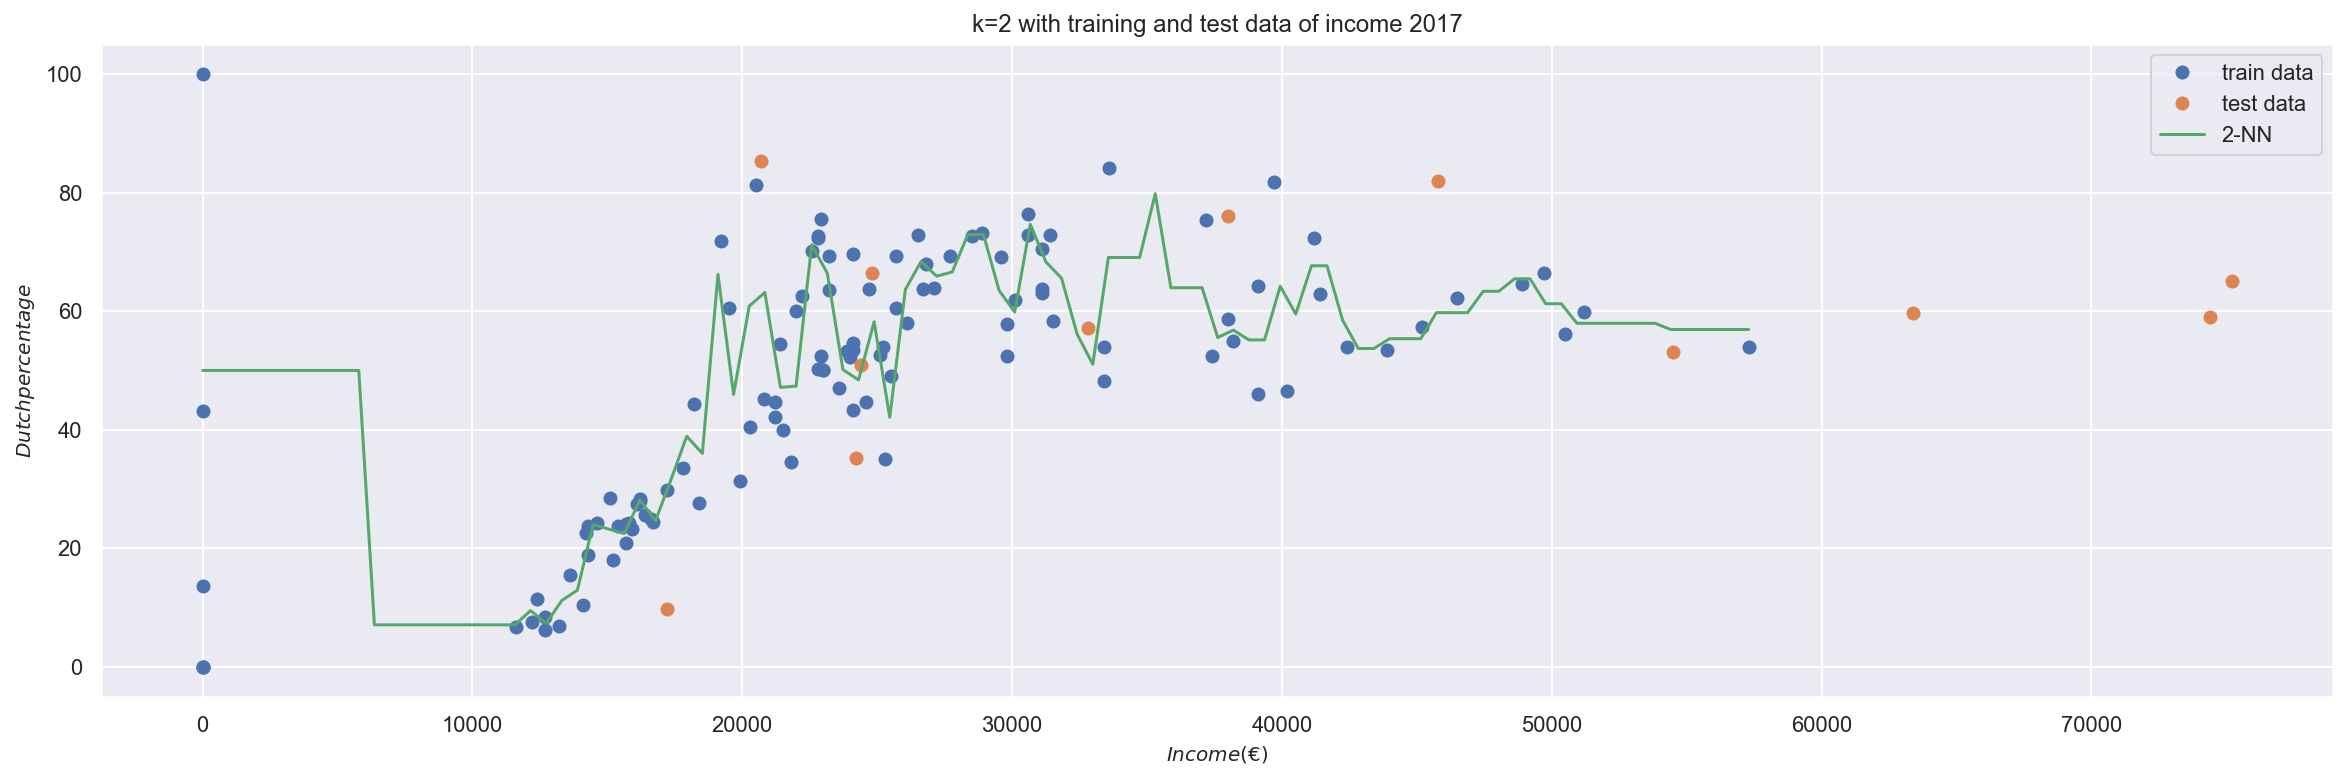

In [136]:
fig, ax = plt.subplots(1,1, figsize=(20,6))

ax.plot(x_train_income, y_train_income, 'o', label="train data")
ax.plot(x_test_income, y_test_income, 'o', label="test data")
xgrid = np.linspace(np.min(x_imputed_income), np.max(x_imputed_income), 100)

# let's unpack the dictionary to its elements (items) which is the k and Regressor
for k, regressor in regdict.items():
    predictions = regressor.predict(xgrid.reshape(-1,1)) 
    ax.plot(xgrid, predictions, label="{}-NN".format(k))
    # adjust size of axis label
    ax.set_xlabel(r'$Income(€)$', fontsize = 10)
    ax.set_ylabel(r'$Dutch   percentage$', fontsize = 10)

ax.set_title("k=2 with training and test data of income 2017")
ax.legend();

The model performs best when k = 2 with an $R^{2}$ = 0.55. This could be considered a moderate uphill positive relationship. This only performs like this when your validation set is 10% of your previous test data. Hence, if this model could be used it would be only feasible for small subsets that **should not have outliers**. 

## 4 Unsupervised EDA ##

I decide to cluster by income and amount of job seekers. I will use the normalised values to look at the means and standard deviation in a more clear manner. Once I plot this I will see if some clustered areas (for both methods) could be overlayed with areas where a high percentage Dutch is present.

In [137]:
#importing necessary packages
%matplotlib inline

from pysal.viz import mapclassify
from pysal.lib import weights
from sklearn import cluster

## 4.1 Analysis clustering variables ##

In [138]:
#variables I wish to cluster by
cluster_var = ['income_euros', 'no_job']

#apparently they want all, so I will not be using this list to use specific columns of the data

In [139]:
#specify amount of clusters
kmeans5 = cluster.KMeans(n_clusters=5)


In [140]:
nbh_data.head() #visualise it

neigb_cijf                                           geometry  Dutch_percent  ethnic_percent  income_euros  no_job  w_queen_score  w_queen_score_no_job  dutch_norm  ethnic_norm  income_norm  no_job_norm
0     70 Oostduinen  POLYGON ((4.30290 52.12832, 4.30298 52.12827, ...            0.0             0.0           0.0     0.0   25387.500000            206.250000         NaN          NaN          NaN          NaN
1  71 Belgisch Park  POLYGON ((4.28056 52.11706, 4.28053 52.11706, ...           61.8            38.2       30100.0   150.0   13416.666667            326.666667    0.606590    -0.632807     0.427848    -0.367067
2  73 Westbroekpark  POLYGON ((4.29171 52.10745, 4.29181 52.10739, ...           64.5            35.5       48900.0     0.0   22060.000000            444.000000    0.547892    -0.573328     1.645316    -1.050888
3      74 Duttendel  POLYGON ((4.32252 52.10768, 4.32252 52.10766, ...           66.4            33.6       49700.0    20.0   38800.000000             56.666667    0.538109    -0.563415     2.151033    -1.021156
4    48 Nassaubuurt  POLYGON ((4.31943 52.09247, 4.31943 52.09247, ...           56.1            43.9       50500.0    10.0   32300.000000            210.000000    0.156572    -0.176800     2.725428    -0.991425

In [143]:
#fill NaN with mean value of that column using, otherwise I cannot perform linear regression
#specify predictor variables, income and no job /job searchers
x_train = nbh_data[['income_norm', 'no_job_norm']]
x_dutch_ethnic = nbh_data[['dutch_norm', 'ethnic_norm']]

x_train = x_train.values.reshape(len(x_train),2)  #reshape to a 2-D array   
x_dutch_ethnic = x_dutch_ethnic.values.reshape(len(x_dutch_ethnic),2)  #reshape to a 2-D array   

x_imputed = imp.fit_transform(x_train)
x_imputed_2 = imp.fit_transform(x_dutch_ethnic)

income_norm_imp = x_imputed[:,0]   #store imputed value for income normalised
no_job_norm_imp  = x_imputed[:,1] #store imputed value for people with no job
ethnic_norm_imp = x_imputed_2[:,0]   #store imputed value for income normalised
dutch_norm_imp  = x_imputed_2[:,1] #store imputed value for people with no job




income_norm_imp = income_norm_imp.reshape(len(income_norm_imp),1)  #reshape to one column again   
no_job_norm_imp = no_job_norm_imp.reshape(len(no_job_norm_imp),1)   #reshape to one column again  
dutch_norm_imp =  dutch_norm_imp.reshape(len(dutch_norm_imp),1)  #reshape to one column again   
ethnic_job_norm_imp =  ethnic_norm_imp.reshape(len(ethnic_norm_imp),1)   #reshape to one column again  

nbh_data['income_norm'] = income_norm_imp
nbh_data['no_job_norm'] = no_job_norm_imp
nbh_data['ethnic_norm'] = ethnic_norm_imp
nbh_data['dutch_norm'] = dutch_norm_imp

nbh_data.head() #visualise once again

neigb_cijf                                           geometry  Dutch_percent  ethnic_percent  income_euros  no_job  w_queen_score  w_queen_score_no_job    dutch_norm   ethnic_norm   income_norm   no_job_norm
0     70 Oostduinen  POLYGON ((4.30290 52.12832, 4.30298 52.12827, ...            0.0             0.0           0.0     0.0   25387.500000            206.250000 -3.648597e-16 -1.563479e-16  1.824672e-16 -2.135044e-18
1  71 Belgisch Park  POLYGON ((4.28056 52.11706, 4.28053 52.11706, ...           61.8            38.2       30100.0   150.0   13416.666667            326.666667  6.065899e-01 -6.328068e-01  4.278480e-01 -3.670674e-01
2  73 Westbroekpark  POLYGON ((4.29171 52.10745, 4.29181 52.10739, ...           64.5            35.5       48900.0     0.0   22060.000000            444.000000  5.478920e-01 -5.733277e-01  1.645316e+00 -1.050888e+00
3      74 Duttendel  POLYGON ((4.32252 52.10768, 4.32252 52.10766, ...           66.4            33.6       49700.0    20.0   38800.000000             56.666667  5.381090e-01 -5.634145e-01  2.151033e+00 -1.021156e+00
4    48 Nassaubuurt  POLYGON ((4.31943 52.09247, 4.31943 52.09247, ...           56.1            43.9       50500.0    10.0   32300.000000            210.000000  1.565723e-01 -1.768003e-01  2.725428e+00 -9.914251e-01

I see that my normalised values have a lot NaN. I will first impute them by filling the NaN values with the means of that column.

In [144]:
# This line is required to obtain the same results always

#(Computers are not truly random. They only seem that way. If this is interesting for you, ask me in class ;) Or try with a different seed.
np.random.seed(1234)


# Run the clustering algorithm
k5cls = kmeans5.fit(nbh_data[cluster_var])

#obtain the labels and store the value in the dataframe

nbh_data['k5cls'] = k5cls.labels_

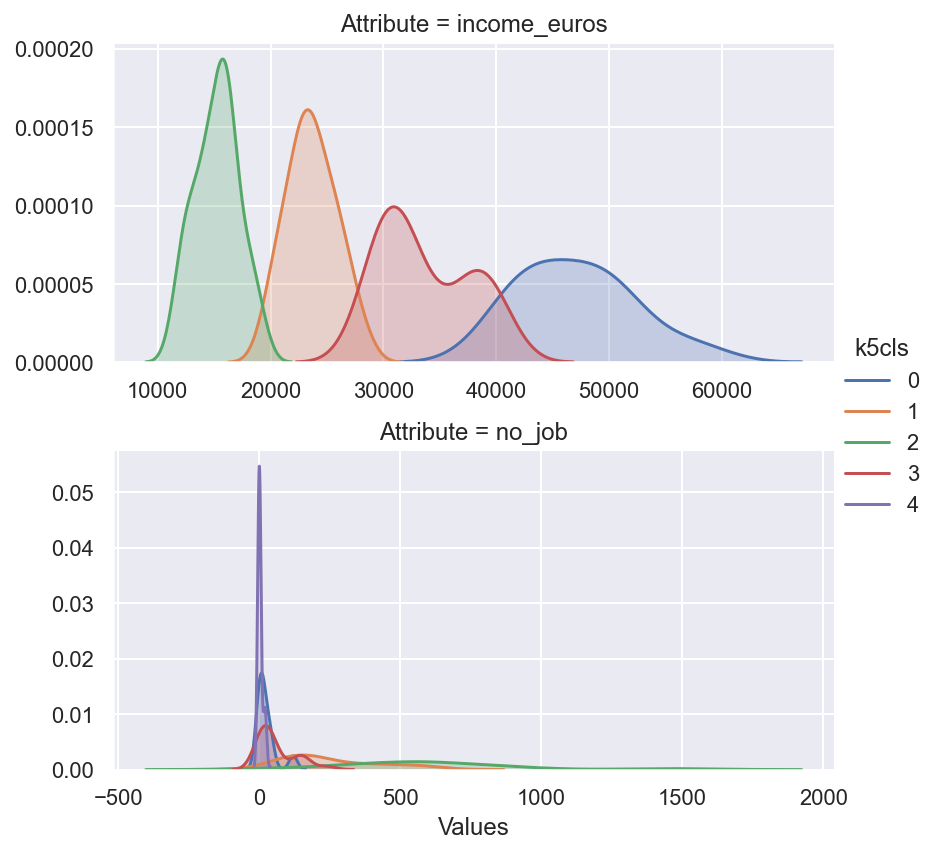

In [145]:
#Plot it
#make the data more understandable to visaulize

# Name (index) the rows after the category they belong
to_plot = nbh_data.set_index('k5cls')
# Subset to keep only variables used in K-means clustering
to_plot = to_plot[cluster_var]

to_plot = to_plot.stack()
to_plot = to_plot.reset_index()

to_plot = to_plot.rename(columns={'level_1': 'Attribute', 0: 'Values'})

# Setup the facets
facets = sns.FacetGrid(data=to_plot, row='Attribute', hue='k5cls', \
                  sharey=False, sharex=False, aspect=2)
# Build the plot as a `sns.kdeplot`
_ = facets.map(sns.kdeplot, 'Values', shade=True).add_legend()

I immediately notice that only no_job_norm satisfies a clear distribution between categories. Income normalised however seems to have a lot of noise in the data, making it unsatisfactory to split in categories.

Therefore, what is advisable, is to use additional predictor variables that create relevant clusters. 

More will be explained in the conclusion.

## 4.2 Mapping the categories ## 

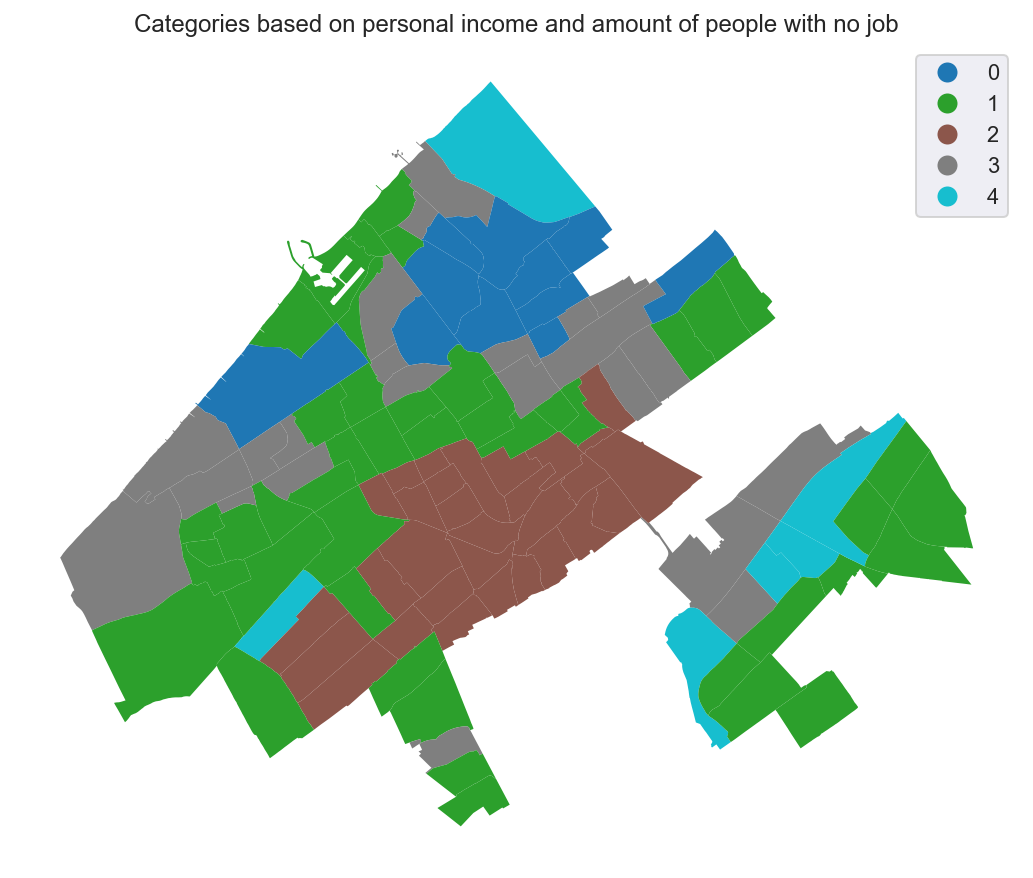

In [146]:
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including a legend and with no boundary lines
nbh_data.plot(column='k5cls', categorical=True, legend=True, linewidth=0, ax=ax)
# Remove axis
ax.set_axis_off()
# Keep axes proportionate
# Add title
plt.title('Categories based on personal income and amount of people with no job')
# Display the map
plt.show()

As one can see, the categories made for the personal income standardised did not make sense. Only Category 4(purple) made sense. The rest was noise. Furthermore, I do not posses any data to conclude if the categories made are correct. Also, I do not know an algorithm (like DBScan) that will find the optimal amount of categories made. Maybe by finding this, I could have argumented why one of the categories make sense if combined with other data in the future. 

In short, clustering is not feasible for this hypothesis. This Section of Unsupervised EDA was just to show the several reasons why not.

## 5 Conclusions ##

**Linear regression model**
The linear regression model performed so poorly on its own training data, that it was decided to not proceed with it for the test data. For this hypothesis, *the model cannot be used for prediction of missing data in the same year.*
- For the income as predictor variable and Dutch percentage as response variable, $R^{2}$ = -2.38. 

- For the income as predictor variable and Dutch percentage as response variable, $R^{2}$ = -0.81.

The MSE for both variables is reasonably high. Dutch % can range from 0% to 100% and having an error range of 20% is already too high for a model to be considered fit to use for other test data.

The model did not properly take outliers into account. A solution for this is having a higher degree polynomial model. The graph of income - Dutch percentage show a somewhat second degree polynomial relation. Therefore, the MSE and $R^{2}$ will be significantly improved.


**K-nearest neighbor**
The k-nearest neighbor performed better than the linear regression model when used on the training data with an $R^{2}$ of 0.90 for k=1. 

After proceeding with the k-nearest neighbor, it was split in three different experiments: 

- Out of the 2017 data: **80% as training data** and **20% as test data**. 
        - For income: k = 3, R^{2} = 0.64. Therefore, it is somewhat accurate. The model cannot account for 35% of the variability in the data.
        - For workless people: k = 11 and R^{2} = 0.27. The model behaves poorly, from which can be concluded it is not a feasible model.
- 2017 will be used completely as training data and 2014 as test data. 
        - The best k is k = 68 with R^{2} = 0.3014. Conclusively, there is no relationship whatsoever. The model performs equally good to the mean in such case.
The test data deviates a lot from the training data and therefore the k-nearest neighbor model performs poorly for the entire dataset of 2014. A lot of the test data lies outside the scope even of the training data. These are not outliers, rather an indication that economic situation can change throughout year significantly.


- 2017 will be used completely as training data and **10% of 2014 as validation data**, in the hope to remove outliers from the validation set.
       - k = 2 and $R^{2}$ = 0.55. This could be considered a moderate uphill positive relationship. This only performs like this when your validation set is 10% of your previous test data. Hence, if this model could be used it would be only feasible for small subsets that should not have outliers. 
       

Concluding, k-nearest neighbor might be a feasible model compared to a linear regression model for a rough estimate of how unknown neighborhoods might have their Dutch natives distributed based on the average income. But it is not fit to predict values accurately for unknown data of other years. It could be used for prediction of data of neighborhoods in other years, but it should be known beforehand if these neighborhoods can have outliers. Then, the model won't be fit anymore. Also, consider that k-nearest neighbor is not a complex algorithm, and for this reason becomes highly overfitted or highly inaccurate if the prediction is asked for data you have no previous knowledge of how its values are distributed.

**Clustering**

Clustering works if the hypothesis or research question would be more complex. A research in which I am interested in different groups and not only a general classification I made now saying "a high percentage Dutch" or "a low average income". If I determine beforehand what the different clusters are, more sophisticated conclusions can be derived.

Another option would be to use an algorithm that finds the most optimal amount of clusters, and based on this I analyse if these clusters are reasonable.

Predictor variables that could make the clustering more fit and understandable would be:
- Data about the sources of income for the different neighborhoods.
- Data about the business climate.
- Data about the quality of life in the different neighborhoods.


**General improvements** 

Right now missing data was filled with the mean of the values in that column using the impute function. However, this neglected any correlation with other columns, and therefore probably entered a wrong value for that missing data. 

- A solution would be an algorithm that finds multicollinearity between predictor variables to fill in the missing data.
- For the linear regression model, it is best to use higher degree polynomial models. This model considers large variances with more accuracy.
- In the case the data of one predictor variable variates too much, one could make a multi-linear/polynomial model. It leads to a more precise understanding of the relation with the response variable. One can determine outliers more exactly.

It is recommended to use the iterative imputer of sklearn. Multivariate imputer that estimates each feature from all the others. A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

Furthermore, as was already stated, additional predictor variables are needed to be able to cluster variables properly. 

All by all, it is possible to have a model that can predict new test data, but the existing models have to be strongly extended or improved. Alone they are too simple for such complex data.


